<h1 align = 'center'> Global Renewable Energy Transition Analysis and Forecast </h1>

<img src="https://imgs.search.brave.com/dm2LIg6LGuGdbdIjorSzAfkjJjMSCNTVaOLZAuwH7go/rs:fit:500:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5yZmYub3JnL2lt/YWdlcy9zaHV0dGVy/c3RvY2tfNTM1Njgz/NDk5LjJlMTZkMGJh/LmZpbGwtNjc1eDQ1/MC5wbmc" alt="Image Description" align = 'center' width = 1500 height = 500>


<h2 align = 'center'> Introduction </h2>
Energy is the lifeblood of modern infrastructure, powering industries, transportation, and communities. The quality and accessibility of energy resources are intrinsically linked to infrastructure development. As the world grapples with an infrastructure deficit, compounded by environmental concerns, a transformation is essential. This project explores the interplay between energy and infrastructure, aligning with the theme of "Infrastructure Deficit: AI's Transformative Role in Planning."

<h2 align = 'center'>Problem Statement </h2>
The problem at hand is the urgent need to transition from non-renewable to renewable energy sources to address infrastructure deficits sustainably. Non-renewable energy exacerbates environmental challenges and hampers infrastructure growth. It's critical to understand renewable energy trends, barriers, and the path to eliminating non-renewables.

<h2 align = 'center'> Aim of the Project </h2>
The project aims to analyze global energy data and offer data-driven insights for accelerating the transition to renewable energy. It seeks to facilitate informed infrastructure planning that aligns with sustainability, reducing our dependence on non-renewable sources.

In [ ]:
#import relevant libraries
from datetime import datetime, timedelta
!pip install pmdarima

import requests
import zipfile
import io
!pip install plotly
import plotly

#for dataframe manipulation
import pandas as pd

#for numerical computattion
import numpy as np
import random

#for system settings
import os

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

# import necessary libraries
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
#!pip install prophet
#from prophet import fbprophet

#Set the font family to 'DejaVu Sans'
plt.rcParams['font.family'] = 'DejaVu Sans'



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00


In [ ]:
directory_path = 'https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/tree/main/Dataset'
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        # Do something with the files
        # For example, print the full path:
        print(os.path.join(dirname, filename))


In [ ]:
df1 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/renewablesTotalPowerGeneration.csv?raw=true')
df2 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/nonRenewablesTotalPowerGeneration.csv?raw=true')
df3 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/top20CountriesPowerGeneration.csv?raw=true')
df4 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/renewablePowerGeneration97-17.csv?raw=true')
df5 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/Country_Consumption_TWH.csv?raw=true')
df6 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/Continent_Consumption_TWH.csv?raw=true')

In [ ]:
df = [("df1", df1), ("df2", df2), ("df3", df3), ("df4", df4), ("df5", df5), ("df6", df6)]

for name, data_frame in df:
    print(f"DataFrame: {name}")
    print(data_frame.columns)


DataFrame: df1
Index(['Mode of Generation', 'Contribution (TWh)'], dtype='object')
DataFrame: df2
Index(['Mode of Generation', 'Contribution (TWh)'], dtype='object')
DataFrame: df3
Index(['Country', 'Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)',
       'Geothermal (TWh)', 'Total (TWh)'],
      dtype='object')
DataFrame: df4
Index(['Year', 'Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)',
       'Geothermal (TWh)'],
      dtype='object')
DataFrame: df5
Index(['Year', 'China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait',

In [ ]:
#checking throught the datasets for missing values

dataframes = [df1, df2, df3, df4, df5, df6]

for i, df in enumerate(dataframes, start=1):
    missing_values = df.isna().sum()
    print(f"Missing Values in df{i}:")
    print(missing_values)
    print()

Missing Values in df1:
Mode of Generation    0
Contribution (TWh)    0
Source Type           0
dtype: int64

Missing Values in df2:
Mode of Generation    0
Contribution (TWh)    0
Source Type           0
dtype: int64

Missing Values in df3:
Country             0
Hydro(TWh)          0
Biofuel(TWh)        0
Solar PV (TWh)      0
Geothermal (TWh)    0
Total (TWh)         0
dtype: int64

Missing Values in df4:
Year                0
Hydro(TWh)          0
Biofuel(TWh)        0
Solar PV (TWh)      0
Geothermal (TWh)    0
dtype: int64

Missing Values in df5:
Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
T

### there are no missing values in the datasets except for df5 with consistent 2 missing values. which means the datasets are pretty clean

<h2 align = 'center'> df1 (Renewable Total Power Generation) </h2>
This dataset provides a comprehensive overview of the total contribution of various renewable energy sources to the global energy production. It encompasses a wide range of renewable modes of generation, including Hydro, Wind, Biofuel, Solar PV, Geothermal, Renewable Waste, Solar Thermal, and Tidal. The dataset allows data analysts to assess the collective impact of these renewable energy sources on the worldwide energy supply. This information is crucial for understanding the transition towards cleaner and more sustainable energy generation. It serves as a valuable resource for demonstrating the increasing importance of renewables in meeting global energy needs and reducing the environmental footprint associated with conventional energy sources.

In [ ]:
df1.sample(5)

Mode of Generation  Contribution (TWh)
7              Tidal            19448.16
5    Renewable waste               74.05
8              Total             6384.25
2            Biofuel             2636.03
1               Wind             5882.82

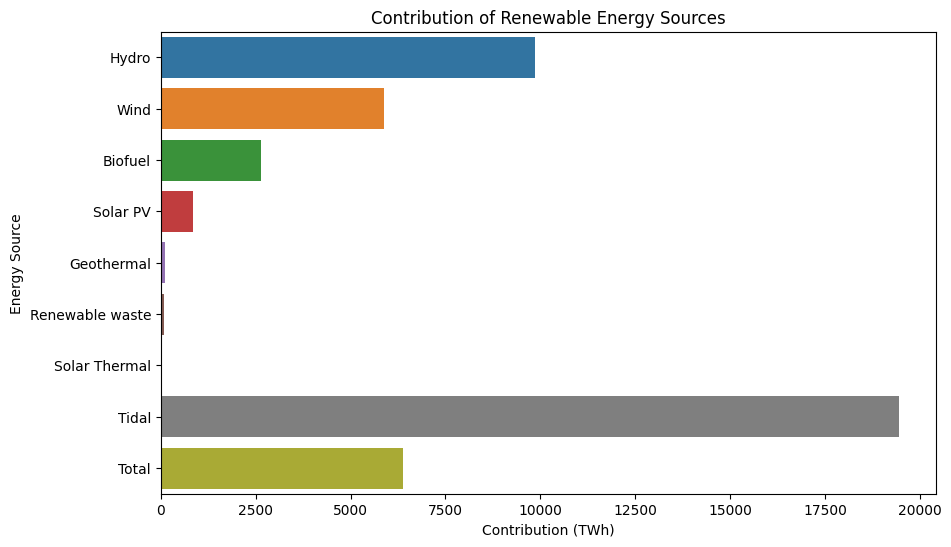

In [ ]:
# Bar Chart for Contribution by Energy Source
plt.figure(figsize=(10, 6))
sns.barplot(x="Contribution (TWh)", y="Mode of Generation", data=df1)
plt.title("Contribution of Renewable Energy Sources")
plt.xlabel("Contribution (TWh)")
plt.ylabel("Energy Source")
plt.show()

### The energy sources contributing to the total annual energy consumption are ranked as follows: Tidal waves have the highest contribution, followed by hydro, wind, and biofuel, in that order. On the other hand, renewable waste and geothermal sources make comparatively lower contributions to the energy mix. This data analysis provides a quick overview of the energy sources' relative importance in the annual energy consumption.

<h2 align = 'center'> df2 (Non Renewables Total Power Generation) </h2>
This dataset focuses on the vital aspect of non-renewable energy sources and their respective contributions to the total energy generated during the years 1990 to 2020. It covers a spectrum of non-renewable energy resources, including Coal, Natural Gas, Nuclear, Oil, Waste, Municipal Wastes, and others. The dataset is organized by year, offering a comprehensive insight into how different countries rely on these energy sources to meet their energy demands. This information is instrumental in understanding the dynamics of energy generation, the role of non-renewable sources, and their potential environmental impacts. As a data analyst, this dataset provides a unique opportunity to assess the shifting energy landscape and explore the balance between non-renewable and renewable energy resources in the global context.

In [ ]:
df2.head()

Mode of Generation  Contribution (TWh)
0               Coal             9863.33
1        Natural Gas             5882.82
2           Nuclear              2636.03
3                Oil              841.87
4              Waste              114.04

In [ ]:
df2.columns

Index(['Mode of Generation', 'Contribution (TWh)'], dtype='object')

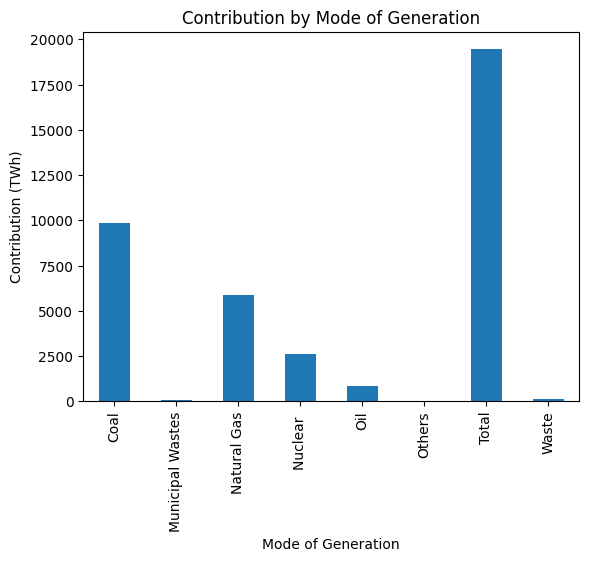

In [ ]:
mode_contribution = df2.groupby('Mode of Generation')['Contribution (TWh)'].sum()
mode_contribution.plot(kind='bar')
plt.title('Contribution by Mode of Generation')
plt.xlabel('Mode of Generation')
plt.ylabel('Contribution (TWh)')
plt.show()

### Coal is the primary contributor to the total consumable energy generation, accounting for approximately half of the total. This highlights its significant role in the energy mix. Additionally, the data underscores the substantial contributions of natural gas and oil, further emphasizing their major impact on energy generation.

<h2 align = 'center'> df3 (Top 20 Countries Power Generation) </h2>
This dataset highlights the leading 20 countries in the adoption of renewable energy sources, with a specific focus on Hydro (TWh), Biofuel (TWh), Solar PV (TWh), and Geothermal (TWh). These countries have demonstrated a significant commitment to harnessing these renewable sources for their energy needs. As a data analyst, you can utilize this dataset to showcase the global leaders in sustainable energy usage, assess their contributions to renewable energy generation, and identify trends in the adoption of these cleaner energy alternatives. This information is valuable for understanding the role of various nations in advancing the use of renewable energy and promoting a more environmentally friendly energy landscape.

In [ ]:
df3.head()

Country  Hydro(TWh)  Biofuel(TWh)  Solar PV (TWh)  Geothermal (TWh)  \
0   China     1189.84        295.02           79.43             0.125   
1     USA      315.62        277.91           58.95            18.960   
2  Brazil      370.90         42.37           52.25             0.000   
3  Canada      383.48         29.65            7.12             0.000   
4   India      141.80         51.06           43.76             0.000   

   Total (TWh)  
0     1819.940  
1      758.619  
2      466.350  
3      424.090  
4      262.650

In [ ]:
#identifying the top countries for each renewable resources
top_hydro = df3.nlargest(5, 'Hydro(TWh)')
top_biofuel = df3.nlargest(5, 'Biofuel(TWh)')
top_solar_pv = df3.nlargest(5, 'Solar PV (TWh)')
top_geothermal = df3.nlargest(5, 'Geothermal (TWh)')

print('Top Country for Hydro is :', top_hydro['Country'].iloc[0])
print('Top Country for bio-fuel is :', top_biofuel['Country'].iloc[0])
print('Top Country for solar_pv is :', top_solar_pv['Country'].iloc[0])
print('Top Country for geothermal is :', top_geothermal['Country'].iloc[0])

Top Country for Hydro is : China
Top Country for bio-fuel is : China
Top Country for solar_pv is : China
Top Country for geothermal is : USA


China's dominance in hydro, bio-fuel, and solar_pv reflects a robust commitment to diverse renewable energy sources. The USA's leadership in geothermal highlights regional resource advantages. This diversification and focus on localized strengths are critical for sustainable energy solutions. Both countries' approaches serve as models for global sustainability efforts. The data underscores the pivotal roles China and the USA play in shaping the renewable energy landscape.

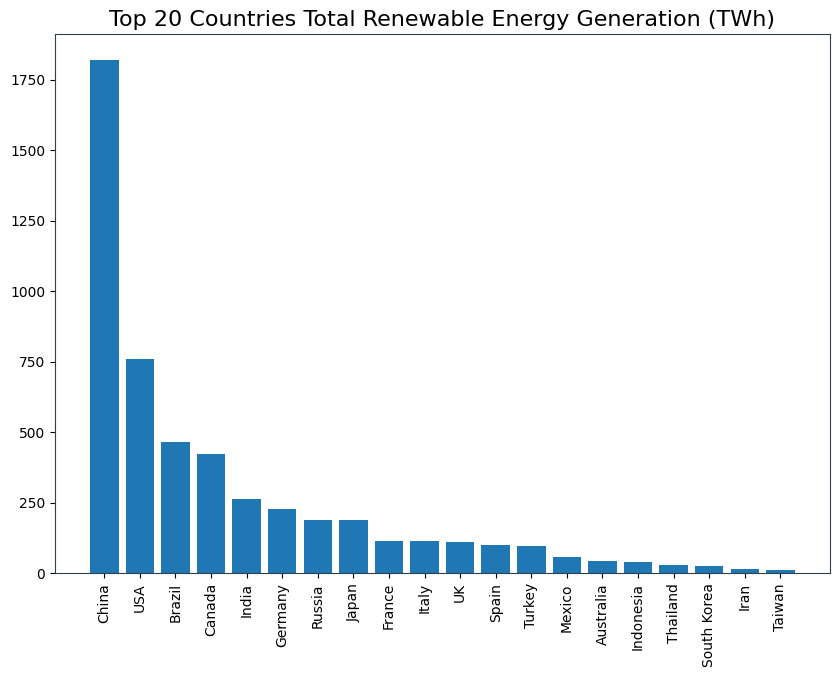

In [ ]:
# Analysis on the Top 20 countries Total Renewable Energy Generation
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df3['Country']
y_total=df3['Total (TWh)']
plt.bar(X_total, y_total)
plt.title('Top 20 Countries Total Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)

Text(0.5, 1.02, 'Top 20 Countries Generating Renewable Energy (TWh)')

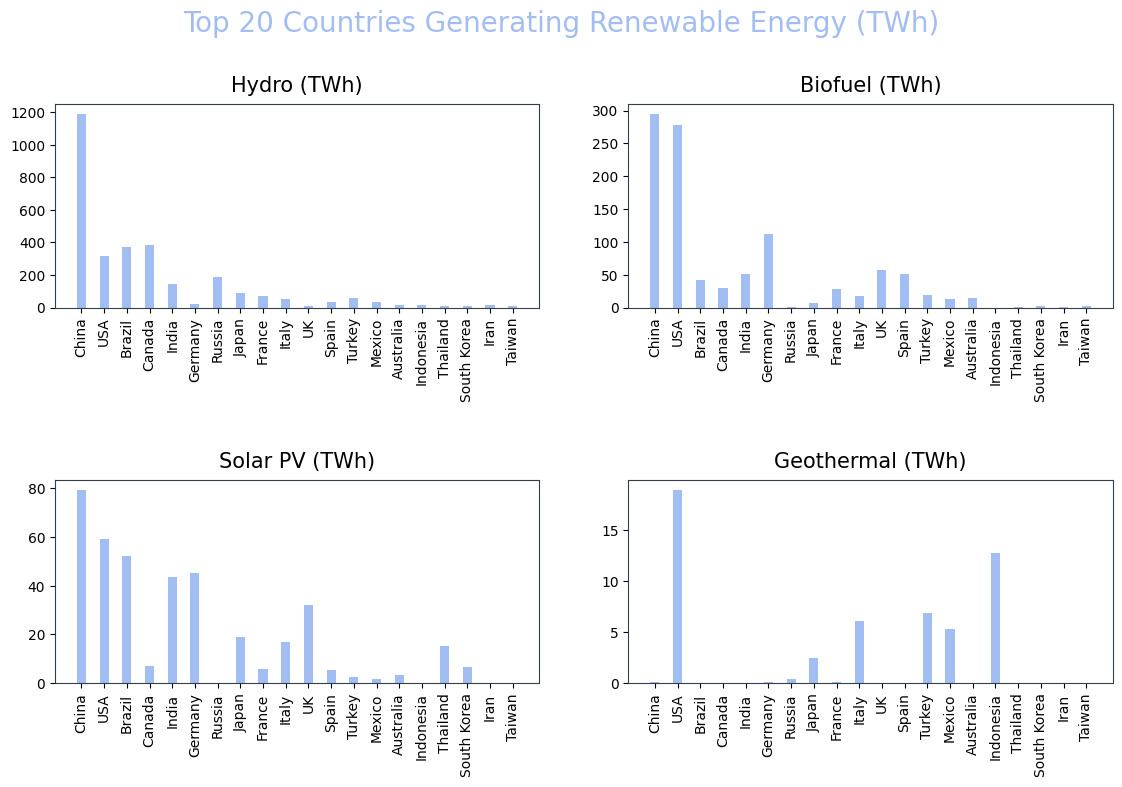

In [ ]:
# Analysis Showing
fig, ax = plt.subplots(2,2, figsize=(12,8))

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8


X1 = df3.iloc[:,0]
y1 = df3.iloc[:,1]

X2 = df3.iloc[:,0]
y2 = df3.iloc[:,2]

X3 = df3.iloc[:,0]
y3 = df3.iloc[:,3]

X4 = df3.iloc[:,0]
y4 = df3.iloc[:,4]


ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].bar(X1,y1,width=.4, color=['#A2BDF2'])
ax[0,1].bar(X2,y2,width=.4,color=['#A2BDF2'])
ax[1,0].bar(X3,y3,width=.4,color=['#A2BDF2'])
ax[1,1].bar(X4,y4,width=.4,color=['#A2BDF2'])

ax[0,0].set_title('Hydro (TWh)',fontsize=15, y=1.02)
ax[0,1].set_title('Biofuel (TWh)',fontsize=15, y=1.02)
ax[1,0].set_title('Solar PV (TWh)',fontsize=15, y=1.02)
ax[1,1].set_title('Geothermal (TWh)',fontsize=15, y=1.02)

fig.tight_layout(pad=3.5)
fig.suptitle('Top 20 Countries Generating Renewable Energy (TWh)', fontsize=20, y=1.02, color='#A2BDF2')

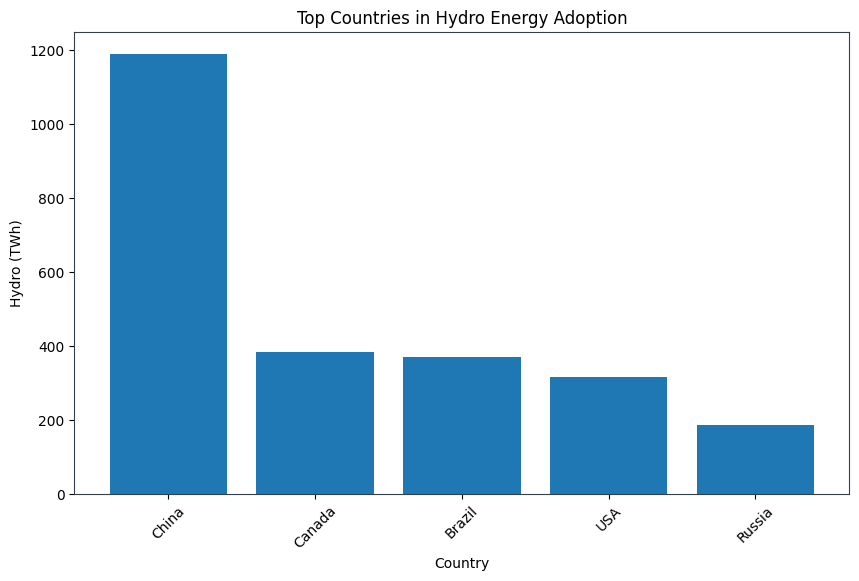

In [ ]:
#Bar Chart for Top Countries in Hydro Energy:
plt.figure(figsize=(10, 6))
plt.bar(top_hydro['Country'], top_hydro['Hydro(TWh)'])
plt.title('Top Countries in Hydro Energy Adoption')
plt.xlabel('Country')
plt.ylabel('Hydro (TWh)')
plt.xticks(rotation=45)
plt.show()

#### China leads in Hydro energy adoption, followed by Canada, Brazil, and the USA, demonstrating global leadership in this sustainable energy source.

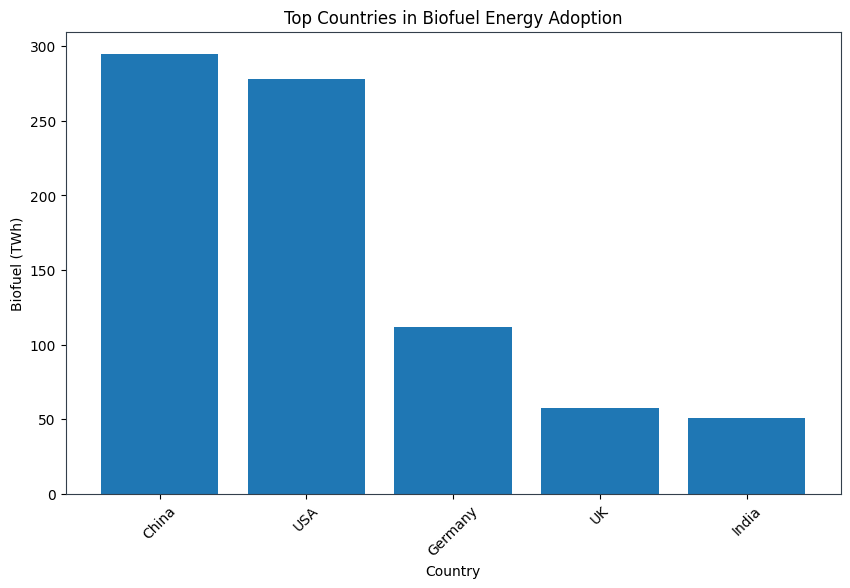

In [ ]:
# Bar Chart for Top Countries in Biofuel Energy
plt.figure(figsize=(10, 6))
plt.bar(top_biofuel['Country'], top_biofuel['Biofuel(TWh)'])
plt.title('Top Countries in Biofuel Energy Adoption')
plt.xlabel('Country')
plt.ylabel('Biofuel (TWh)')
plt.xticks(rotation=45)
plt.show()

China leads in Biofuel energy adoption, with the USA closely trailing, while Germany contributes to a smaller share of biofuel energy, showcasing global variances in its adoption.

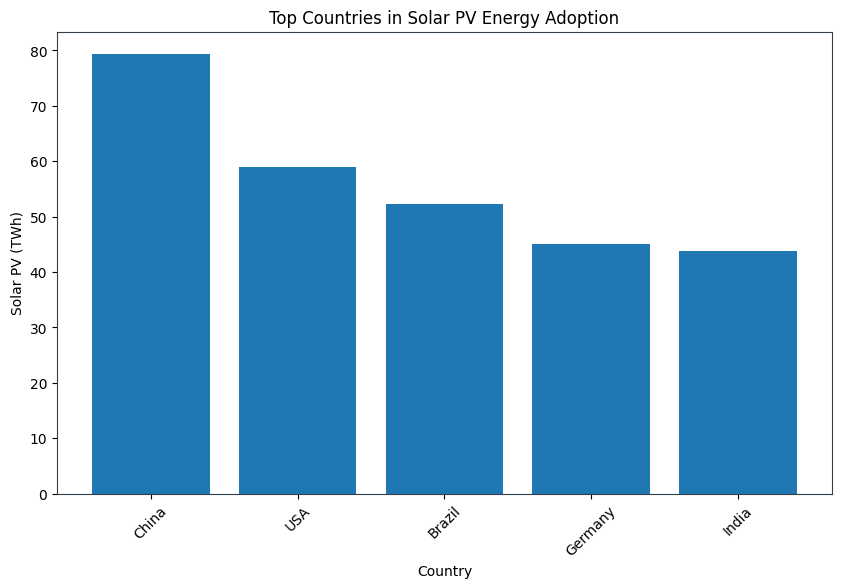

In [ ]:
#Bar Chart for Top Countries in Solar PV Energy
plt.figure(figsize=(10, 6))
plt.bar(top_solar_pv['Country'], top_solar_pv['Solar PV (TWh)'])
plt.title('Top Countries in Solar PV Energy Adoption')
plt.xlabel('Country')
plt.ylabel('Solar PV (TWh)')
plt.xticks(rotation=45)
plt.show()

China demonstrates a substantial increase in solar PV energy adoption, with the USA, Brazil, Germany, and India showing a diverse approach in embracing solar energy sources, emphasizing the global shift towards this sustainable energy option.

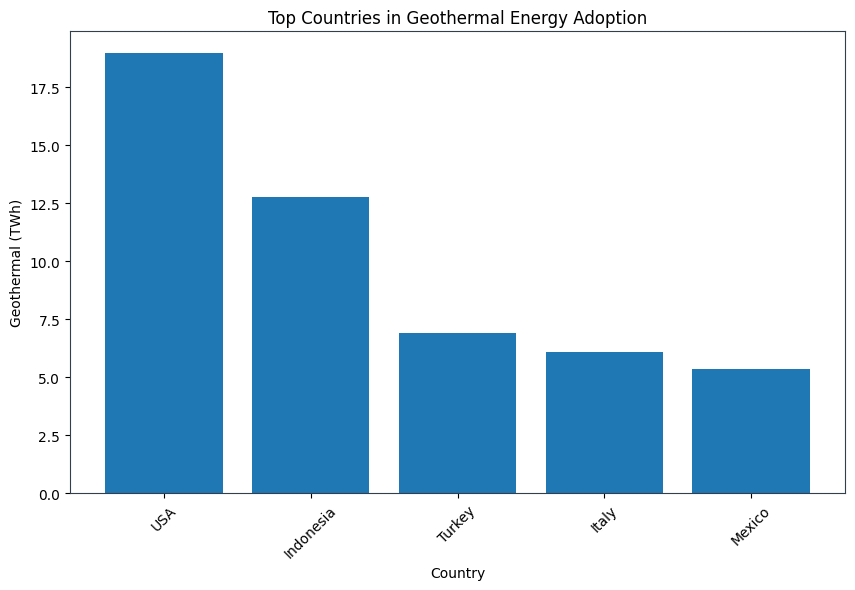

In [ ]:
# Bar Chart for Top Countries in Geothermal Energy
plt.figure(figsize=(10, 6))
plt.bar(top_geothermal['Country'], top_geothermal['Geothermal (TWh)'])
plt.title('Top Countries in Geothermal Energy Adoption')
plt.xlabel('Country')
plt.ylabel('Geothermal (TWh)')
plt.xticks(rotation=45)
plt.show()

### The USA is at the forefront of geothermal energy adoption, while Indonesia, Turkey, Italy, and Mexico are actively embracing this technology, indicating a global trend toward utilizing geothermal resources for sustainable energy.

#### The analysis reveals a compelling global narrative in energy adoption. China's multi-faceted leadership underscores its commitment to diverse renewable sources, shaping the global energy landscape. Meanwhile, the USA, Brazil, Germany, and India's combined approach to solar PV mirrors a collaborative pursuit of cleaner energy alternatives. In geothermal, the USA's dominance is a testament to regional resource advantages, with Indonesia, Turkey, Italy, and Mexico actively joining the movement toward geothermal energy. Collectively, these trends signify a global shift towards sustainable energy solutions, with nations increasingly embracing cleaner and more resilient sources of power, laying the foundation for a greener and more sustainable energy future.

<h2 align = 'center'> df4 (Renewable Power Generation 1997-2017)</h2>
This dataset is a valuable resource for understanding the growth and contribution of renewable energy sources to the global energy landscape between 1990 and 2017. It includes key renewable energy categories such as Hydro (TWh), Biofuel (TWh), Solar PV (TWh), and Geothermal (TWh). Over this timeline, it tracks the quantity of terawatt hours generated through these sustainable energy sources. As a data analyst, you can use this data to analyze the increasing role of renewables in meeting energy demands, assess trends in renewable energy production, and evaluate the environmental benefits associated with a shift towards cleaner energy alternatives. This dataset is instrumental for showcasing the significant strides made in harnessing renewable energy for a more sustainable future.

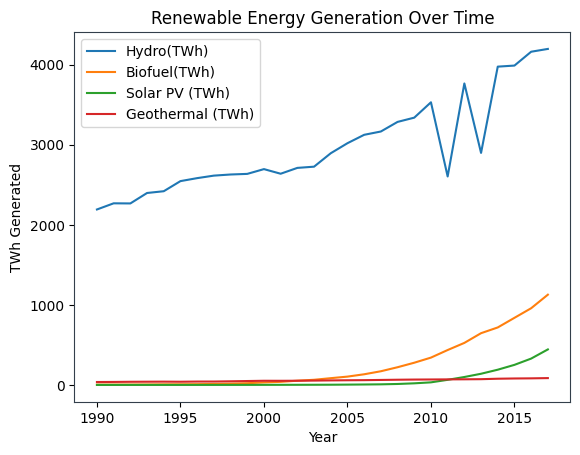

In [ ]:
#Renewable Energy Trends Over Time
# Group data by year and calculate total renewable energy generation
yearly_renewable_energy = df4.groupby('Year')[['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']].sum()

# Plot the trends using matplotlib
yearly_renewable_energy.plot()
plt.title('Renewable Energy Generation Over Time')
plt.xlabel('Year')
plt.ylabel('TWh Generated')
plt.show()

Hydro energy has not only received the highest energy attention over time but has also demonstrated the steepest growth trajectory. Additionally, other energy sources have garnered significant attention, with an observable uptick in interest from the end of 2003, underlining the evolving energy landscape and the increasing focus on sustainable alternatives.

In [ ]:
#Total Renewable Energy Generation
total_generation = df4[['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']].sum()


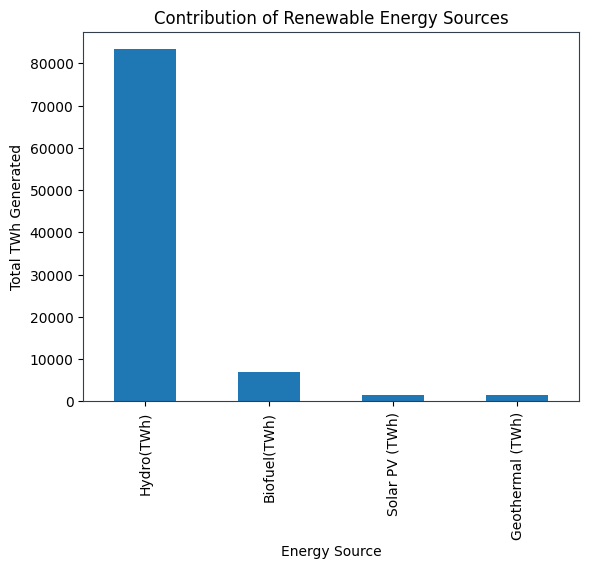

In [ ]:
#Contribution of Each Renewable Source:
total_generation.plot(kind='bar')
plt.title('Contribution of Renewable Energy Sources')
plt.xlabel('Energy Source')
plt.ylabel('Total TWh Generated')
plt.show()

### Surprisingly, hydro energy dominates the renewable energy landscape, contributing to a remarkable 85% of the total. In contrast, biofuel, solar PV, and geothermal energy receive comparatively lower attention and utilization, indicating the overwhelming preference for hydro as a primary renewable energy source.

<h2 align = 'center'> df5 (Country_Consumption_TWH) </h2>
The dataset under consideration encompasses electricity consumption data spanning the years 1990 to 2020, measured in Terrawatt hours (TWH), for a diverse set of countries. It features 45 columns representing individual countries, including global giants like China and the United States, as well as nations like Brazil, Belgium, and Nigeria. This dataset provides a rich source of information for any data analyst aiming to gain insights into the dynamic landscape of energy consumption on a global scale. By examining this data, one can uncover trends, patterns, and shifts in power consumption over the past three decades. Moreover, it serves as a pivotal tool for assessing the transition from conventional, non-renewable energy sources to sustainable and renewable alternatives, offering a comprehensive view of how the world is evolving in its energy utilization practices.

In [ ]:
df5.tail()

Year   China  United States  Brazil  Belgium  Czechia  France  Germany  \
28  2018.0  3201.0         2236.0   288.0     53.0     43.0   246.0    302.0   
29  2019.0  3309.0         2214.0   293.0     55.0     43.0   243.0    294.0   
30  2020.0  3381.0         2046.0   286.0     51.0     39.0   217.0    275.0   
31     NaN     NaN            NaN     NaN      NaN      NaN     NaN      NaN   
32     NaN     NaN            NaN     NaN      NaN      NaN     NaN      NaN   

    Italy  Netherlands  ...  Australia  New Zealand  Algeria  Egypt  Nigeria  \
28  151.0         73.0  ...      128.0         20.0     61.0   96.0    160.0   
29  149.0         72.0  ...      129.0         21.0     65.0   97.0    157.0   
30  137.0         70.0  ...      126.0         21.0     59.0   92.0    159.0   
31    NaN          NaN  ...        NaN          NaN      NaN    NaN      NaN   
32    NaN          NaN  ...        NaN          NaN      NaN    NaN      NaN   

    South Africa   Iran  Kuwait  Saudi Arabia  United Arab Emirates  
28         134.0  266.0    34.0         214.0                  78.0  
29         129.0  269.0    36.0         215.0                  83.0  
30         124.0  268.0    38.0         209.0                  81.0  
31           NaN    NaN     NaN           NaN                   NaN  
32           NaN    NaN     NaN           NaN                   NaN  

[5 rows x 45 columns]

In [ ]:
df5.columns

Index(['Year', 'China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates'],
      dtype='object')

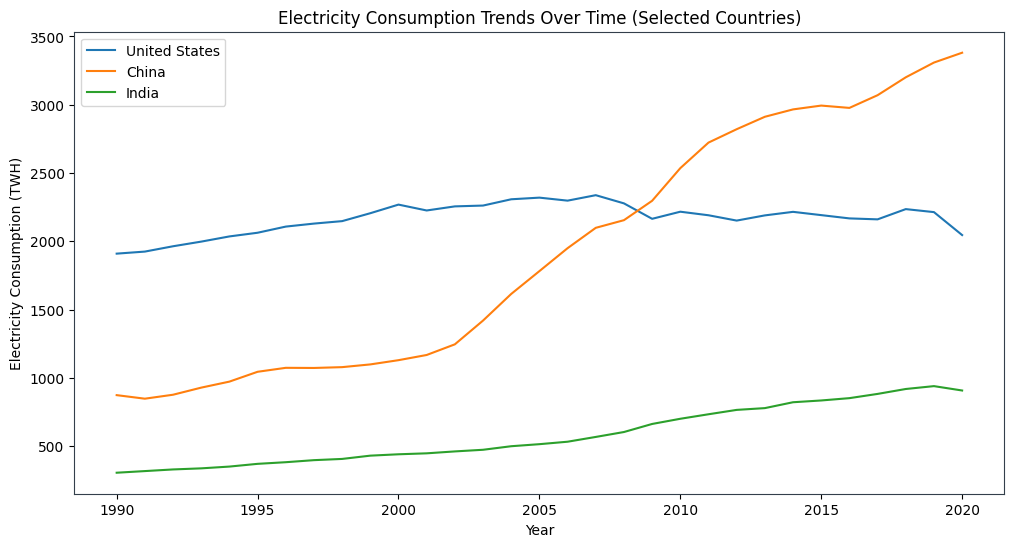

In [ ]:
# Line Chart for Energy Consumption Trends Over Time (select countries)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df5, x='Year', y='United States', label='United States')
sns.lineplot(data=df5, x='Year', y='China', label='China')
sns.lineplot(data=df5, x='Year', y='India', label='India')
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (TWH)')
plt.title('Electricity Consumption Trends Over Time (Selected Countries)')
plt.legend()
plt.show()

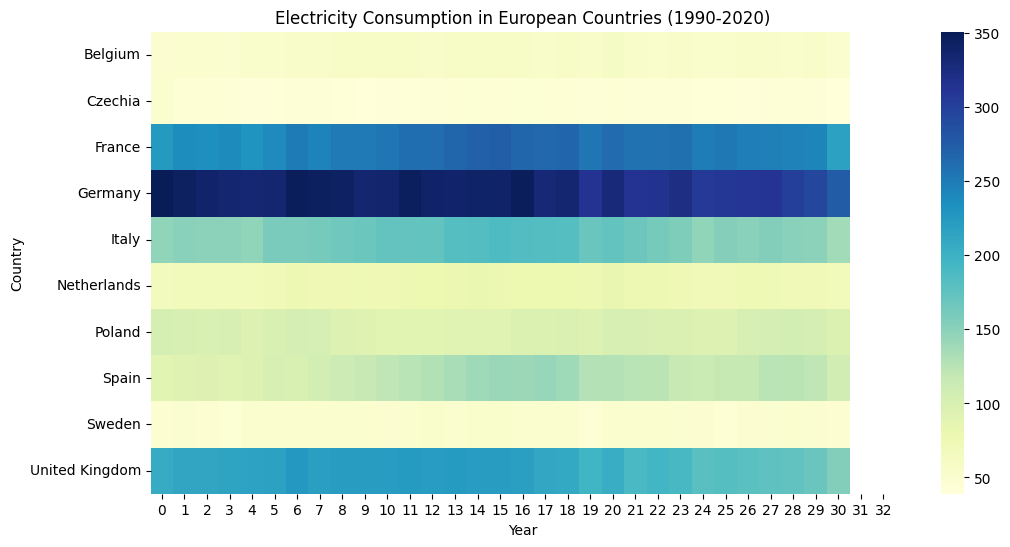

In [ ]:
# Stacked Area Chart for Regional Breakdown (e.g., Europe)
european_countries = ['Belgium', 'Czechia', 'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Spain', 'Sweden', 'United Kingdom']
european_data = df5[european_countries]

plt.figure(figsize=(12, 6))
sns.heatmap(data=european_data.T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Electricity Consumption in European Countries (1990-2020)')
plt.show()

#### Indeed, Germany, the UK, France, and Italy appear to have significantly higher energy consumption levels than one might initially anticipate. This observation underscores the importance of recognizing regional disparities in energy usage and highlights the need for sustainable energy strategies to address these varying demands effectively.

In [ ]:
Asia = ['China', 'Kazakhstan', 'Russia', 'Uzbekistan', 'Indonesia', 'Japan', 'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India']
North_America = ['United States', 'Canada', 'Mexico']
South_America = ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Venezuela']
Europe = ['Belgium', 'Czechia', 'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey', 'Ukraine']
Africa = ['Algeria', 'Egypt', 'Nigeria', 'South Africa']
Middle_East = ['Iran', 'Kuwait', 'Saudi Arabia', 'United Arab Emirates']
Oceania = ['Australia', 'New Zealand']

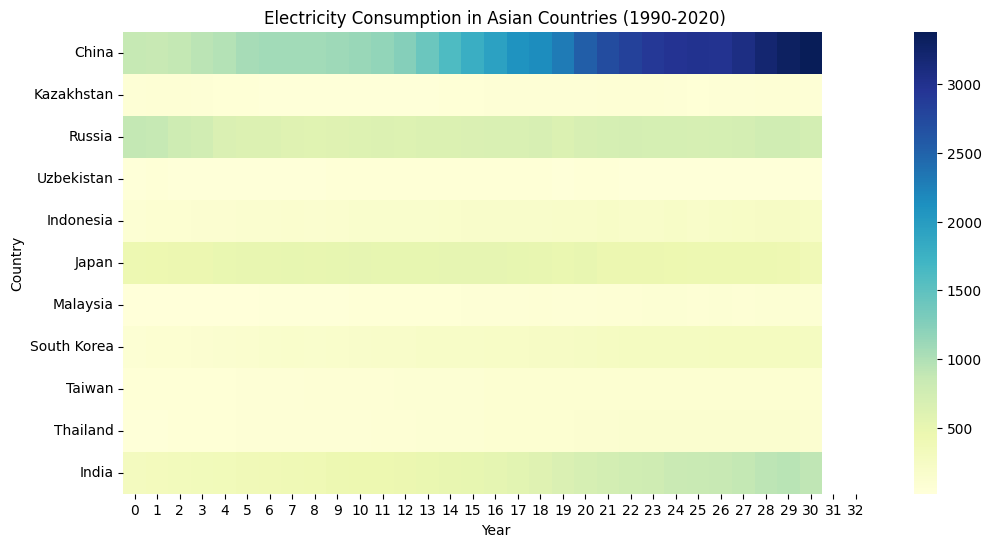

In [ ]:
#Heatmap for Asia
Asia = df5[Asia]
plt.figure(figsize=(12, 6))
sns.heatmap(data = Asia.T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Electricity Consumption in Asian Countries (1990-2020)')
plt.show()

##### China's position as the highest consumer of electrical energy in Asia is a testament to its rapid economic growth and expanding energy needs. This fact underscores China's prominent role in the regional energy landscape and its increasing energy demands as a global economic powerhouse.

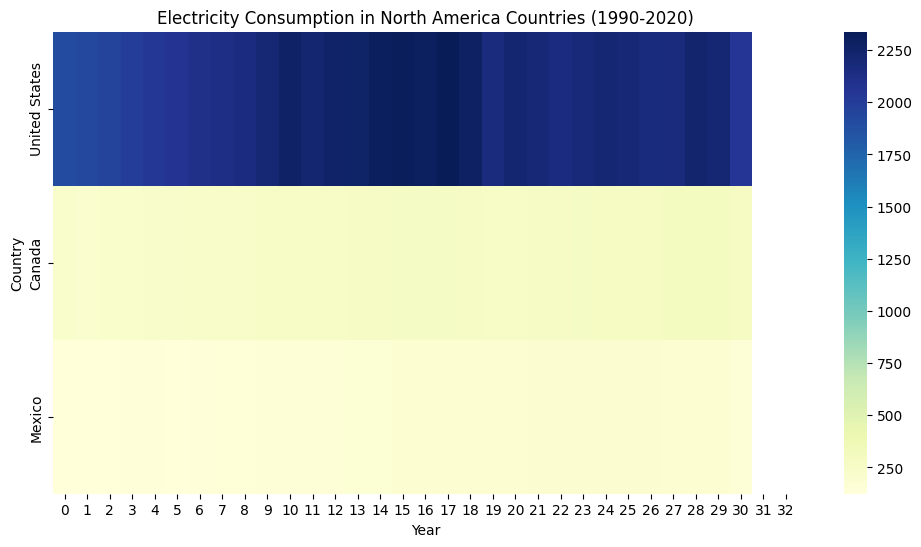

In [ ]:
#Heatmap for North America
NA = df5[North_America]
plt.figure(figsize=(12, 6))
sns.heatmap(data = NA.T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Electricity Consumption in North America Countries (1990-2020)')
plt.show()

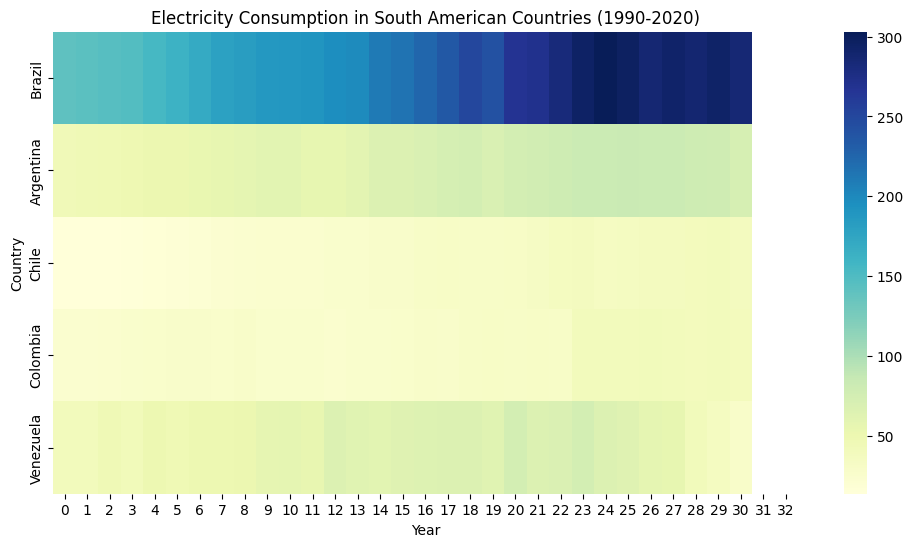

In [ ]:
#Heatmap for South America
SA = df5[South_America]
plt.figure(figsize=(12, 6))
sns.heatmap(data = SA.T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Electricity Consumption in South American Countries (1990-2020)')
plt.show()

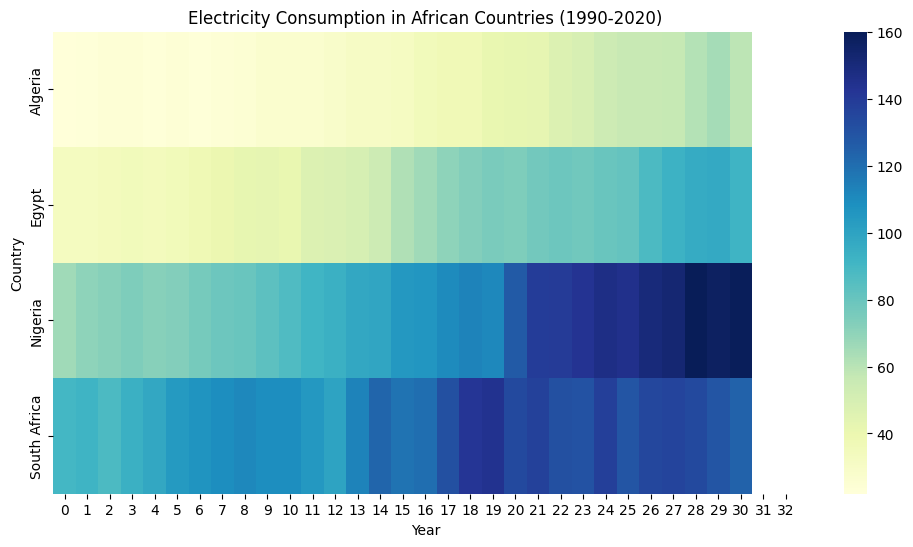

In [ ]:
#Heatmap for Africa
Africa = df5[Africa]
plt.figure(figsize=(12, 6))
sns.heatmap(data = Africa.T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Electricity Consumption in African Countries (1990-2020)')
plt.show()

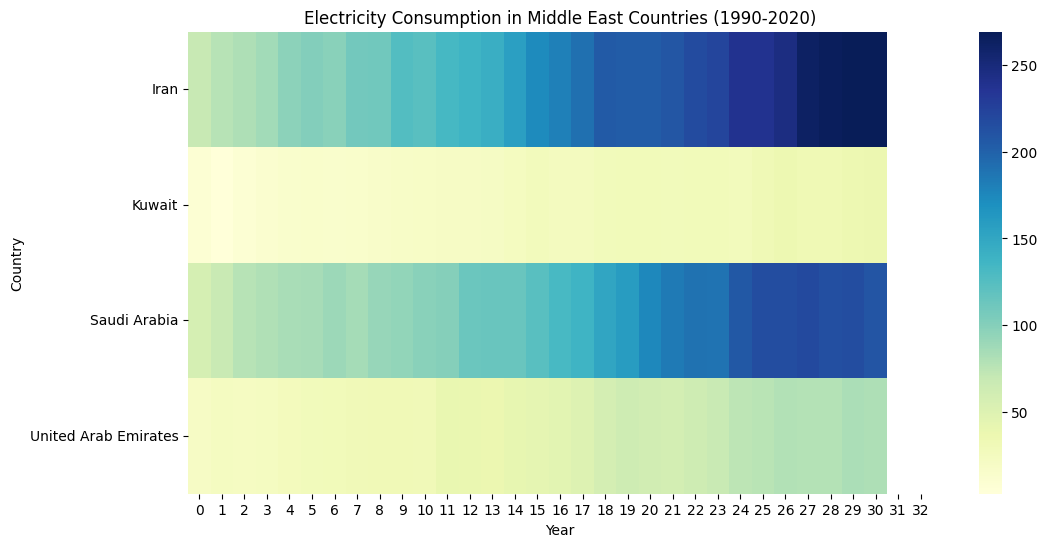

In [ ]:
#Heatmap for Middle_East
ME = df5[Middle_East]
plt.figure(figsize=(12, 6))
sns.heatmap(data = ME.T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Electricity Consumption in Middle East Countries (1990-2020)')
plt.show()

<h2 align = 'center'> df6 (Continent_Consumption_TWH) </h2>
This dataset covers electricity consumption in Terrawatt hours (TWH) on a continental scale from 1990 to 2020. It includes columns for each year, showcasing power usage in various regions, including the world, OECD nations, BRICS countries, Europe, North America, Latin America, Asia, Pacific, Africa, Middle-East, and the Commonwealth of Independent States (CIS). The dataset offers a comprehensive view of global energy consumption trends, making it a crucial resource for assessing the transition from non-renewable to renewable energy sources on a continental level

In [ ]:
df6.head()

Year      World      OECD     BRICS    Europe  North America  \
0  1990  101855.54  52602.49  26621.07  20654.88       24667.23   
1  1991  102483.56  53207.25  26434.99  20631.62       24841.68   
2  1992  102588.23  53788.75  25993.05  20189.68       25341.77   
3  1993  103646.56  54614.48  26283.80  20189.68       25830.23   
4  1994  104449.03  55579.77  25993.05  20085.01       26365.21   

   Latin America      Asia  Pacific   Africa  Middle-East       CIS  
0        5373.06  24574.19  1197.89  4407.77      2581.86  16049.40  
1        5500.99  24783.53  1186.26  4535.70      2744.68  15898.21  
2        5628.92  25690.67  1209.52  4582.22      3081.95  14339.79  
3        5675.44  26876.93  1267.67  4721.78      3349.44  13246.57  
4        5989.45  28098.08  1279.30  4803.19      3640.19  11606.74

In [ ]:
df6.columns

Index(['Year', 'World', 'OECD', 'BRICS', 'Europe', 'North America',
       'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS'],
      dtype='object')

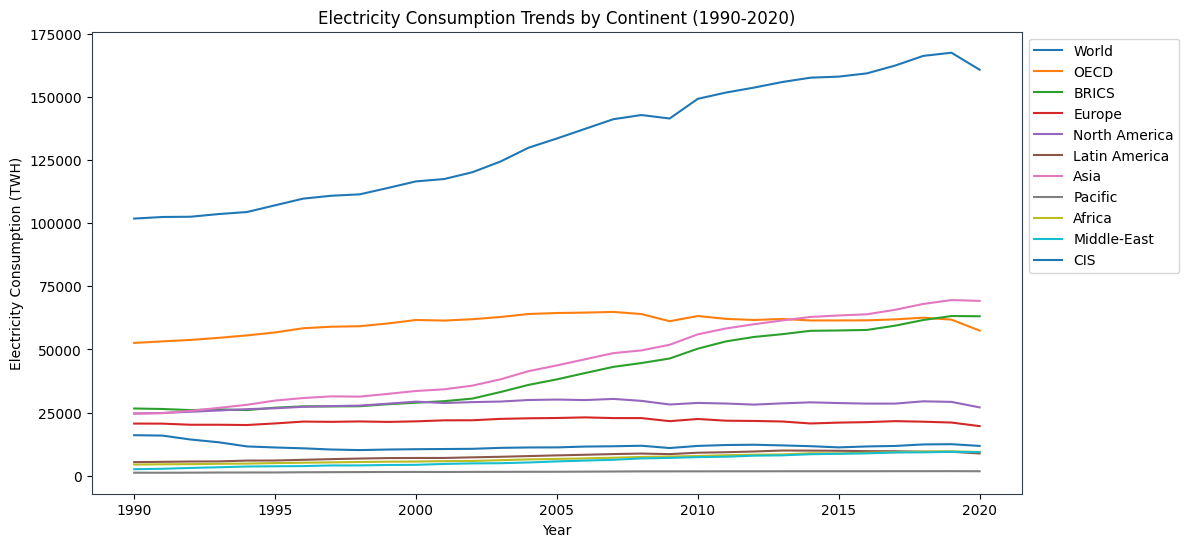

In [ ]:
# Line Chart for Electricity Consumption Trends Over Time (Continents)
plt.figure(figsize=(12, 6))
for continent in ['World', 'OECD', 'BRICS', 'Europe', 'North America', 'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS']:
    sns.lineplot(data=df6, x='Year', y=continent, label=continent)
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (TWH)')
plt.title('Electricity Consumption Trends by Continent (1990-2020)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The OECD countries have consistently recorded the highest electricity consumption, while both BRICS and North America initially exhibited relatively lower consumption rates, which began to increase around 2002. Interestingly, other continents like the Middle East, Africa, and the Pacific have not experienced the steep growth in electricity consumption that might have been expected, indicating varying trends in energy usage and development across regions.

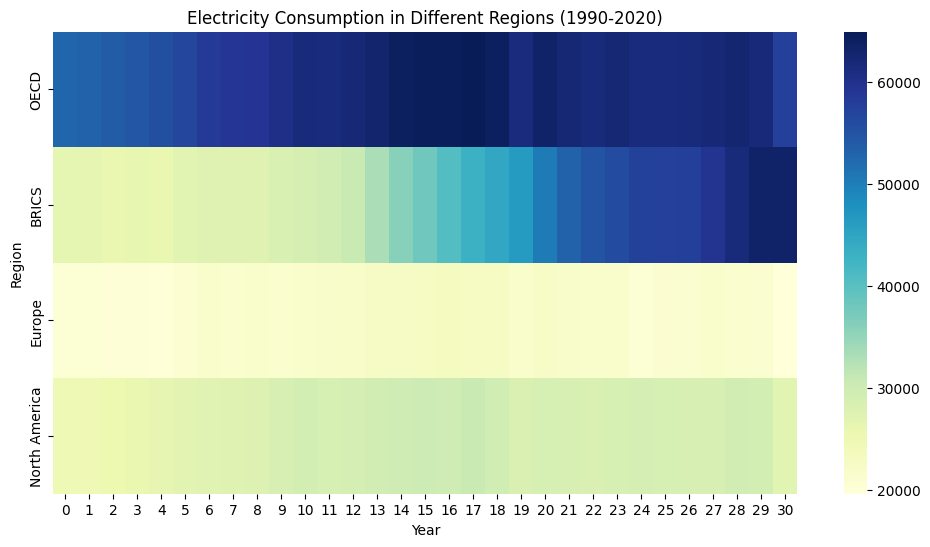

In [ ]:
# Stacked Area Chart for Regional Breakdown
regions_1 = ['OECD', 'BRICS', 'Europe', 'North America']
regions_2 = ['Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS']
plt.figure(figsize=(12, 6))
sns.heatmap(data=df6[regions_1].T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Region')
plt.title('Electricity Consumption in Different Regions (1990-2020)')
plt.show()

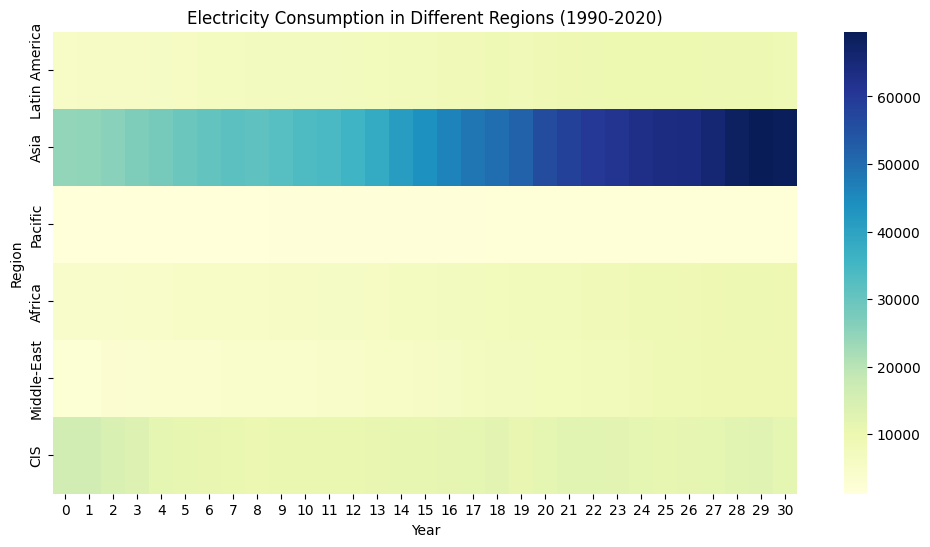

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df6[regions_2].T, cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Region')
plt.title('Electricity Consumption in Different Regions (1990-2020)')
plt.show()

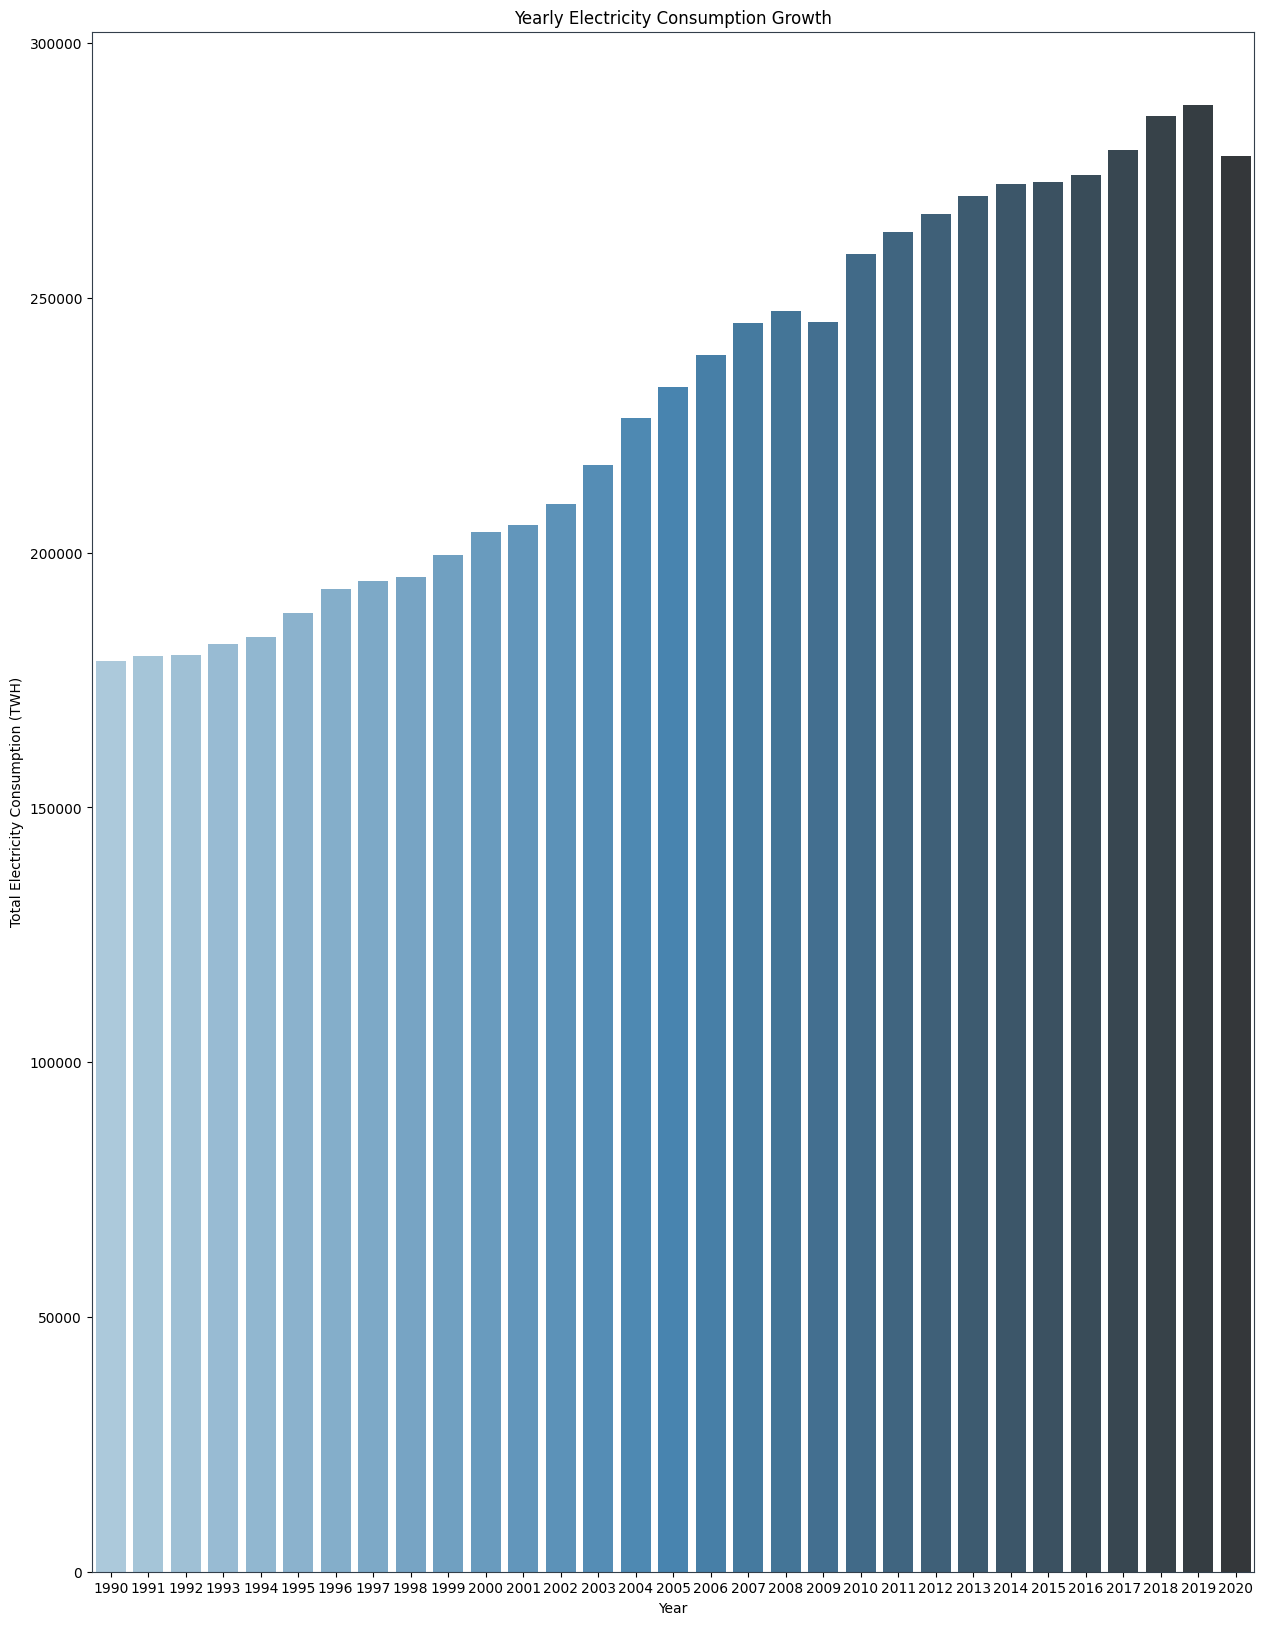

In [ ]:
# Bar Chart for Yearly Consumption Growth
regions = ['OECD', 'BRICS', 'Europe', 'North America',
       'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS']
df6['Total'] = df6[regions].sum(axis=1)
yearly_growth = df6.groupby('Year')['Total'].sum()

plt.figure(figsize=(15, 20))
sns.barplot(x=yearly_growth.index, y=yearly_growth.values, palette="Blues_d")
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption (TWH)')
plt.title('Yearly Electricity Consumption Growth')
plt.show()

The trend analysis indicates a notable overall growth in energy consumption over the years. However, there are minor dips in consumption in 2009 and 2020, likely attributed to specific circumstances or events that temporarily impacted energy demand, highlighting the sensitivity of energy consumption patterns to external factors and economic conditions.

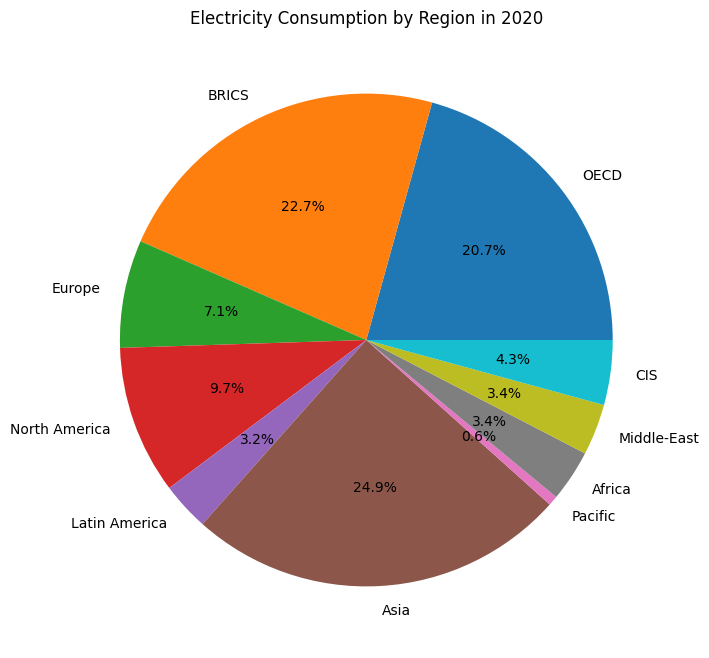

In [ ]:
# Pie Chart for 2020 Breakdown
consumption_2020 = df6[regions].loc[df6['Year'] == 2020].values[0]

plt.figure(figsize=(8, 8))
plt.pie(consumption_2020, labels=regions, autopct='%1.1f%%')
plt.title('Electricity Consumption by Region in 2020')
plt.show()

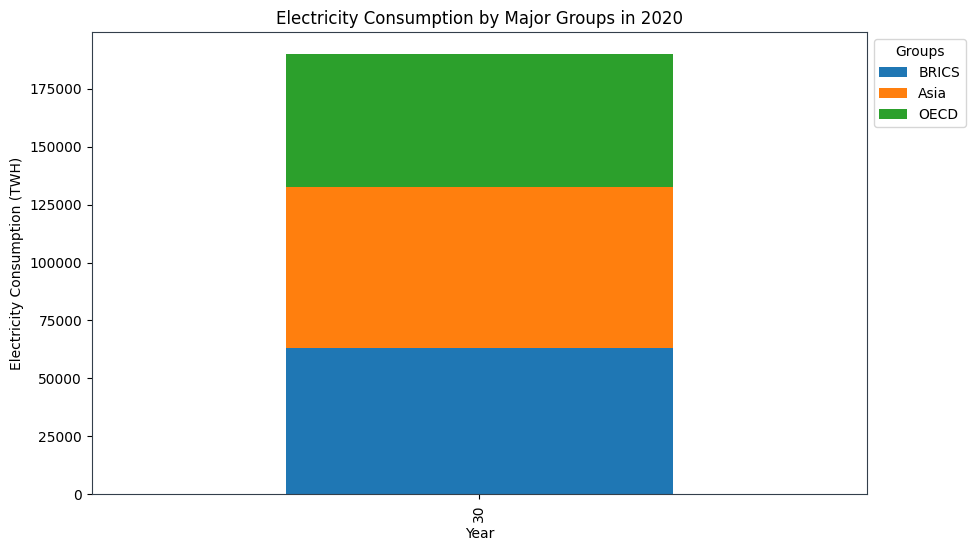

In [ ]:
# Filter data for the year 2020 and select the columns of interest
major_consumers_2020 = df6.loc[df6['Year'] == 2020, ['BRICS', 'Asia', 'OECD']]

# Create a stacked bar chart
major_consumers_2020.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (TWH)')
plt.title('Electricity Consumption by Major Groups in 2020')
plt.legend(title='Groups', labels=['BRICS', 'Asia', 'OECD'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

EXPLORATORY DATA ANALYSIS (Adedamola Olayinka-Osho)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

One of the aims of this project is to analyze trends in renewable energy adoption worldwide.

1. To show the trend of each renewable energies throughout the years.

#### YEARLY DATA VISUALIZATION

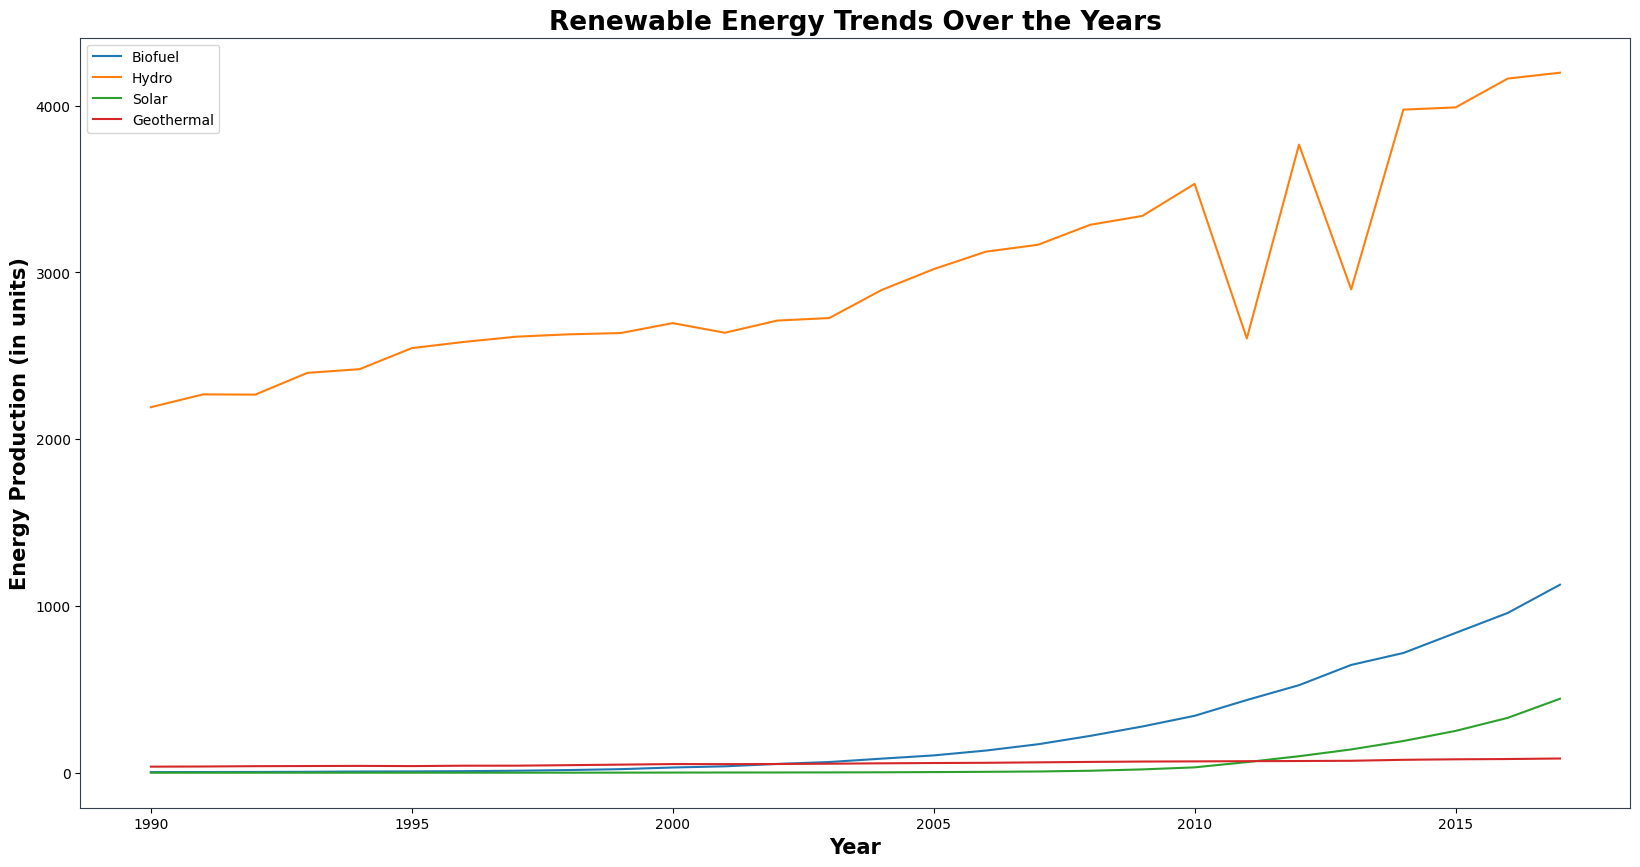

In [ ]:
# Create a line plot
plt.figure(figsize=(20, 10))
sns.lineplot(data=df4, x='Year', y='Biofuel(TWh)', label='Biofuel')
sns.lineplot(data=df4, x='Year', y='Hydro(TWh)', label='Hydro')
sns.lineplot(data=df4, x='Year', y='Solar PV (TWh)', label='Solar')
sns.lineplot(data=df4, x='Year', y='Geothermal (TWh)', label='Geothermal')

# Add labels and legend
plt.xlabel('Year', fontsize= 15, fontweight = 'bold')
plt.ylabel('Energy Production (in units)', fontsize= 15, fontweight = 'bold')
plt.title('Renewable Energy Trends Over the Years', fontsize= 19, fontweight = 'bold')
plt.legend()

# Show the plot
plt.show()

The line chart is used to show trends over a given period of time.

From this chart we can see that
1. Hydro is the renewable energy used since 1990.
2. Every other renewable energies was not in use until late 2004- early 2005.
3. Biofuel and Solar experienced a slow but steady increase after from 2005- 2015.
4. Geothermal is the only renewable energy that has no increase from 1990-2015.
5. Hydro experienced its best power generation from 2015-2017, and its worst decline from 2010-2015 right before the best power generation.


Insight:
- Hydro has been a consistent player in renewable energy since 1990, demonstrating its established presence in the energy landscape.
- Other renewable sources, such as biofuel and solar, saw gradual adoption between 2005 and 2015, indicating a shift towards diversifying energy sources.
- Geothermal energy shows little growth over the entire period, suggesting a need for more attention and development in harnessing this resource.
- Hydro's peak power generation from 2015 to 2017 highlights its potential for significant output during certain periods.
- The period of decline from 2010 to 2015 just before the best power generation period underscores the cyclical nature of energy production and the importance of mitigating such downturns.

Recommendation:
- Given hydro's consistent performance and peak generation potential, continued investment and optimization of hydro energy sources are advisable.
- The slow but steady growth of biofuel and solar PV implies a favorable trend. Further research and development in these areas can capitalize on their increasing relevance.
- Geothermal energy requires more research and investment to unlock its potential as a reliable renewable energy source.

Conclusion:
- The energy landscape showcases a mix of established and emerging renewable sources. To ensure sustainable energy practices, it's crucial to maintain and enhance the performance of established sources like hydro, promote gradual adoption of newer technologies like biofuel and solar, and explore untapped potential in geothermal energy. This multifaceted approach can lead to a more resilient and eco-friendly energy future.

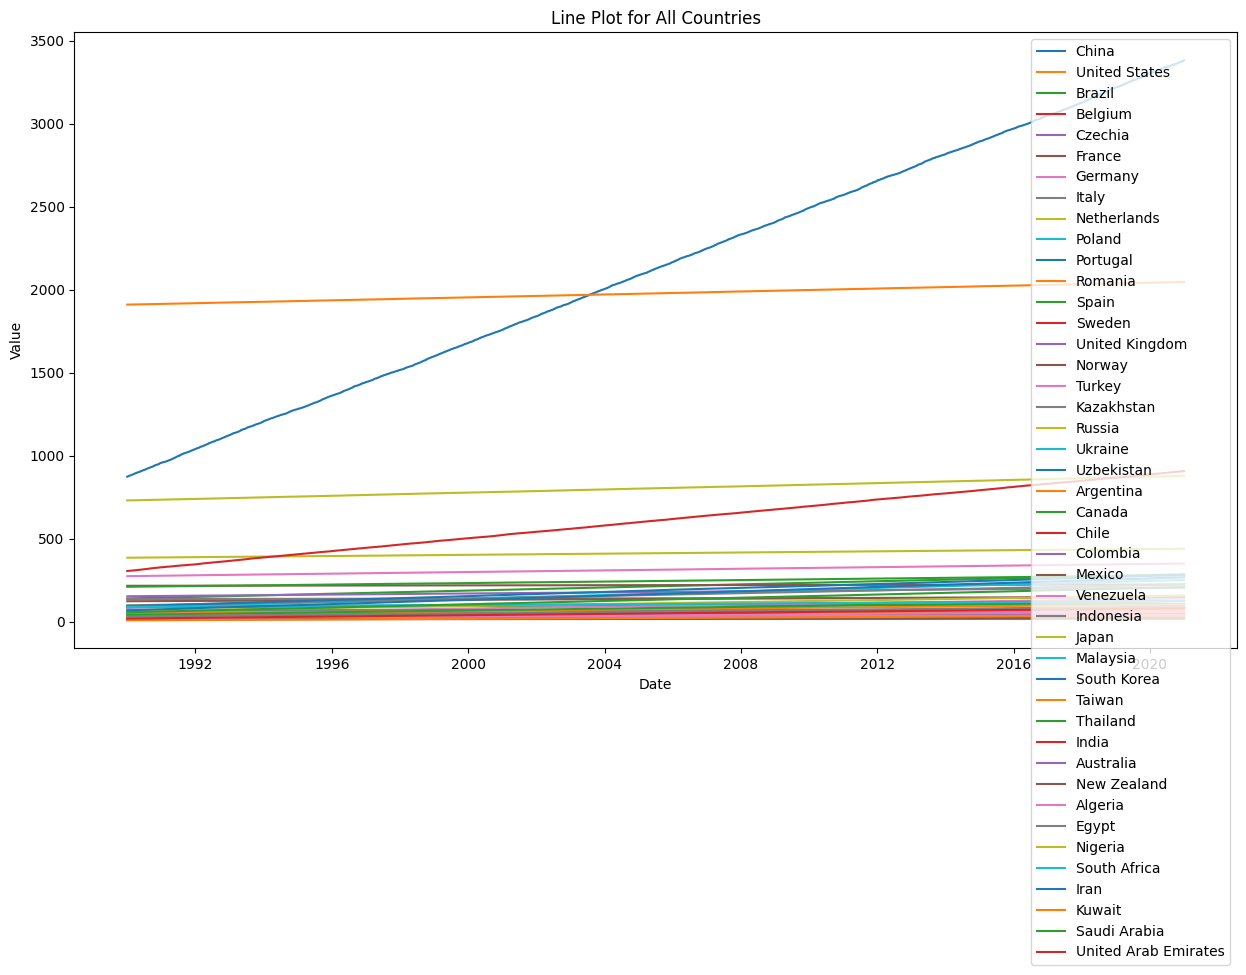

In [ ]:
#lets viaulize the trend of this features
# Set the figure size
plt.figure(figsize=(15, 8))

# Loop through all columns (excluding the 'Date' column)
for column in df8.columns:
    if column != 'Date':
        sns.lineplot(x=df8['Date'], y=df8[column], label=column)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Plot for All Countries')

# Show a legend
plt.legend()

# Display the plot
plt.show()

#Geo_spatial analysis of the Top 20 Countries

In [ ]:
#upload a world map shapefile
from google.colab import files
uploaded = files.upload()


Saving ne_10m_admin_0_countries.zip to ne_10m_admin_0_countries.zip


In [ ]:
#import and unzip the shapefile
import zipfile
import geopandas as gpd

with zipfile.ZipFile('ne_10m_admin_0_countries.zip', 'r') as zip_ref:
    zip_ref.extractall('world_map')

# Load the shapefile
gdf = gpd.read_file('world_map/ne_10m_admin_0_countries.shp')


In [ ]:
# Create a new DataFrame with the 'Total (TWh)' column renamed to 'Total_Energy_Consumption'
geo_top20 = df3.rename(columns={'Total (TWh)': 'Total_Energy_Consumption'})


# Inspect the attribute table, including the common identifier
#print(gdf.head())
# Merge based on the 'Country' column in the energy data and 'SOVEREIGNT' in the shapefile
geo_energy = gdf.merge(geo_top20, left_on='SOVEREIGNT', right_on='Country', how='left')



### Chloropleth Map for geo visualization

Text(105.47222222222221, 0.5, 'Latitude')

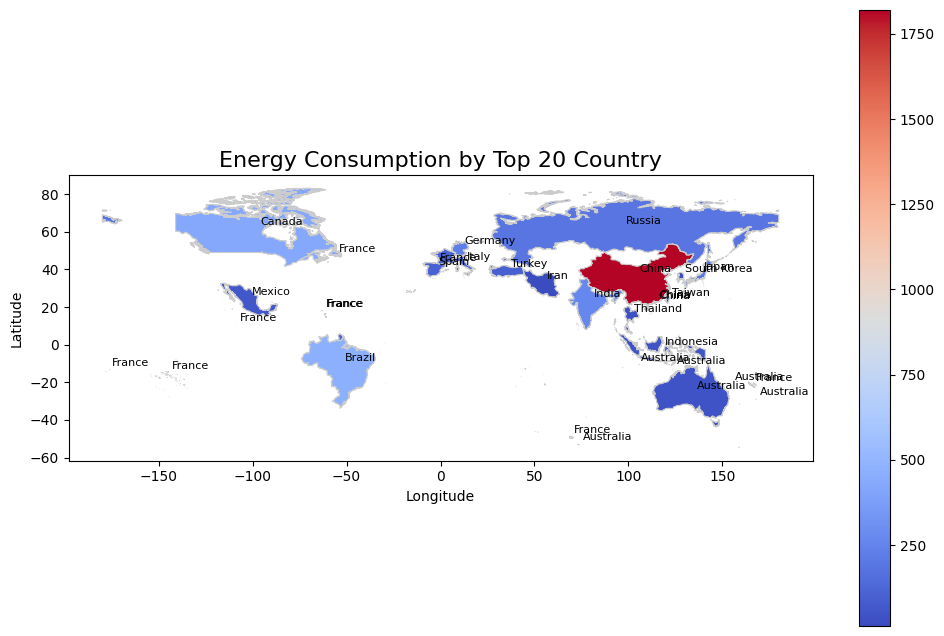

In [ ]:
#geospatial visualization using chloropleth map
# Set the font family to 'DejaVu Sans'
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_energy.plot(column='Total_Energy_Consumption', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


# List of countries for which you want to add labels
countries_to_label = [
    'China', 'USA', 'Brazil', 'Canada', 'India', 'Germany', 'Russia', 'Japan',
    'France', 'Italy', 'UK', 'Spain', 'Turkey', 'Mexico', 'Australia',
    'Indonesia', 'Thailand', 'South Korea', 'Iran', 'Taiwan'
]

# Adjust the font size for country labels
label_fontsize = 8

# Add country names as labels to the map for the specified countries
for idx, row in geo_energy.iterrows():
    if row['Country'] in countries_to_label:
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        label = row['Country']
        plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=label_fontsize)

# Set the title and labels
ax.set_title('Energy Consumption by Top 20 Country', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

## Geo_spatial analysis of Top 20 Countries Energy Consumption using Choropleth Map

This choropleth map visualizes energy consumption data for the top 20 countries. The color intensity on the map represents the level of energy consumption in each country. Darker colors indicate higher energy consumption, while lighter colors represent lower energy consumption.
the shaoefiles is downloaded from nateral Earth website https://www.naturalearthdata.com/

**Key Insights:**

1. **Energy Consumption Distribution:** The map provides a clear visual representation of how energy consumption is distributed across the top 20 countries. It helps identify countries with the highest and lowest energy consumption.

2. **Regional Variation:** Regional patterns in energy consumption are evident. Some regions may have higher energy consumption due to industrialization, while others may rely more on renewable energy sources.

3. **Energy Policy and Economics:** Differences in energy policies, economic factors, and energy resources contribute to the variation in energy consumption. The map highlights countries leading in energy consumption and those with room for improvement.

4. **Sustainability and Environment:** Higher energy consumption can impact the environment through increased emissions and resource depletion. The map can inform discussions about sustainability and the transition to cleaner energy sources.

5. **Data-Driven Decision Making:** Analyzing energy consumption through a choropleth map allows decision-makers to target energy efficiency measures and sustainable practices where they are needed most.

we can use this choropleth map to gain insights into the energy consumption landscape of the top 20 countries and to inform discussions on energy policies, sustainability, and environmental impact.
link to the shapefile https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip


### To further understand the indepth relationship between and among the dataset. some data set are concatenated to form a new dataset for further exploratory analysis.

In [ ]:

#creating new df from dfs to make deeper understanding of the datasets
df1['Source Type'] = 'Renewable'
df2['Source Type'] = 'Non-Renewable'
new_df= pd.concat([df1, df2], ignore_index=True)

# Extract the 'Country' column from df3
country_column = df3['Country']

# Merge the extracted 'Country' column with the merged df1 and df2
new_df['Country'] = country_column

In [ ]:
# Basic EDA on merged datasets
# Summary statistics
summary_stats = new_df.describe()
summary_stats


Contribution (TWh)
count           17.000000
mean          4951.581765
std           6420.435243
min             36.020000
25%            114.040000
50%           2636.030000
75%           6384.250000
max          19448.160000

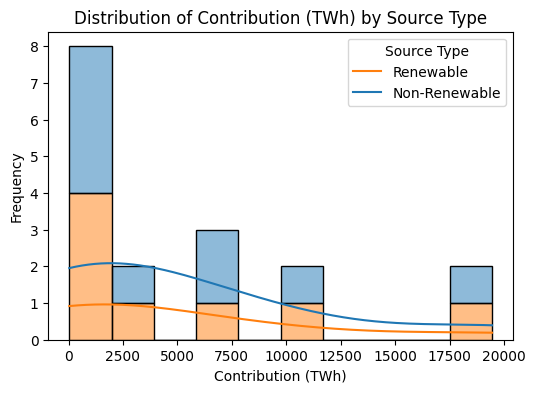

In [ ]:
# Rename the 'Contribution (TWh)' column to 'Contribution_TWh'
new_df.rename(columns={'Contribution (TWh)': 'Contribution_TWh'}, inplace=True)

plt.figure(figsize=(6, 4))
sns.histplot(data=new_df, x='Contribution_TWh', bins=10, kde=True, hue='Source Type', multiple='stack')
plt.title('Distribution of Contribution (TWh) by Source Type')
plt.xlabel('Contribution (TWh)')
plt.ylabel('Frequency')
plt.legend(title='Source Type', labels=['Renewable', 'Non-Renewable'])
plt.show()



### the hisplot above showed the distribution of both energy sources i.e renewable and nonrenewable, with the renewable having higher contribution than that of non-renewable energy source.

In [ ]:
new_df.head()

Mode of Generation  Contribution_TWh Source Type Country
0              Hydro           9863.33   Renewable   China
1               Wind           5882.82   Renewable     USA
2            Biofuel           2636.03   Renewable  Brazil
3           Solar PV            841.87   Renewable  Canada
4         Geothermal            114.04   Renewable   India

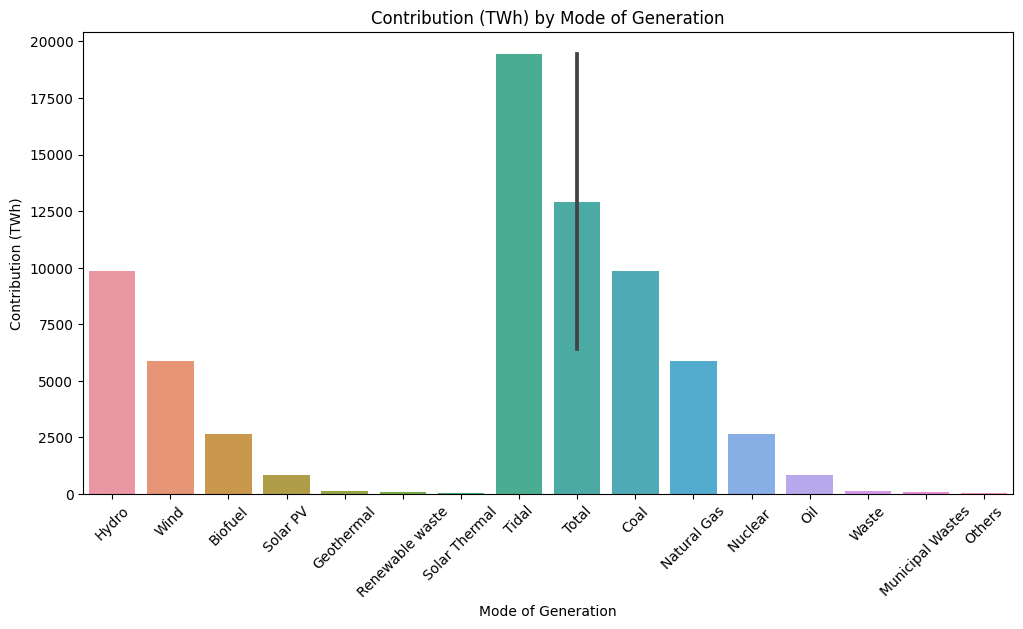

In [ ]:
# Bar plot for 'Contribution (TWh)' by 'Mode of Generation'
plt.figure(figsize=(12, 6))
sns.barplot(data=new_df, x='Mode of Generation', y='Contribution_TWh')
plt.title('Contribution (TWh) by Mode of Generation')
plt.xlabel('Mode of Generation')
plt.ylabel('Contribution (TWh)')
plt.xticks(rotation=45)
plt.show()


### the bar plot above showed a side by side comparison on the contribution of the energy sources, highlighting the major contributors in the two sources i.e hydro, wind, Biofuel and solar PV from the renewable source and Coal, Natural Gas, neclear and Oil from the non-renewable source. This analysis, points out mode of energy that has been receiving major attention as well as areas to explore in transitioning to renewable energy as well areas to overcome or pay attention to in thew non-renewable source if we must transition to the renewable energy source.

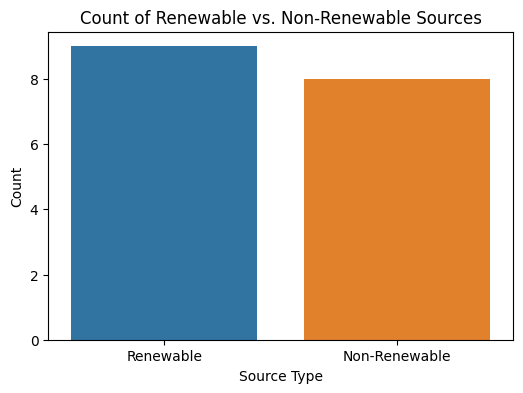

In [ ]:
# Countplot for 'Source Type'
plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='Source Type')
plt.title('Count of Renewable vs. Non-Renewable Sources')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.show()

<Figure size 1000x800 with 0 Axes>

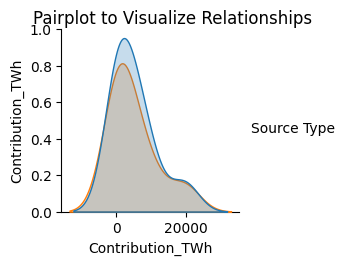

In [ ]:
# Pairplot to visualize relationships
plt.figure(figsize=(10, 8))
sns.pairplot(data=new_df, hue='Source Type', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pairplot to Visualize Relationships', y=1.02)
plt.show()

In [ ]:

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df, x='Source Type', y='Contribution_TWh')
plt.title('Box Plot of Contribution_TWh by Source Type')
plt.xticks(rotation=45)
plt.show()

# Calculate the IQR (Interquartile Range)
Q1 = new_df.groupby('Source Type')['Contribution_TWh'].quantile(0.25)
Q3 = new_df.groupby('Source Type')['Contribution_TWh'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Detect outliers using the IQR method
outliers = new_df[((new_df['Contribution_TWh'] < (Q1 - threshold * IQR)) | (new_df['Contribution_TWh'] > (Q3 + threshold * IQR))]
print("Outliers:")
print(outliers)



SyntaxError: ignored

### DATA PREPROCESSING

Data granulation from yearly to daily energy consumption data allows us to harness the power of detailed insights. By breaking down annual values into daily granularity, we unlock the potential to capture subtle, day-to-day variations in energy consumption. This not only enhances our understanding of consumption patterns but also empowers more accurate and robust time series forecasting. With this larger dataset, our models can better adapt to the intricacies of daily changes, leading to more precise predictions and improved decision-making in the energy sector.

In [ ]:
df5.head()

Year  China  United States  Brazil  Belgium  Czechia  France  Germany  \
0  1990.0  874.0         1910.0   141.0     48.0     50.0   225.0    351.0   
1  1991.0  848.0         1925.0   143.0     50.0     45.0   237.0    344.0   
2  1992.0  877.0         1964.0   145.0     51.0     44.0   234.0    338.0   
3  1993.0  929.0         1998.0   148.0     49.0     43.0   238.0    335.0   
4  1994.0  973.0         2036.0   156.0     52.0     41.0   231.0    333.0   

   Italy  Netherlands  ...  Australia  New Zealand  Algeria  Egypt  Nigeria  \
0  147.0         67.0  ...       86.0         14.0     22.0   33.0     66.0   
1  150.0         69.0  ...       85.0         14.0     23.0   33.0     70.0   
2  149.0         69.0  ...       87.0         14.0     24.0   34.0     72.0   
3  149.0         70.0  ...       91.0         15.0     24.0   35.0     74.0   
4  147.0         70.0  ...       91.0         15.0     23.0   34.0     72.0   

   South Africa  Iran  Kuwait  Saudi Arabia  United Arab Emirates  
0          90.0  69.0     9.0          58.0                  20.0  
1          92.0  77.0     3.0          68.0                  23.0  
2          88.0  81.0     9.0          77.0                  22.0  
3          94.0  87.0    12.0          80.0                  23.0  
4          98.0  97.0    14.0          84.0                  26.0  

[5 rows x 45 columns]

In [ ]:
df5['Year'].dtype

dtype('float64')

In [ ]:
#convert to a year type column
df5['Year'] = pd.to_datetime(df5['Year'])

In [ ]:
def update_df7(df7, df5):
    # Iterate through each row in df7
    for index, row in df7.iterrows():
        # Extract the year from the date in the row
        year = int(row['Date'].split('-')[-1])

        # Check if the year exists in df5
        if year in df5.columns:
            # Calculate the lower and upper bounds for the random value
            lower_bound = df5.loc[year].min() * 0.9
            upper_bound = df5.loc[year].max() * 1.1

            # Generate a random value within the specified range
            random_value = random.uniform(lower_bound, upper_bound)

            # Update the corresponding column in df7 with the random value
            df7.at[index, year] = random_value

    return df7

# Example usage
# Assuming df7 contains a 'Date' column and df5 contains the data for different years and countries
updated_df7 = update_df7(df7, df5)


In [ ]:
def generate_numbers_with_mean(mean, size):
    # Generate random numbers from a normal distribution with the given mean
    numbers = np.random.normal(mean, 1, size)
    return numbers

# Example usage
mean = 50  # Change this to your desired mean
size = 10  # Change this to the number of random numbers you want
result = generate_numbers_with_mean(mean, size)
print(result)


In [ ]:
# Define the start and end dates for the date range
start_date = datetime(1990, 1, 1)
end_date = datetime(2020, 12, 31)

# Create an empty list to store the dates
dates = []

# Generate the date range
current_date = start_date
while current_date <= end_date:
    # Check if the current year is a leap year
    if not (current_date.year % 4 == 0 and (current_date.year % 100 != 0 or current_date.year % 400 == 0)):
        dates.append(current_date)

    current_date += timedelta(days=1)

# Create a DataFrame with the filtered dates
date_df = pd.DataFrame({'Date': dates})

# Print the DataFrame
print(date_df)


In [ ]:
# Create a DataFrame with a date range
date_range = pd.date_range(start='1970-01-01', end='2020-12-31', freq='D')
df_dates = pd.DataFrame({'Date': date_range})

# Create an example DataFrame
data = {'Value1': [1, 2, 3, 4], 'Value2': ['A', 'B', 'C', 'D']}
df_example = pd.DataFrame(data)

# Combine the DataFrames
combined_df = pd.concat([df_example, df_dates], axis=1)

# Display the combined DataFrame
print(combined_df)


In [ ]:
# Create a sample DataFrame with a date column
data = {'Date': ['2021-01-15', '2022-03-25', '2023-05-10']}
df = pd.DataFrame(data)

# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Create a new 'Year' column containing the years
df['Year'] = df['Date'].dt.year

# Display the DataFrame with the 'Year' column
print(df)


In [ ]:
def generate_daily_values(original_dataset, output_file):
    granulated_dataset = pd.DataFrame()

    # Iterate through each row (year) in the original dataset
    for _, row in original_dataset.iterrows():
        year = row['Year']
        original_values = row[1:]

        # Replace NaN values with 0
        original_values = original_values.fillna(0)

        # Create a list of datetime objects for each day in the year
        start_date = datetime(year, 1, 1)
        end_date = datetime(year, 12, 31)
        date_list = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

        # Create a new DataFrame for the year with daily values
        year_data = pd.DataFrame({'Date': date_list})
        for country, val in original_values.items():
            daily_values = [random.uniform(0.9 * val, 1.1 * val) for _ in range(len(date_list))]
            year_data[country] = daily_values

        granulated_dataset = pd.concat([granulated_dataset, year_data], ignore_index=True)

    # Save the granulated dataset to a CSV file
    granulated_dataset.to_csv(output_file, index=False)

# Example usage:
# original_dataset = pd.read_csv('Country_Consumption_TWH.csv')
# generate_daily_values(original_dataset, 'Granulated_Daily_Country_Consumption_TWH.csv')


In [ ]:
def perform_data_granulation(original_dataset, output_file):
    # Create a copy of the original dataset
    granulated_dataset = original_dataset.copy()

    # Iterate through each row (year) in the dataset
    for index, row in granulated_dataset.iterrows():
        year = row['Year']

        # Iterate through each column (country) and granulate data
        for country in granulated_dataset.columns[1:]:
            original_value = row[country]

            # Generate a random value 10% less or greater than the mean
            mean = original_dataset[original_dataset['Year'] == year][country].mean()
            random_value = original_value + random.uniform(-0.1 * mean, 0.1 * mean)

            # Update the value in the new dataset
            granulated_dataset.at[index, country] = random_value

    # Save the granulated dataset to a CSV file
    granulated_dataset.to_csv(output_file, index=False)

# Example usage:
# original_dataset = pd.read_csv('Country_Consumption_TWH.csv')
# perform_data_granulation(original_dataset, 'Granulated_Country_Consumption_TWH.csv')


In [ ]:
df5.head()

Year  China  United States  Brazil  Belgium  \
0 1970-01-01 00:00:00.000001990  874.0         1910.0   141.0     48.0   
1 1970-01-01 00:00:00.000001991  848.0         1925.0   143.0     50.0   
2 1970-01-01 00:00:00.000001992  877.0         1964.0   145.0     51.0   
3 1970-01-01 00:00:00.000001993  929.0         1998.0   148.0     49.0   
4 1970-01-01 00:00:00.000001994  973.0         2036.0   156.0     52.0   

   Czechia  France  Germany  Italy  Netherlands  ...  Australia  New Zealand  \
0     50.0   225.0    351.0  147.0         67.0  ...       86.0         14.0   
1     45.0   237.0    344.0  150.0         69.0  ...       85.0         14.0   
2     44.0   234.0    338.0  149.0         69.0  ...       87.0         14.0   
3     43.0   238.0    335.0  149.0         70.0  ...       91.0         15.0   
4     41.0   231.0    333.0  147.0         70.0  ...       91.0         15.0   

   Algeria  Egypt  Nigeria  South Africa  Iran  Kuwait  Saudi Arabia  \
0     22.0   33.0     66.0          90.0  69.0     9.0          58.0   
1     23.0   33.0     70.0          92.0  77.0     3.0          68.0   
2     24.0   34.0     72.0          88.0  81.0     9.0          77.0   
3     24.0   35.0     74.0          94.0  87.0    12.0          80.0   
4     23.0   34.0     72.0          98.0  97.0    14.0          84.0   

   United Arab Emirates  
0                  20.0  
1                  23.0  
2                  22.0  
3                  23.0  
4                  26.0  

[5 rows x 45 columns]

In [ ]:
# Create a new 'Year' column containing the years
df5['Year'] = df5['Year'].dt.year

In [ ]:
df5.head()

Year  China  United States  Brazil  Belgium  Czechia  France  Germany  \
0  1970.0  874.0         1910.0   141.0     48.0     50.0   225.0    351.0   
1  1970.0  848.0         1925.0   143.0     50.0     45.0   237.0    344.0   
2  1970.0  877.0         1964.0   145.0     51.0     44.0   234.0    338.0   
3  1970.0  929.0         1998.0   148.0     49.0     43.0   238.0    335.0   
4  1970.0  973.0         2036.0   156.0     52.0     41.0   231.0    333.0   

   Italy  Netherlands  ...  Australia  New Zealand  Algeria  Egypt  Nigeria  \
0  147.0         67.0  ...       86.0         14.0     22.0   33.0     66.0   
1  150.0         69.0  ...       85.0         14.0     23.0   33.0     70.0   
2  149.0         69.0  ...       87.0         14.0     24.0   34.0     72.0   
3  149.0         70.0  ...       91.0         15.0     24.0   35.0     74.0   
4  147.0         70.0  ...       91.0         15.0     23.0   34.0     72.0   

   South Africa  Iran  Kuwait  Saudi Arabia  United Arab Emirates  
0          90.0  69.0     9.0          58.0                  20.0  
1          92.0  77.0     3.0          68.0                  23.0  
2          88.0  81.0     9.0          77.0                  22.0  
3          94.0  87.0    12.0          80.0                  23.0  
4          98.0  97.0    14.0          84.0                  26.0  

[5 rows x 45 columns]

In [ ]:
# Assuming you have a DataFrame named 'combined_df'
num_columns = df5.shape[1]

# Print the number of columns
print("Number of columns:", num_columns)

Number of columns: 45


In [ ]:
# Create a DataFrame with a date range
date = pd.date_range(start='1990-01-01', end='2020-12-31', freq='D')

df7 = pd.DataFrame({'Date': date})

df7

Date
0     1990-01-01
1     1990-01-02
2     1990-01-03
3     1990-01-04
4     1990-01-05
...          ...
11318 2020-12-27
11319 2020-12-28
11320 2020-12-29
11321 2020-12-30
11322 2020-12-31

[11323 rows x 1 columns]

In [ ]:
df7.head()

Date
0 1990-01-01
1 1990-01-02
2 1990-01-03
3 1990-01-04
4 1990-01-05

In [ ]:
# Create new columns with the  list of countries
country=['China', 'United States', 'Brazil', 'Belgium', 'Czechia',
   'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
   'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
   'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
   'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
   'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
   'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
   'Kuwait', 'Saudi Arabia', 'United Arab Emirates']

# Create a new column for each country in df7
for c in country:
    df7[c] = None  # You can set None or any other initial value

# Example usage:
# The 'df7' DataFrame now has columns with the names of the countries from the 'country' list
print(df7)


            Date China United States Brazil Belgium Czechia France Germany  \
0     1990-01-01  None          None   None    None    None   None    None   
1     1990-01-02  None          None   None    None    None   None    None   
2     1990-01-03  None          None   None    None    None   None    None   
3     1990-01-04  None          None   None    None    None   None    None   
4     1990-01-05  None          None   None    None    None   None    None   
...          ...   ...           ...    ...     ...     ...    ...     ...   
11318 2020-12-27  None          None   None    None    None   None    None   
11319 2020-12-28  None          None   None    None    None   None    None   
11320 2020-12-29  None          None   None    None    None   None    None   
11321 2020-12-30  None          None   None    None    None   None    None   
11322 2020-12-31  None          None   None    None    None   None    None   

      Italy Netherlands  ... Australia New Zealand Algeria Egyp

In [ ]:
#data granulation at work
# Define the lower and upper bounds for the random values
country=['China', 'United States', 'Brazil', 'Belgium', 'Czechia',
   'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
   'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
   'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
   'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
   'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
   'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
   'Kuwait', 'Saudi Arabia', 'United Arab Emirates']
country_asc = ['China', 'United States', 'Brazil', 'Belgium','France','Netherlands','Portugal','Spain', 'Sweden', 'Norway', 'Turkey','Argentina', 'Canada',
   'Chile', 'Colombia', 'Mexico','Indonesia','Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
   'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa','Iran',
   'Kuwait', 'Saudi Arabia', 'United Arab Emirates'
]
country_desc = ['Czechia', 'Germany', 'Italy','Poland', 'Romania', 'United Kingdom', 'Kazakhstan', 'Russia', 'Ukraine','Uzbekistan', 'Venezuela', 'Japan',

]
for c in country_asc:
  # Generate a random sample of 11323 values within the specified range
  random_sample = np.sort(np.round(np.random.uniform(df5[c][0], df5[c][30], 11323), 3))
   # Create a 'China' column in df7 and assign the random sample
  df7[c] = random_sample
for c in country_desc:
  # Generate a random sample in ascending order
  ascending_sample = np.sort(np.round(np.random.uniform(df5[c][0], df5[c][30], 11323), 3))
  # Reverse the ascending sample to get it in descending order
  descending_sample = ascending_sample[::-1]
  df7[c] = descending_sample

In [ ]:
df7

Date     China  United States   Brazil  Belgium   France  \
0     1990-01-01   874.307       1910.024  141.003   48.000  217.000   
1     1990-01-02   874.425       1910.026  141.027   48.001  217.002   
2     1990-01-03   874.967       1910.031  141.042   48.001  217.003   
3     1990-01-04   875.088       1910.033  141.070   48.001  217.004   
4     1990-01-05   875.288       1910.057  141.077   48.001  217.004   
...          ...       ...            ...      ...      ...      ...   
11318 2020-12-27  3380.732       2045.933  285.941   50.999  224.999   
11319 2020-12-28  3380.889       2045.955  285.952   51.000  224.999   
11320 2020-12-29  3380.920       2045.956  285.962   51.000  225.000   
11321 2020-12-30  3380.939       2045.963  285.995   51.000  225.000   
11322 2020-12-31  3380.985       2045.987  285.998   51.000  225.000   

       Netherlands  Portugal    Spain  Sweden  ...  Kazakhstan   Russia  \
0           67.001    17.000   90.002    47.0  ...      72.999  878.943   
1           67.001    17.000   90.003    47.0  ...      72.999  878.927   
2           67.001    17.000   90.008    47.0  ...      72.999  878.926   
3           67.001    17.001   90.008    47.0  ...      72.999  878.913   
4           67.002    17.002   90.009    47.0  ...      72.998  878.873   
...            ...       ...      ...     ...  ...         ...      ...   
11318       69.999    19.998  106.995    47.0  ...      70.002  731.052   
11319       69.999    19.998  106.996    47.0  ...      70.002  731.051   
11320       69.999    19.999  106.997    47.0  ...      70.001  731.045   
11321       70.000    19.999  106.998    47.0  ...      70.001  731.013   
11322       70.000    19.999  106.998    47.0  ...      70.000  731.005   

       Ukraine  Uzbekistan  Venezuela    Japan     Iran  Kuwait  Saudi Arabia  \
0      251.985      47.000     39.998  439.968   69.020   9.004        58.019   
1      251.955      47.000     39.997  439.950   69.022   9.005        58.031   
2      251.929      46.999     39.996  439.948   69.042   9.006        58.033   
3      251.924      46.999     39.996  439.943   69.056   9.007        58.055   
4      251.903      46.999     39.993  439.942   69.059   9.014        58.063   
...        ...         ...        ...      ...      ...     ...           ...   
11318   86.051      44.001     29.003  386.016  267.918  37.981       208.914   
11319   86.042      44.001     29.003  386.010  267.922  37.984       208.921   
11320   86.003      44.000     29.002  386.008  267.924  37.986       208.924   
11321   86.001      44.000     29.002  386.003  267.926  37.987       208.967   
11322   86.000      44.000     29.001  386.001  267.979  37.999       208.997   

       United Arab Emirates  
0                    20.013  
1                    20.015  
2                    20.016  
3                    20.017  
4                    20.017  
...                     ...  
11318                80.968  
11319                80.970  
11320                80.971  
11321                80.975  
11322                80.992  

[11323 rows x 45 columns]

In [ ]:
#save the granulated dataset to a new .csv file
# Define the file path where you want to save the CSV file
file_path = "/content/drive/MyDrive/Insights_IQ-Premiere-Project-HDSC-23/Dataset/Granulated_Country_Consumption_TWH.csv"  # Replace with the desired file path and name

# Save the DataFrame to a CSV file
df7.to_csv(file_path, index=False)  # Set index to False if you don't want to save the index column

In [ ]:
df8 = pd.read_csv('https://github.com/Gbekoilias/Insights_IQ-Premiere-Project-HDSC-23/blob/main/Dataset/Granulated_Country_Consumption_TWH%20(1).csv?raw=true')
df8.head()

Date    China  United States   Brazil  Belgium   France  Netherlands  \
0  1990-01-01  874.307       1910.024  141.003   48.000  217.000       67.001   
1  1990-01-02  874.425       1910.026  141.027   48.001  217.002       67.001   
2  1990-01-03  874.967       1910.031  141.042   48.001  217.003       67.001   
3  1990-01-04  875.088       1910.033  141.070   48.001  217.004       67.001   
4  1990-01-05  875.288       1910.057  141.077   48.001  217.004       67.002   

   Portugal   Spain  Sweden  ...  Kazakhstan   Russia  Ukraine  Uzbekistan  \
0    17.000  90.002    47.0  ...      72.999  878.943  251.985      47.000   
1    17.000  90.003    47.0  ...      72.999  878.927  251.955      47.000   
2    17.000  90.008    47.0  ...      72.999  878.926  251.929      46.999   
3    17.001  90.008    47.0  ...      72.999  878.913  251.924      46.999   
4    17.002  90.009    47.0  ...      72.998  878.873  251.903      46.999   

   Venezuela    Japan    Iran  Kuwait  Saudi Arabia  United Arab Emirates  
0     39.998  439.968  69.020   9.004        58.019                20.013  
1     39.997  439.950  69.022   9.005        58.031                20.015  
2     39.996  439.948  69.042   9.006        58.033                20.016  
3     39.996  439.943  69.056   9.007        58.055                20.017  
4     39.993  439.942  69.059   9.014        58.063                20.017  

[5 rows x 45 columns]

In [ ]:
df8.shape

(11323, 45)

In [ ]:
#since this is a TimeSeries problem, we have to parse the dates
df8['Date'] = pd.to_datetime(df8['Date'])
df8.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

In [ ]:
#check for missing values
df8.isnull().any().sum()

0

So, no missing or NaN value

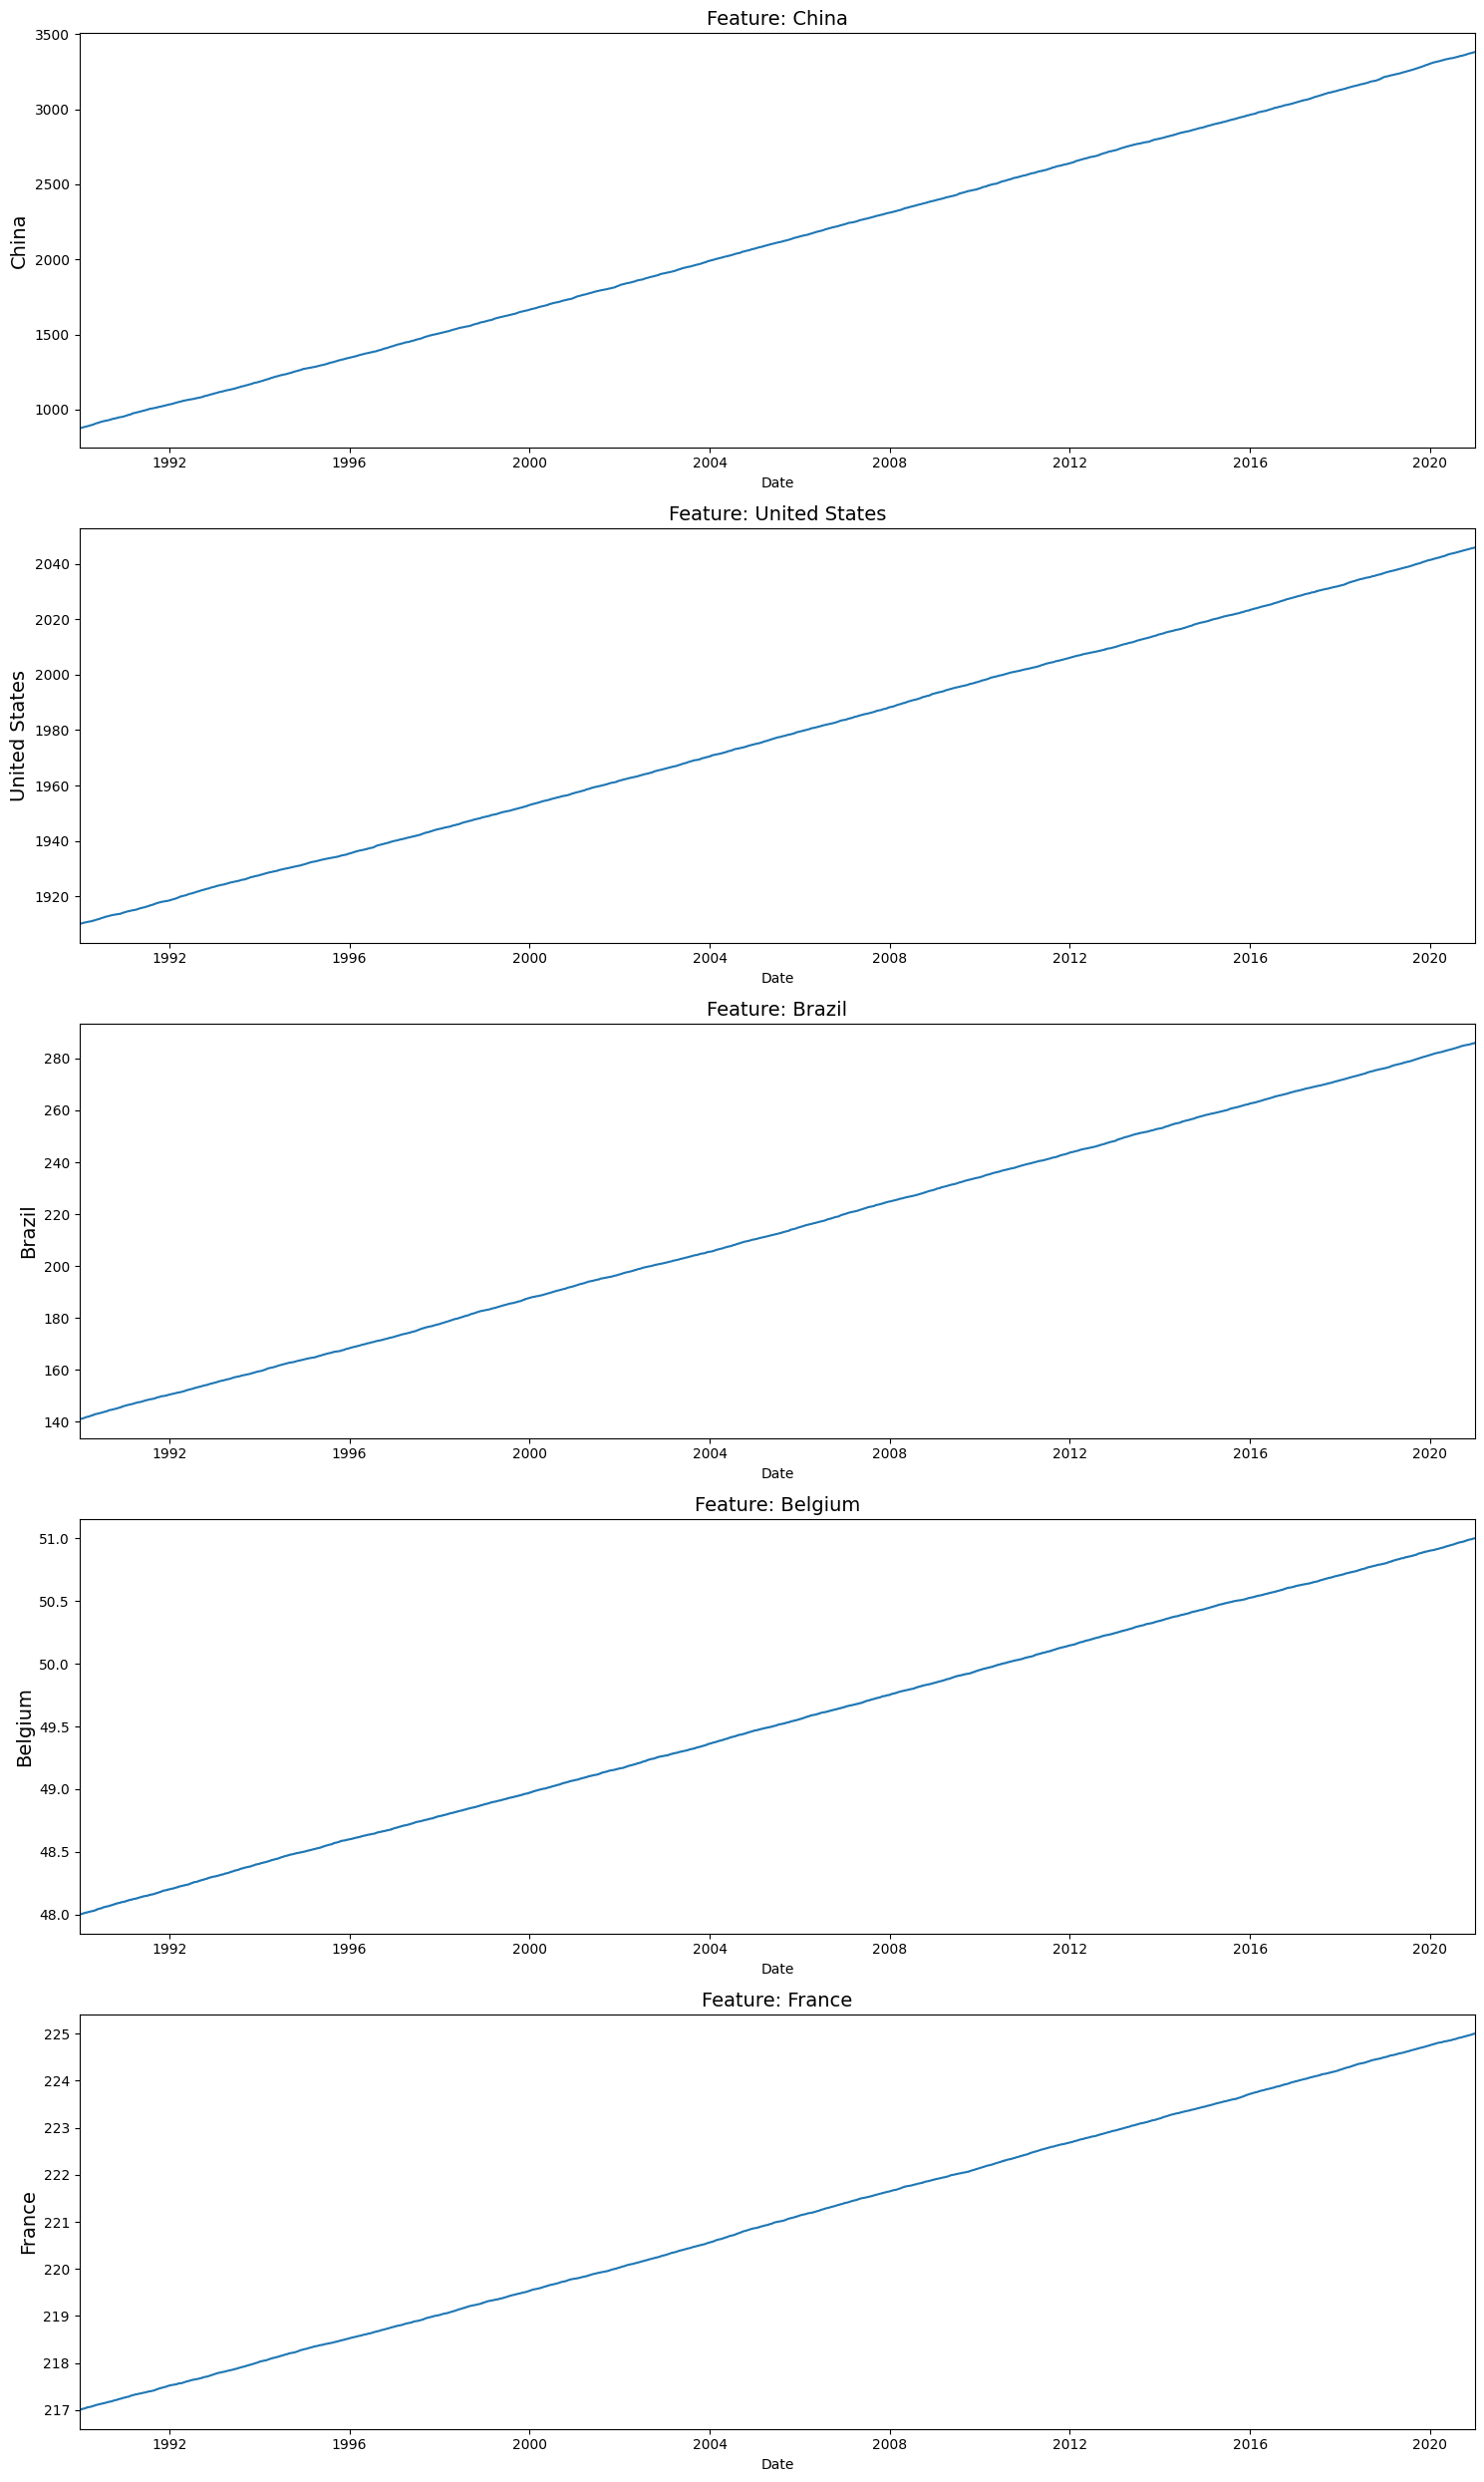

In [ ]:
# Create subplots
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

# Loop through columns and create line plots
for i, column in enumerate(df8.drop('Date', axis=1).columns):
    if i < 5:  # Check that i is within the number of subplots (0 to 4)
        sns.lineplot(x=df8['Date'], y=df8[column], ax=ax[i])
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(column, fontsize=14)
        ax[i].set_xlim([pd.Timestamp('1990-01-01'), pd.Timestamp('2020-12-31')])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
#This function is meant to check the quality of the datetime column
def check_time_series(df, date_column_name):
    # Ensure the DataFrame is sorted by the date column
    df_sorted = df.sort_values(by=[date_column_name])

    # Calculate the time difference between consecutive timestamps
    time_diff = df_sorted[date_column_name].diff()

    # Check if the time differences are equidistant
    is_equidistant = all(time_diff.iloc[1:] == time_diff.iloc[1])

    # Check if timestamps are in chronological order
    is_chronological = all(time_diff.dropna() >= timedelta(0))

    return is_chronological and is_equidistant


# Assuming 'df' is your DataFrame and 'Date' is your date column name
result = check_time_series(df8, 'Date')
if result:
     print("The date column satisfies the rule.")
else:
     print("The date column does not satisfy the rule.")

The date column satisfies the rule.


In [ ]:
country = ['China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates']

In [ ]:
n_countries = len(country)
rows = n_countries // 2  # Create 2 columns for subplots
if n_countries % 2 != 0:
    rows += 1

f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) and (adf_stat < crit_val_1):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) and (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) and (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'

    # Check if the series is constant (all values are the same)
    if not series.var() == 0:
        sns.lineplot(x=df8['Date'], y=series, ax=ax, color=linecolor)
        ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
        ax.set_ylabel(ylabel=title, fontsize=14)

for i, country_name in enumerate(country):
    row = i // 2
    col = i % 2
    visualize_adfuller_results(df8[country_name].values, country_name, ax[row, col])

# Remove empty subplots if there are any
for i in range(n_countries, rows * 2):
    f.delaxes(ax[i // 2, i % 2])

plt.tight_layout()
plt.show()


<ipython-input-45-118e1ff107db>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8[i], ax=ax[1])


<Axes: xlabel='United Arab Emirates', ylabel='Density'>

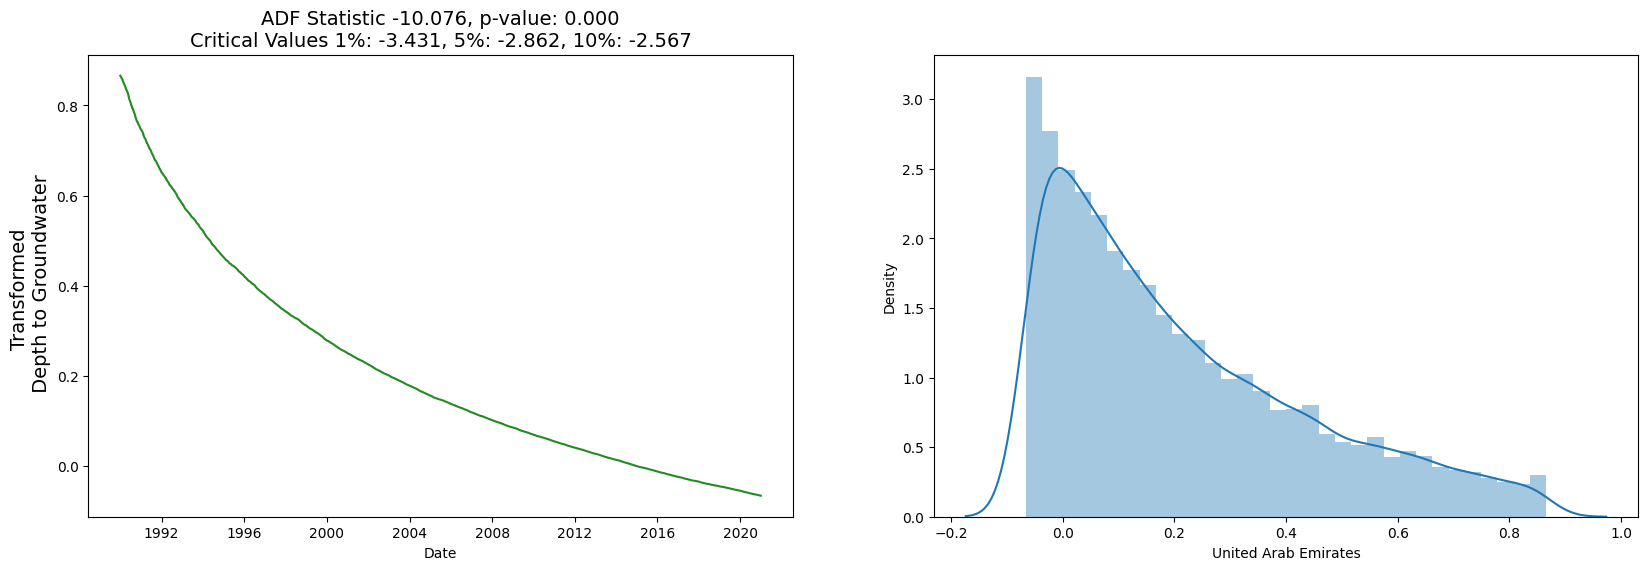

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
for i in country:
  df8[i] = np.log(abs(df8[i]))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df8[i], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df8[i], ax=ax[1])

FEATURE ENGINEERING

In [ ]:
df9.head()

Date    China  United States   Brazil  Belgium   France  Netherlands  \
0 1990-01-01  874.307       1910.024  141.003   48.000  217.000       67.001   
1 1990-01-02  874.425       1910.026  141.027   48.001  217.002       67.001   
2 1990-01-03  874.967       1910.031  141.042   48.001  217.003       67.001   
3 1990-01-04  875.088       1910.033  141.070   48.001  217.004       67.001   
4 1990-01-05  875.288       1910.057  141.077   48.001  217.004       67.002   

   Portugal   Spain  Sweden  ...  Kazakhstan   Russia  Ukraine  Uzbekistan  \
0    17.000  90.002    47.0  ...      72.999  878.943  251.985      47.000   
1    17.000  90.003    47.0  ...      72.999  878.927  251.955      47.000   
2    17.000  90.008    47.0  ...      72.999  878.926  251.929      46.999   
3    17.001  90.008    47.0  ...      72.999  878.913  251.924      46.999   
4    17.002  90.009    47.0  ...      72.998  878.873  251.903      46.999   

   Venezuela    Japan    Iran  Kuwait  Saudi Arabia  United Arab Emirates  
0     39.998  439.968  69.020   9.004        58.019                20.013  
1     39.997  439.950  69.022   9.005        58.031                20.015  
2     39.996  439.948  69.042   9.006        58.033                20.016  
3     39.996  439.943  69.056   9.007        58.055                20.017  
4     39.993  439.942  69.059   9.014        58.063                20.017  

[5 rows x 45 columns]

In [ ]:
# Assuming you have a DataFrame df9 with a 'Date' column
#Extracting new seasonality features
df9['year'] = pd.DatetimeIndex(df9['Date']).year
df9['month'] = pd.DatetimeIndex(df9['Date']).month
df9['day'] = pd.DatetimeIndex(df9['Date']).day
df9['day_of_year'] = pd.DatetimeIndex(df9['Date']).dayofyear
df9['week_of_year'] = pd.DatetimeIndex(df9['Date']).weekofyear
df9['quarter'] = pd.DatetimeIndex(df9['Date']).quarter
df9['season'] = df9['month'] % 12 // 3 + 1

df9[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

<ipython-input-31-45a17c1d62eb>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df9['week_of_year'] = pd.DatetimeIndex(df9['Date']).weekofyear


Date  year  month  day  day_of_year  week_of_year  quarter  season
0 1990-01-01  1990      1    1            1             1        1       1
1 1990-01-02  1990      1    2            2             1        1       1
2 1990-01-03  1990      1    3            3             1        1       1
3 1990-01-04  1990      1    4            4             1        1       1
4 1990-01-05  1990      1    5            5             1        1       1

TypeError: ignored

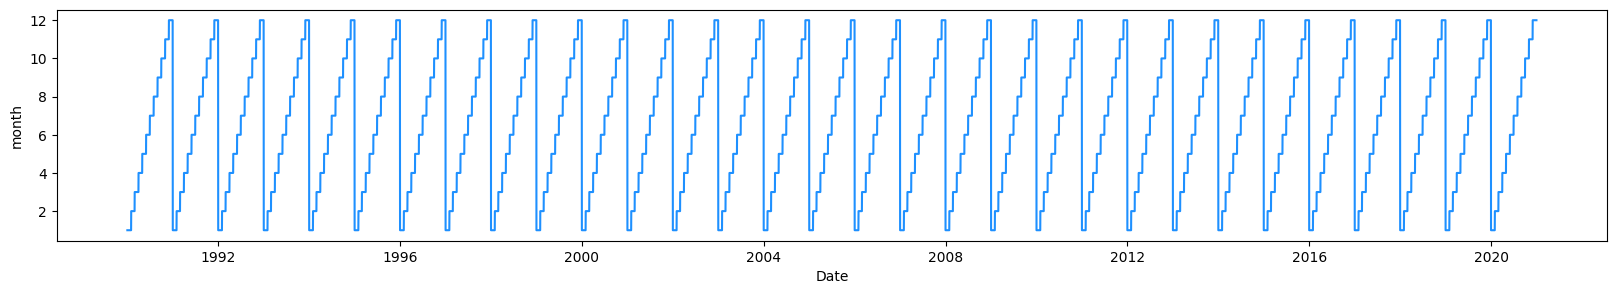

In [ ]:
#The new time features are cyclical.
#For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January).
#This results in a -11 difference, which can confuse a lot of models.
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df9['Date'], y=df9['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

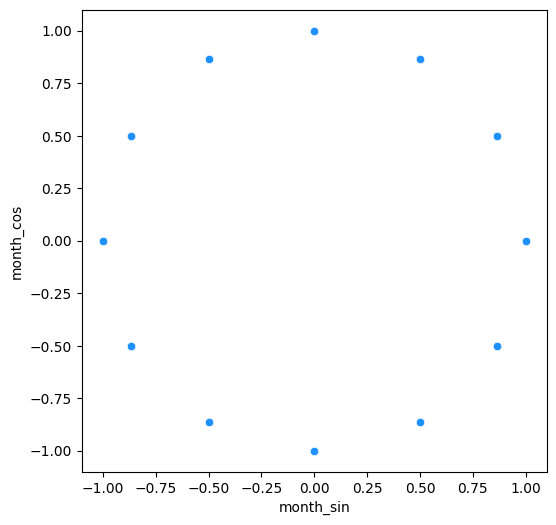

In [ ]:
month_in_year = 12
df9['month_sin'] = np.sin(2*np.pi*df9['month']/month_in_year)
df9['month_cos'] = np.cos(2*np.pi*df9['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df9.month_sin, y=df9.month_cos, color='dodgerblue')
plt.show

## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">TimeSeries Decomposition</p>

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

* **Level**: The average value in the series.
* **Trend**: The increasing or decreasing value in the series.
* **Seasonality**: The repeating short-term cycle in the series.
* **Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:
* **Additive**: $y(t) = Level + Trend + Seasonality + Noise$
* **Multiplicative**: $y(t) = Level * Trend * Seasonality * Noise$

In this case we are going to use function seasonal_decompose() from the [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) library.

In [ ]:
df9.columns

Index(['Date', 'China', 'United States', 'Brazil', 'Belgium', 'France',
       'Netherlands', 'Portugal', 'Spain', 'Sweden', 'Norway', 'Turkey',
       'Argentina', 'Canada', 'Chile', 'Colombia', 'Mexico', 'Indonesia',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Czechia',
       'Germany', 'Italy', 'Poland', 'Romania', 'United Kingdom', 'Kazakhstan',
       'Russia', 'Ukraine', 'Uzbekistan', 'Venezuela', 'Japan', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates', 'year', 'month',
       'day', 'day_of_year', 'week_of_year', 'quarter', 'season', 'month_sin',
       'month_cos'],
      dtype='object')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates']

for column in core_columns:
    decomp = seasonal_decompose(df8[column], period=52, model='additive', extrapolate_trend='freq')
    df8[f"{column}_trend"] = decomp.trend
    df8[f"{column}_seasonal"] = decomp.seasonal

## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center"> Lag</p>


We want to calculate each variable with a `shift()` (lag) to compare the correlationwith the other variables.

You can see [documentation of shift function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) for more information.

In [ ]:
weeks_in_month = 4

for column in core_columns:
    df8[f'{column}_seasonal_shift_b_2m'] = df8[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df8[f'{column}_seasonal_shift_b_1m'] = df8[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df8[f'{column}_seasonal_shift_1m'] = df8[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df8[f'{column}_seasonal_shift_2m'] = df8[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df8[f'{column}_seasonal_shift_3m'] = df8[f'{column}_seasonal'].shift(3 * weeks_in_month)

<ipython-input-36-30a19f5f633c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df8[f'{column}_seasonal_shift_b_2m'] = df8[f'{column}_seasonal'].shift(-2 * weeks_in_month)
<ipython-input-36-30a19f5f633c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df8[f'{column}_seasonal_shift_b_1m'] = df8[f'{column}_seasonal'].shift(-1 * weeks_in_month)
<ipython-input-36-30a19f5f633c>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid


# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center"> Exploratory Data Analysis 📊</p>

Now, we are going to plot the data and try to extract some knowledge.

As we can see, generally the energy consumption keeps increasing in time for all countries

In [ ]:
df8.head()

Date    China  United States   Brazil  Belgium   France  Netherlands  \
0 1990-01-01  874.307       1910.024  141.003   48.000  217.000       67.001   
1 1990-01-02  874.425       1910.026  141.027   48.001  217.002       67.001   
2 1990-01-03  874.967       1910.031  141.042   48.001  217.003       67.001   
3 1990-01-04  875.088       1910.033  141.070   48.001  217.004       67.001   
4 1990-01-05  875.288       1910.057  141.077   48.001  217.004       67.002   

   Portugal   Spain  Sweden  ...  Saudi Arabia_seasonal_shift_b_2m  \
0    17.000  90.002    47.0  ...                          0.000538   
1    17.000  90.003    47.0  ...                          0.000118   
2    17.000  90.008    47.0  ...                         -0.000095   
3    17.001  90.008    47.0  ...                         -0.000857   
4    17.002  90.009    47.0  ...                          0.000127   

   Saudi Arabia_seasonal_shift_b_1m  Saudi Arabia_seasonal_shift_1m  \
0                         -0.000381                             NaN   
1                         -0.000082                             NaN   
2                          0.001027                             NaN   
3                          0.001732                             NaN   
4                          0.000538                       -0.001068   

   Saudi Arabia_seasonal_shift_2m  Saudi Arabia_seasonal_shift_3m  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   

   United Arab Emirates_seasonal_shift_b_2m  \
0                                 -0.000139   
1                                 -0.000572   
2                                 -0.000436   
3                                  0.000274   
4                                  0.000951   

   United Arab Emirates_seasonal_shift_b_1m  \
0                                  0.000098   
1                                 -0.000390   
2                                 -0.000286   
3                                 -0.000417   
4                                 -0.000139   

   United Arab Emirates_seasonal_shift_1m  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                0.001284   

   United Arab Emirates_seasonal_shift_2m  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   United Arab Emirates_seasonal_shift_3m  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  

[5 rows x 353 columns]

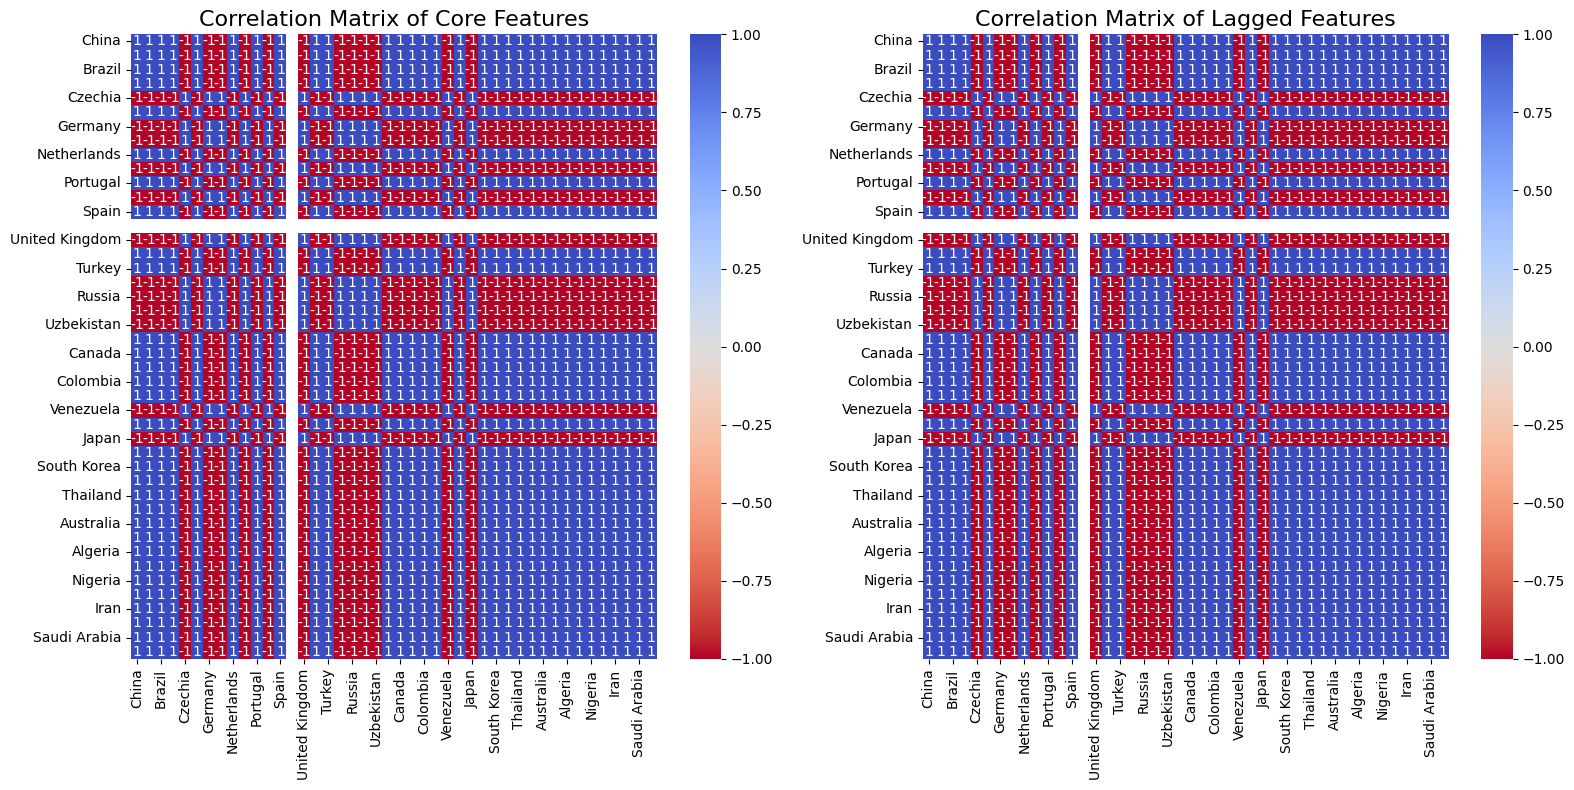

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df8[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = country
corrmat = df8[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

MODELING

In [ ]:
df9.columns

Index(['Date', 'China', 'United States', 'Brazil', 'Belgium', 'France',
       'Netherlands', 'Portugal', 'Spain', 'Sweden', 'Norway', 'Turkey',
       'Argentina', 'Canada', 'Chile', 'Colombia', 'Mexico', 'Indonesia',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Czechia',
       'Germany', 'Italy', 'Poland', 'Romania', 'United Kingdom', 'Kazakhstan',
       'Russia', 'Ukraine', 'Uzbekistan', 'Venezuela', 'Japan', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates', 'year', 'month',
       'day', 'day_of_year', 'week_of_year', 'quarter', 'season', 'month_sin',
       'month_cos'],
      dtype='object')

In [ ]:
# get actual data for county Polk
data_actual = df8[country]
# set seasonal to True
seasonal = True

# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(data_actual,
                      m=12,               # frequency of series
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# print model summary
print(model.summary())

In [ ]:
def get_forecast_group(data, n_periods, seasonal):
    # Initialize empty lists to store forecast data
    data_fc = []
    data_lower = []
    data_upper = []
    data_aic = []
    data_fitted = []

    # Iterate over columns in data
    for group in data.columns:
        # Fit an ARIMA model using the auto_arima function
        data_actual = data[group]
        model = pm.auto_arima(data_actual,
                              start_p=0, start_q=0,
                              max_p=12, max_q=12, # maximum p and q
                              test='adf',         # use adftest to find optimal 'd'
                              seasonal=seasonal,  # TRUE if seasonal series
                              m=12,               # frequency of series
                              d=None,             # let model determine 'd'
                              D=None,             # let model determine 'D'
                              trace=False,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

        # Generate forecast and confidence intervals for n_periods into the future
        fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
        index_of_fc = pd.date_range(pd.to_datetime(data_actual.index[-1])  + relativedelta(months = +1), periods = n_periods, freq = 'MS')

        # Append forecast data to lists
        data_fc.append(fc)
        data_lower.append(confint[:, 0])
        data_upper.append(confint[:, 1])
        data_aic.append(model.aic())
        data_fitted.append(model.fittedvalues())

        # Create dataframes for forecast, lower bound, and upper bound
        df_fc = pd.DataFrame(index = index_of_fc)
        df_lower = pd.DataFrame(index = index_of_fc)
        df_upper = pd.DataFrame(index = index_of_fc)
        df_aic = pd.DataFrame()
        df_fitted = pd.DataFrame(index = data_actual.index)

    # Populate dataframes with forecast data
    i = 0
    for group in data.columns:
        df_fc[group] = data_fc[i][:]
        df_lower[group] = data_lower[i][:]
        df_upper[group] = data_upper[i][:]
        df_aic[group] = data_aic[i]
        df_fitted[group] = data_fitted[i][:]
        i = i + 1

    return df_fc, df_lower, df_upper, df_aic, df_fitted

def get_combined_data(df_actual, df_forecast):
    # Assign input data to separate variables
    data_actual = df_actual
    data_forecast = df_forecast

    # Add a 'desc' column to indicate whether the data is actual or forecast
    data_actual['desc'] = 'Actual'
    data_forecast['desc'] = 'Forecast'

    # Combine actual and forecast data into a single DataFrame and reset the index
    df_act_fc = pd.concat([data_actual, data_forecast]).reset_index()

    # Rename the index column to 'month'
    df_act_fc = df_act_fc.rename(columns={'index': 'month'})

    # Return the combined DataFrame
    return df_act_fc

def get_plot_fc(df_act_fc, df_lower, df_upper, df_fitted, nrow, ncol, figsize_x, figsize_y, category_field_values,  title, ylabel):
    # Set the years and months locators and formatter
    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')

    # Melt the data for plotting
    df_melt = df_act_fc.melt(id_vars = ['month', 'desc'])
    df_melt_fitted = df_fitted.reset_index().melt(id_vars = ['month'])

    # Create subplots and set the title
    fig, axs = plt.subplots(nrow, ncol, figsize = (figsize_x,figsize_y))
    fig.suptitle(title, size = 20, y = 0.90)

    i = 0
    j = 0
    for cat in category_field_values:
        # Filter data for the current category
        df_plot = df_melt[df_melt['variable'] == cat]
        df_lower_plot = df_lower[cat]
        df_upper_plot = df_upper[cat]
        df_plot_fitted = df_melt_fitted[df_melt_fitted['variable'] == cat]

        # Plot the actual and forecasted data
        sns.lineplot(ax = axs[j,i], data = df_plot, x = 'month', y = 'value', hue = 'desc', marker = 'o')
        # Plot the fitted data with dashed lines
        sns.lineplot(ax = axs[j,i], data = df_plot_fitted, x = 'month', y = 'value', dashes=True, alpha = 0.5)
        # Set the x-label, y-label, and fill between the lower and upper bounds of the forecast
        axs[j, i].set_xlabel(cat, size = 15)
        axs[j, i].set_ylabel(ylabel, size = 15)
        axs[j,i].fill_between(df_lower_plot.index,
                      df_lower_plot,
                      df_upper_plot,
                      color='k', alpha=.15)
        # Set the legend and y-limits
        axs[j,i].legend(loc = 'upper left')
        axs[j,i].set_ylim([df_plot['value'].min()-1000, df_plot['value'].max()+1000])

        # Set the x-axis tickers and format
        axs[j,i].xaxis.set_major_locator(years)
        axs[j,i].xaxis.set_major_formatter(years_fmt)
        axs[j,i].xaxis.set_minor_locator(months)

        i = i + 1
        if i >= ncol:
            j = j + 1
            i = 0

    plt.show()

In [ ]:
df9.columns

Index(['Date', 'China', 'United States', 'Brazil', 'Belgium', 'France',
       'Netherlands', 'Portugal', 'Spain', 'Sweden', 'Norway', 'Turkey',
       'Argentina', 'Canada', 'Chile', 'Colombia', 'Mexico', 'Indonesia',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Czechia',
       'Germany', 'Italy', 'Poland', 'Romania', 'United Kingdom', 'Kazakhstan',
       'Russia', 'Ukraine', 'Uzbekistan', 'Venezuela', 'Japan', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates', 'year', 'month',
       'day', 'day_of_year', 'week_of_year', 'quarter', 'season', 'month_sin',
       'month_cos'],
      dtype='object')

In [ ]:
train_size = int(0.85 * len(df9))
test_size = len(df9) - train_size

multivariate_df = df9[['Date', 'China', 'United States', 'Brazil', 'Belgium', 'France',
       'Netherlands', 'Portugal', 'Spain', 'Sweden', 'Norway', 'Turkey',
       'Argentina', 'Canada', 'Chile', 'Colombia', 'Mexico', 'Indonesia',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Czechia',
       'Germany', 'Italy', 'Poland', 'Romania', 'United Kingdom', 'Kazakhstan',
       'Russia', 'Ukraine', 'Uzbekistan', 'Venezuela', 'Japan', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates',]].copy()

train = multivariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, 0]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, 0]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))
model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

9624 1699
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1960.728, Time=5.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1963.430, Time=2.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1962.724, Time=1.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1962.722, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4764.053, Time=0.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 11.891 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9624
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 983.715
Date:                Wed, 25 Oct 2023   AIC                          -1963.430
Time:                        08:06:23   BIC                          -1949.086
Sample:                             0   HQIC                         -1958.566
                               - 9624                        

As we saw in the previous Steps, AutoARIMA (auto_arima) validates that (0,1,0) is the best configuration for (p,d,q).

In [ ]:
print(x_train.shape, y_train.shape)

(9624, 1) (9624, 1)


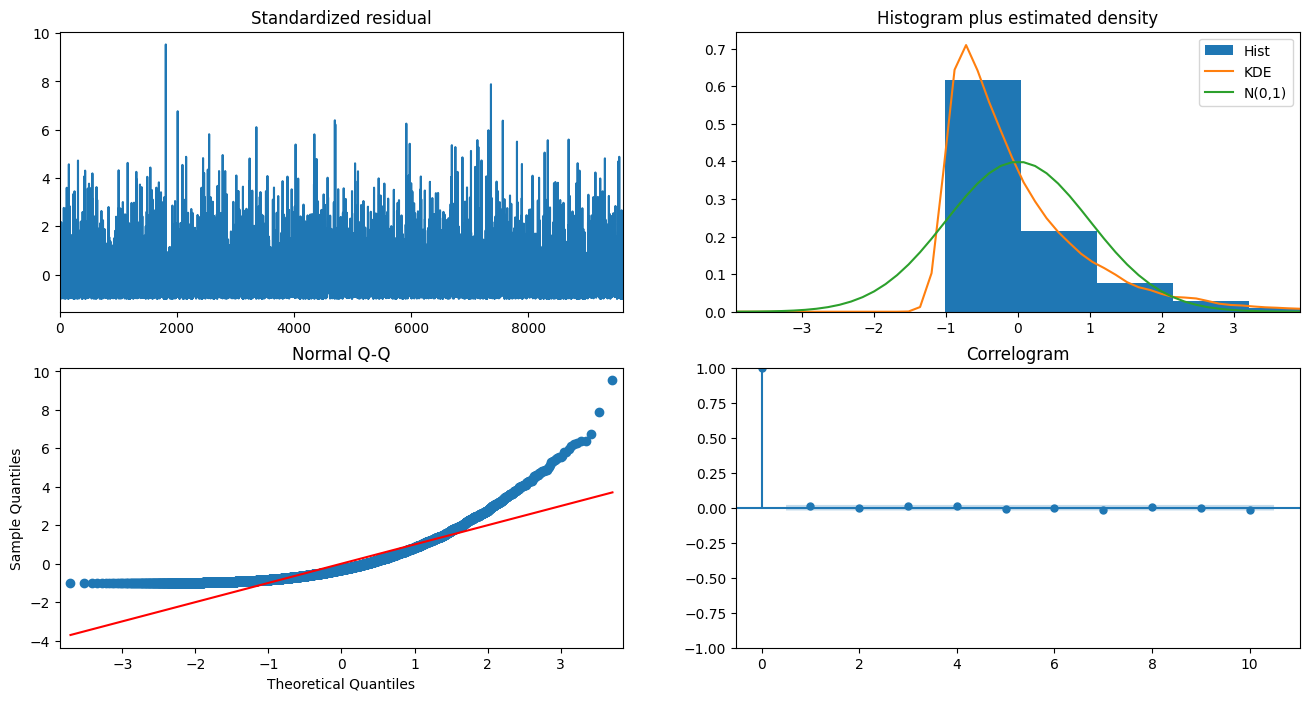

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

So how to interpret the plot diagnostics?

* **Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance between (0,2).

* **Top Right**: The density plot suggest normal distribution with mean zero.

* **Bottom left**: The most part of the blue dots are not on the red line, so it seems that the distribution in very low skewed (as in skewed for me).

* **Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are autocorrelated.

In [ ]:
countries =    ['China', 'United States', 'Brazil', 'Belgium', 'France',
       'Netherlands', 'Portugal', 'Spain', 'Sweden', 'Norway', 'Turkey',
       'Argentina', 'Canada', 'Chile', 'Colombia', 'Mexico', 'Indonesia',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Czechia',
       'Germany', 'Italy', 'Poland', 'Romania', 'United Kingdom', 'Kazakhstan',
       'Russia', 'Ukraine', 'Uzbekistan', 'Venezuela', 'Japan', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates']

In [ ]:
from pmdarima.model_selection import train_test_split
# Specify the size of the validation set (e.g., 20%)
validation_size = 0.2

# Split the data into training and validation sets
train, validation = train_test_split(df9, test_size=validation_size)

In [ ]:
for country in countries:
    # Extract the target variable for the current country
    y = df9[country]
    # Implement the training and forecasting steps for each country


In [ ]:
from pmdarima.arima import auto_arima

# Loop through the list of countries
for country in countries:
    # Extract the target variable for the current country
    y = df9[country]

    # Fit an AutoARIMA model for the current country
    model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())
# Get forecasts for the current country
predictions, conf_int = model.predict(n_periods=len(validation), return_conf_int=True)

# Evaluate the model's performance for the current country
# You can save or collect the results for each country separately


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1960.728, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1963.430, Time=0.90 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1962.724, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1962.722, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4764.053, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 6.092 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1960.728, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1963.430, Time=1.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1962.724, Time=1.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1962.722, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4764.053, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 8.274 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1960.7

Performance Evaluation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: China
MAE: 516.511267543012
MSE: 266794.4131923076
RMSE: 516.5214547260429



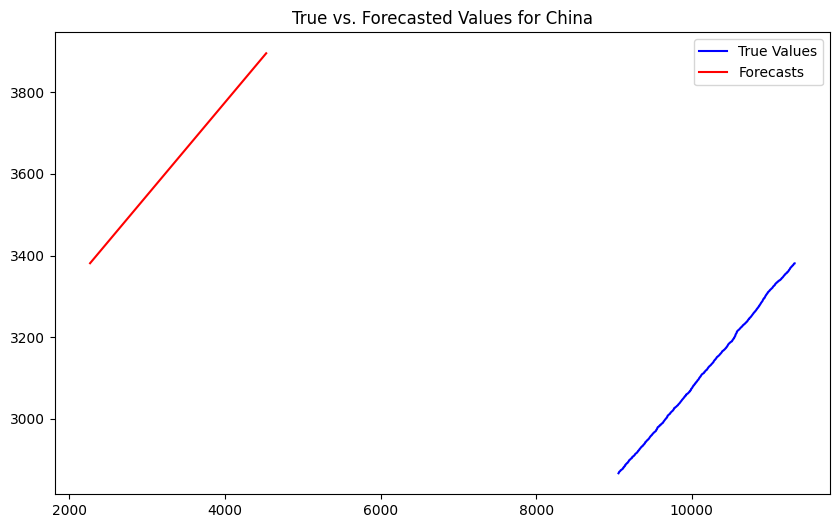

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: United States
MAE: 27.817325704293342
MSE: 773.8208913332918
RMSE: 27.817636336203904



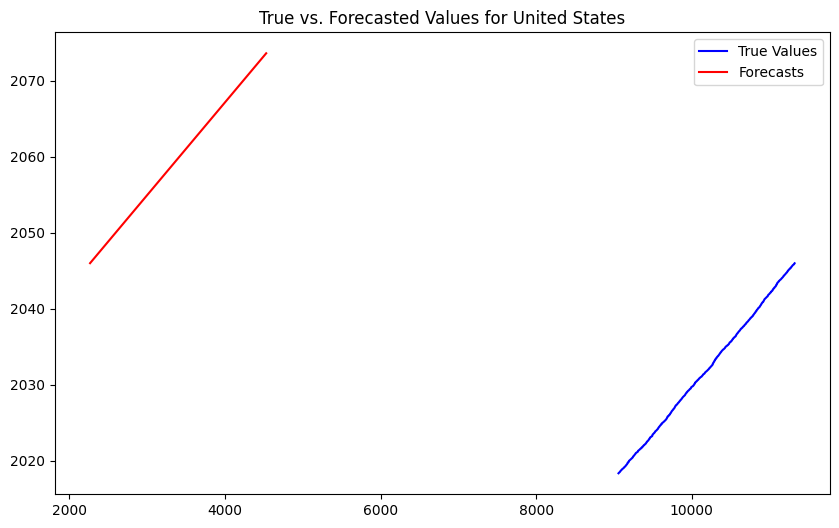

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Brazil
MAE: 29.062524383588244
MSE: 844.6589252347889
RMSE: 29.063016451063522



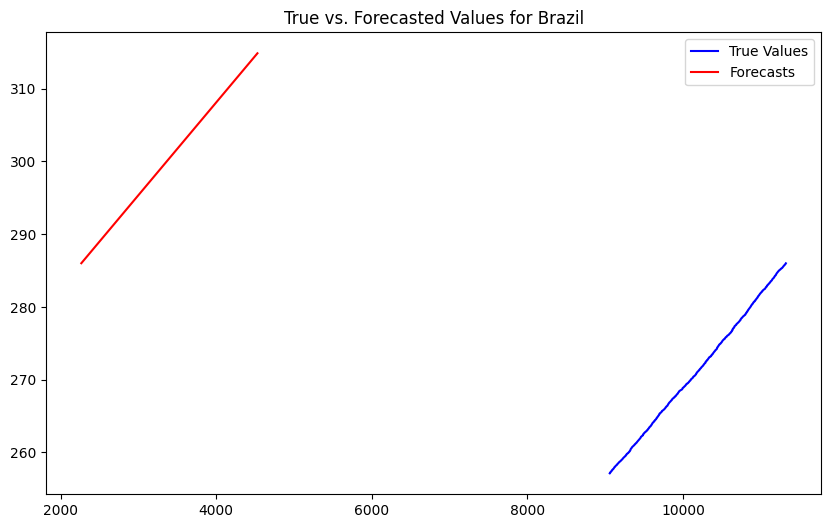

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Belgium
MAE: 0.5898587778384068
MSE: 0.34795763993826573
RMSE: 0.5898793435426144



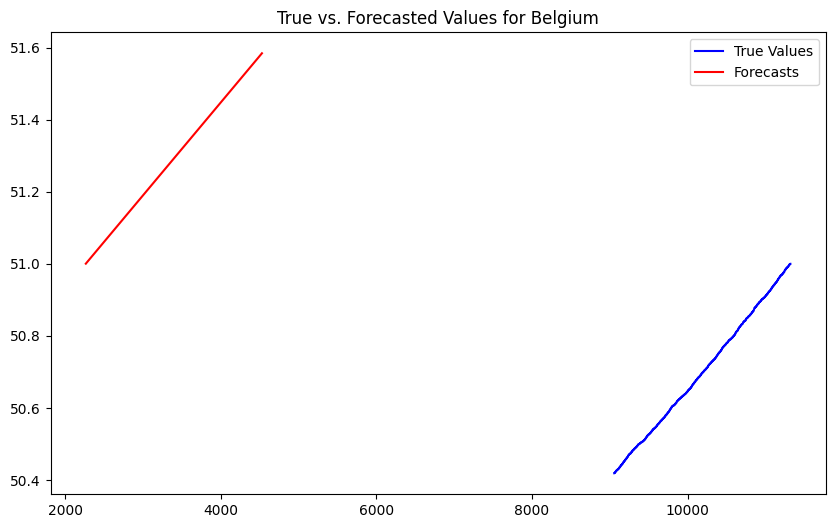

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: France
MAE: 1.5912978857296851
MSE: 2.5322984554555563
RMSE: 1.5913197213179873



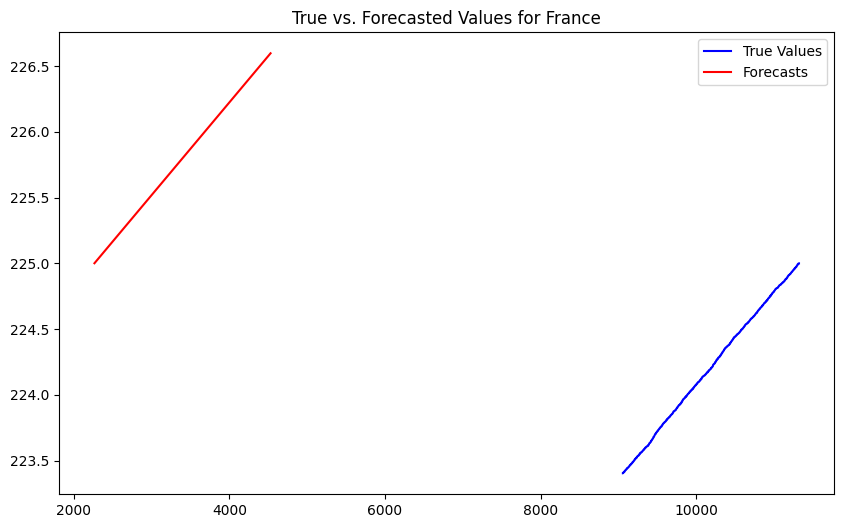

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Netherlands
MAE: 0.614788852276043
MSE: 0.3779806387354524
RMSE: 0.6148013002063776



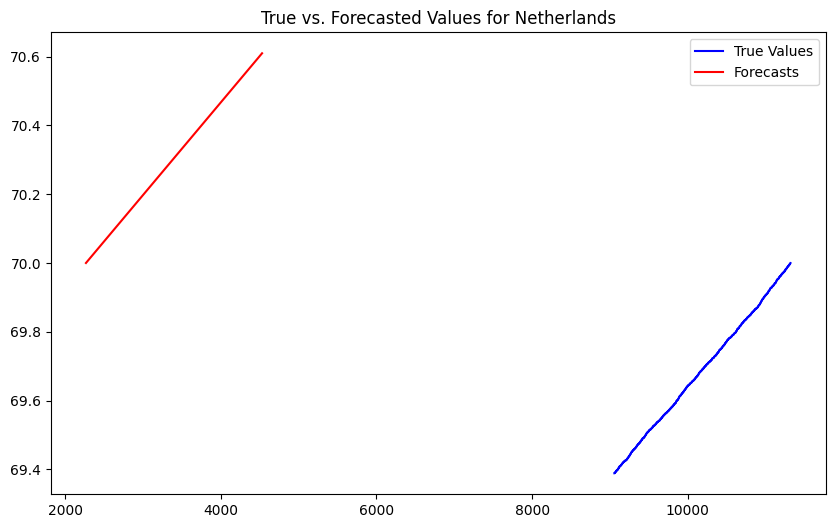

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Portugal
MAE: 0.6045697955779848
MSE: 0.3655141429697167
RMSE: 0.6045776566907817



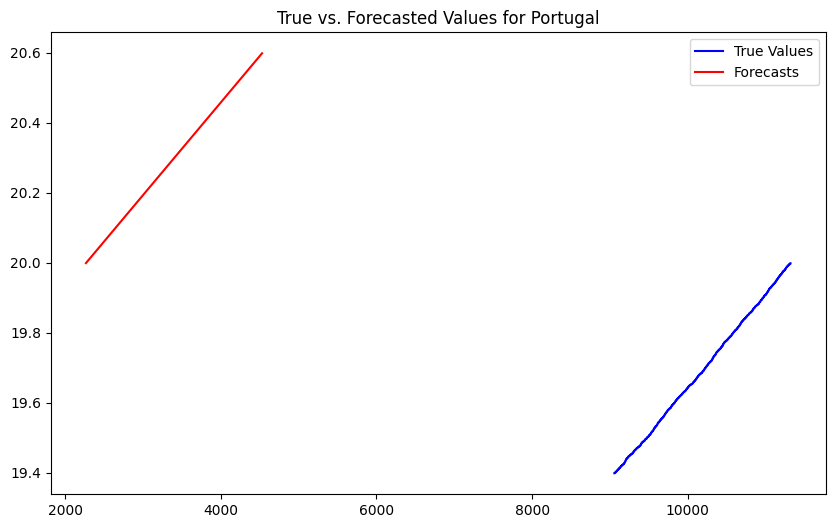

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Spain
MAE: 3.417830687445915
MSE: 11.681735655695636
RMSE: 3.4178554176114058



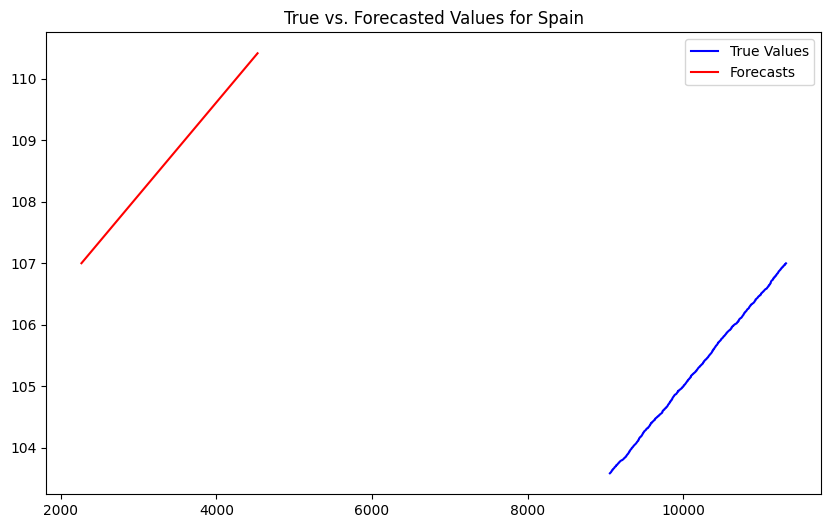

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Sweden
MAE: 47.0
MSE: 2209.0
RMSE: 47.0



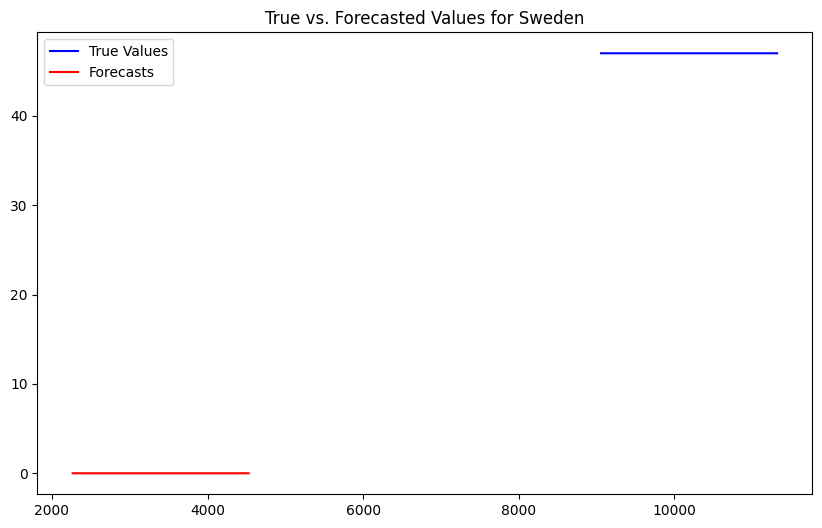

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Norway
MAE: 1.2196213724928981
MSE: 1.4875782506818724
RMSE: 1.2196631709951204



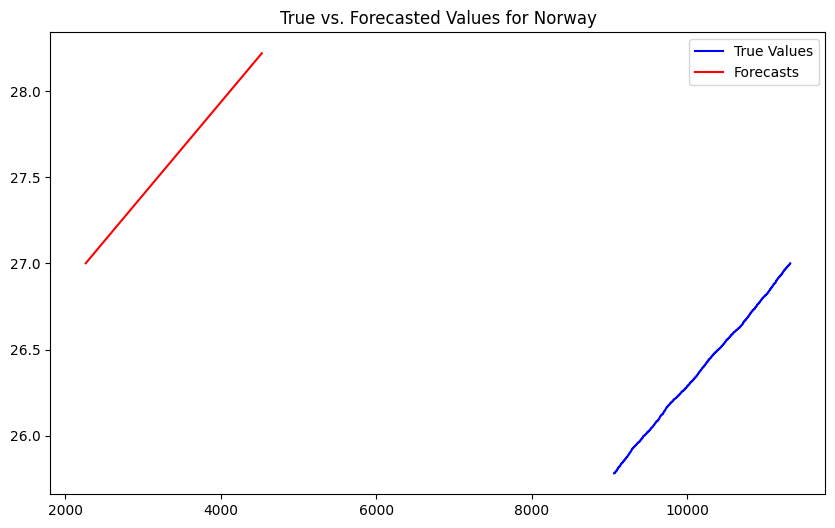

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Turkey
MAE: 17.88886719666127
MSE: 320.03045924696215
RMSE: 17.889395161574416



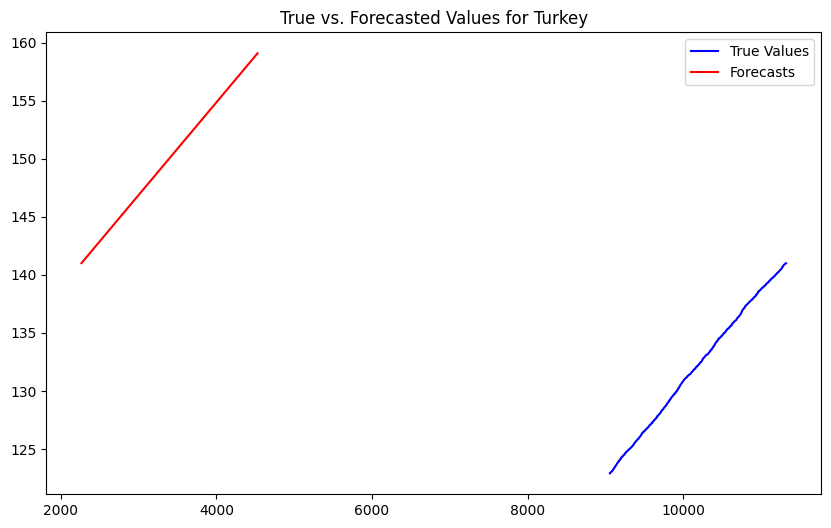

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Argentina
MAE: 5.459601040820863
MSE: 29.80775407094904
RMSE: 5.459647797335378



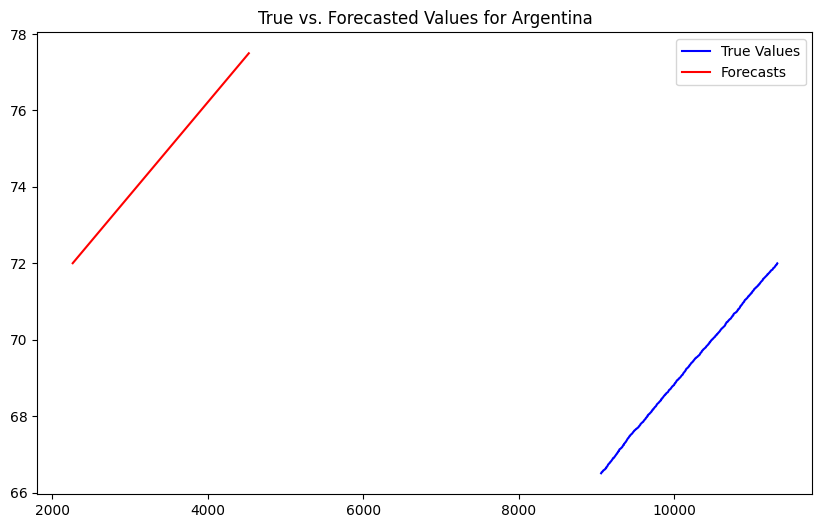

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Canada
MAE: 14.081496318877306
MSE: 198.29783230491432
RMSE: 14.081826312837206



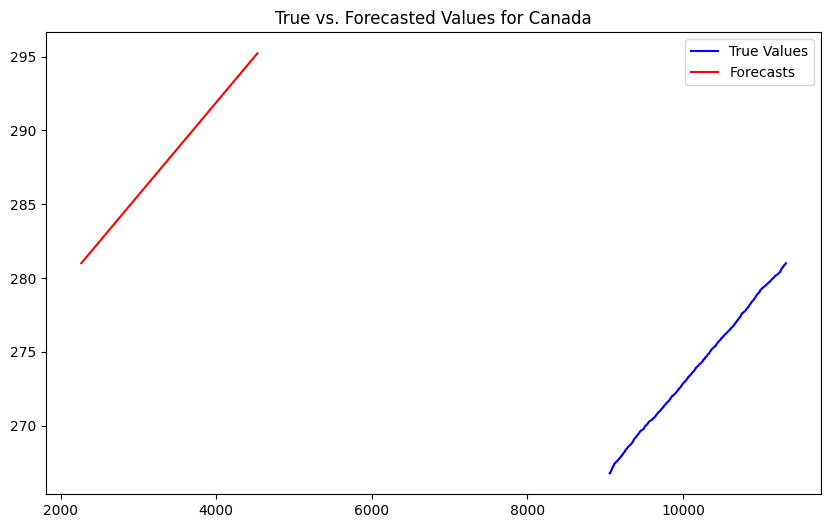

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Chile
MAE: 4.736354946089883
MSE: 22.433673370423683
RMSE: 4.736419889581548



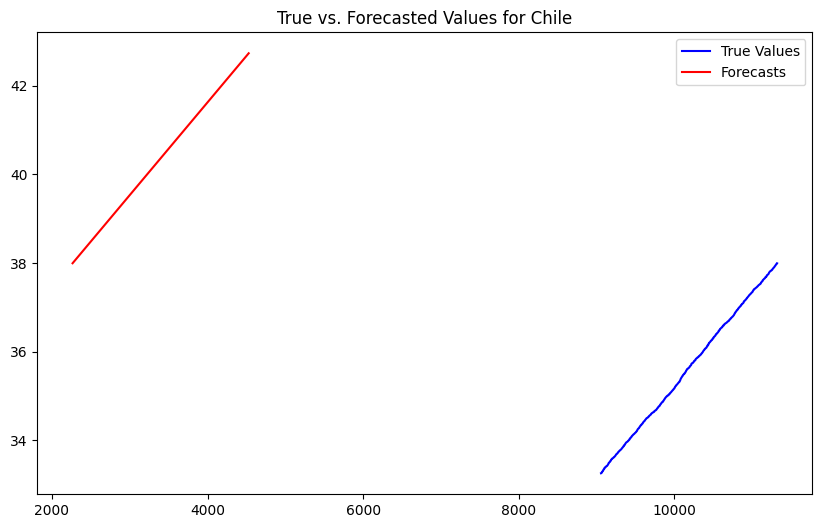

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Colombia
MAE: 3.05106330760094
MSE: 9.30940178134564
RMSE: 3.0511312297811184



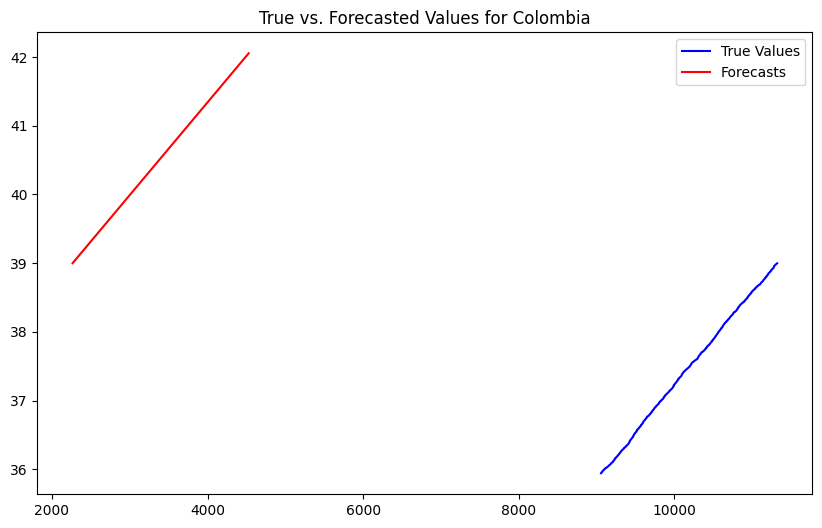

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Mexico
MAE: 5.264246049295125
MSE: 27.713912335345935
RMSE: 5.264400472546321



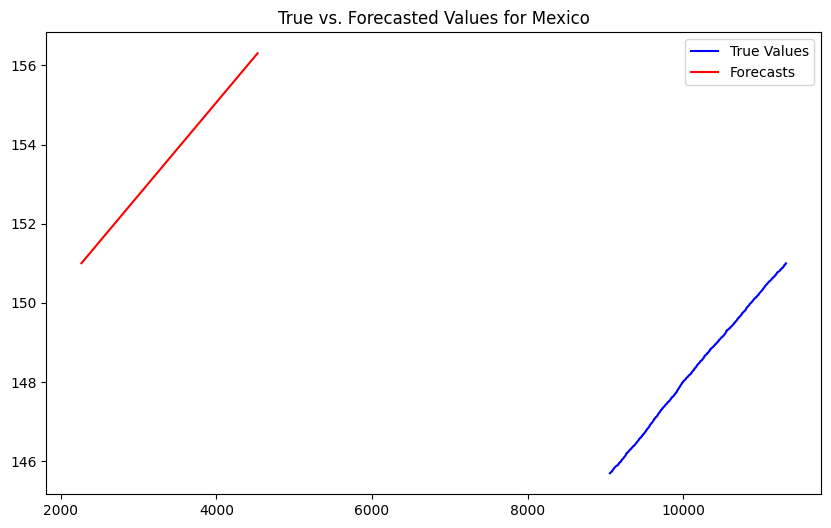

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Indonesia
MAE: 24.35525681401919
MSE: 593.1938798762909
RMSE: 24.35557184457575



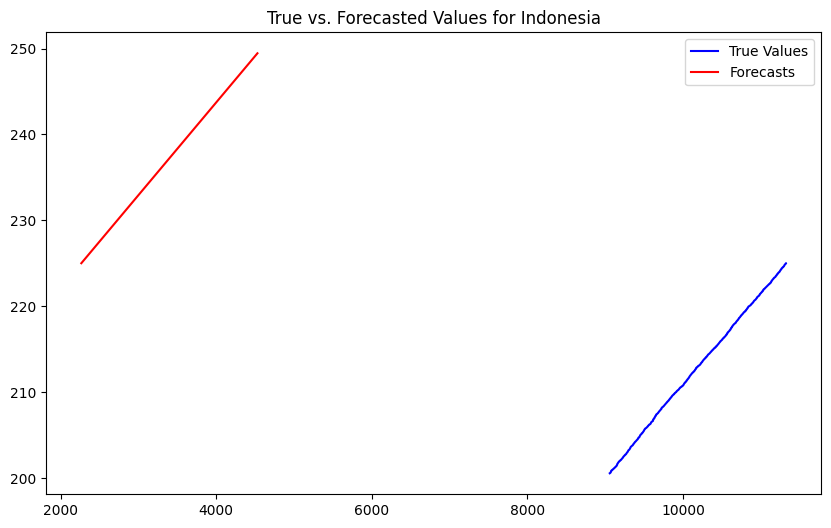

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Malaysia
MAE: 13.522013896943331
MSE: 182.84950072005913
RMSE: 13.522185500874448



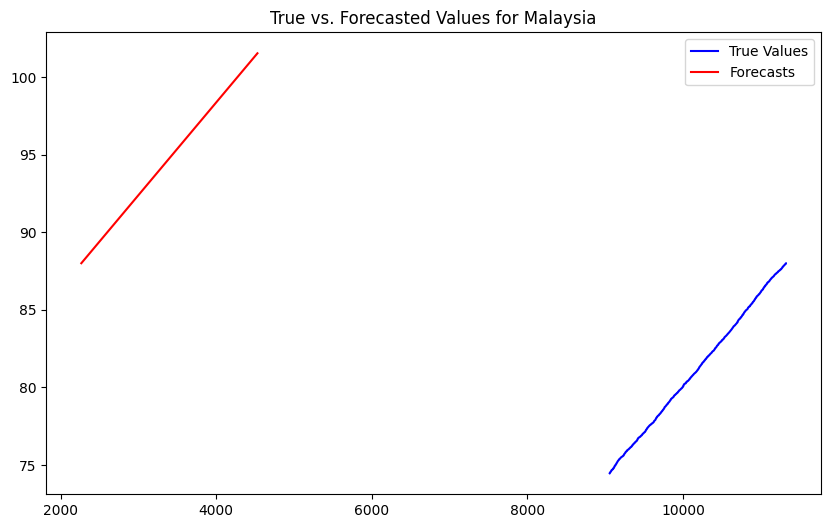

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: South Korea
MAE: 38.056789991260224
MSE: 1448.3412441937242
RMSE: 38.05707876589747



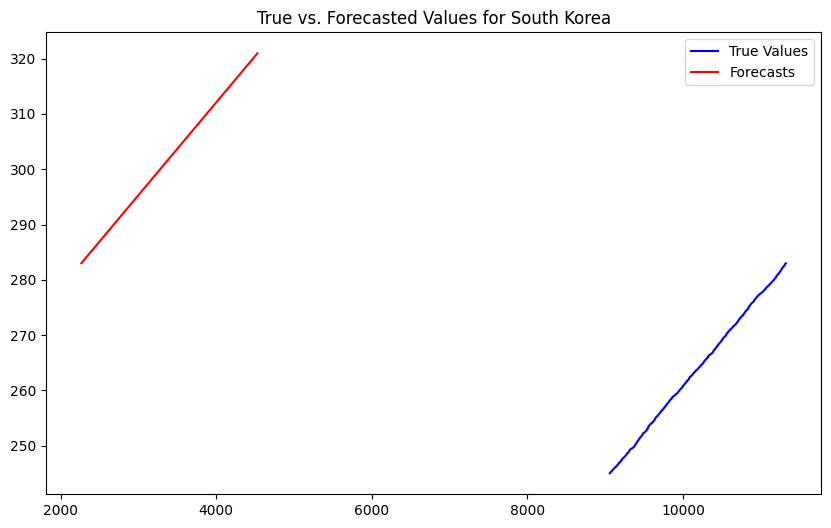

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Taiwan
MAE: 10.953656864311824
MSE: 120.01932783018937
RMSE: 10.955333305298812



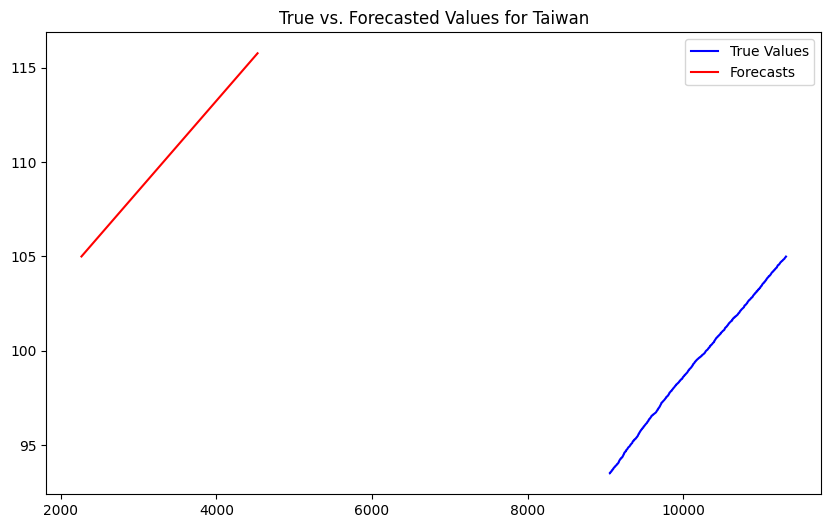

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Thailand
MAE: 16.783672987669828
MSE: 281.697399407365
RMSE: 16.783843403921672



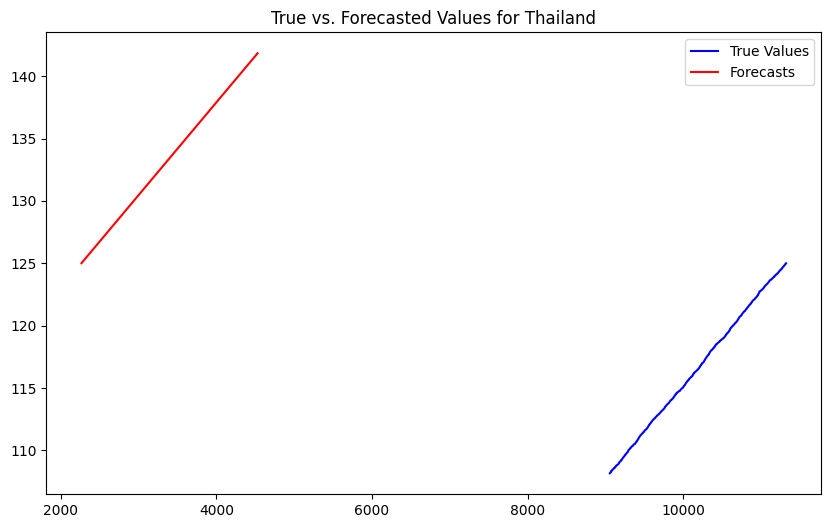

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: India
MAE: 122.5434838448563
MSE: 15017.786132067922
RMSE: 122.54707720736518



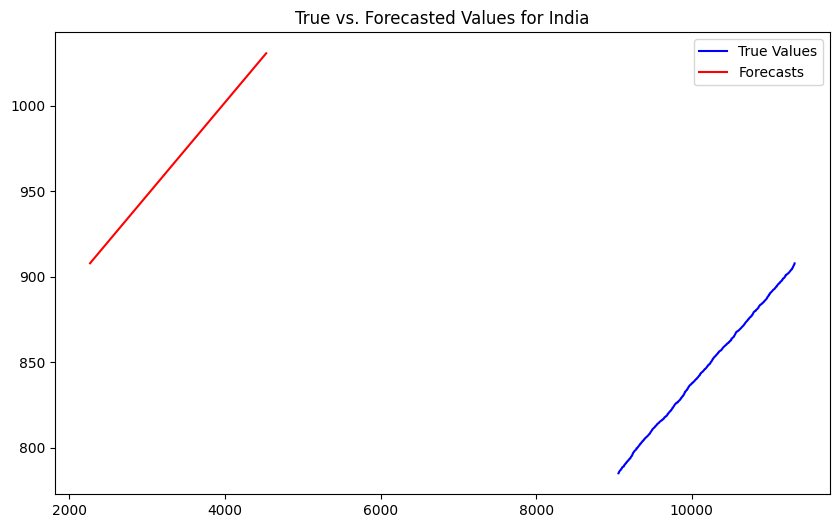

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Australia
MAE: 8.157093432877247
MSE: 66.53902154215399
RMSE: 8.157145428527922



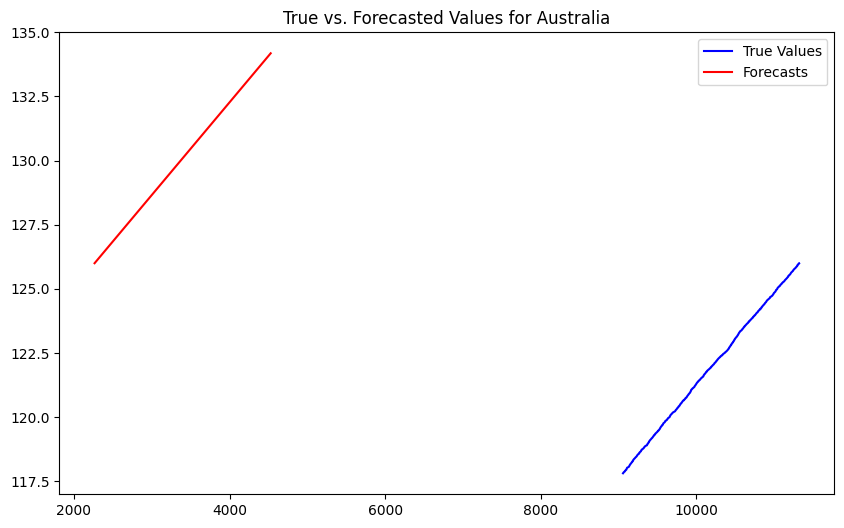

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: New Zealand
MAE: 1.3767332602739513
MSE: 1.8955363447124802
RMSE: 1.3767847851833925



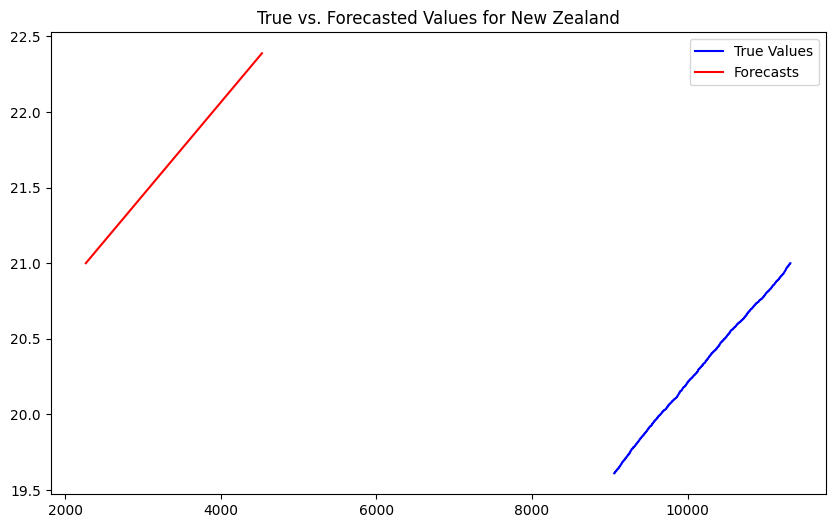

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Algeria
MAE: 7.391028252283766
MSE: 54.62905472820032
RMSE: 7.391147050911673



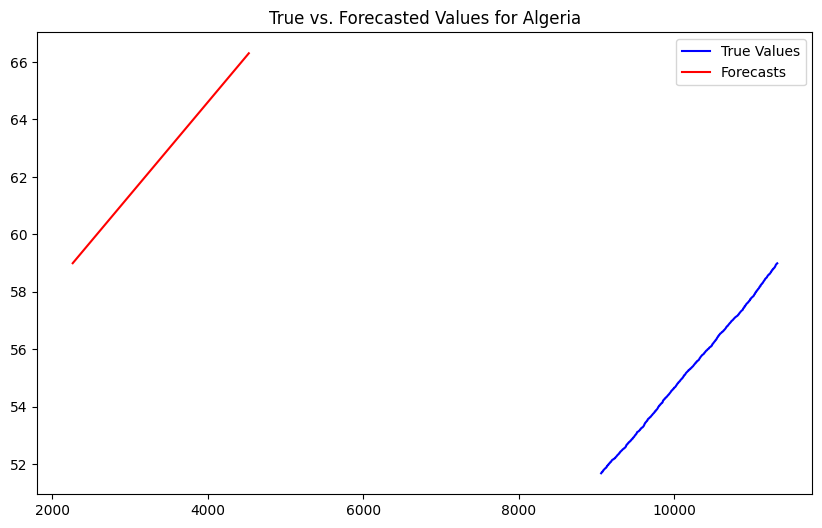

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Egypt
MAE: 11.733988963025698
MSE: 137.68956967349635
RMSE: 11.734119893434546



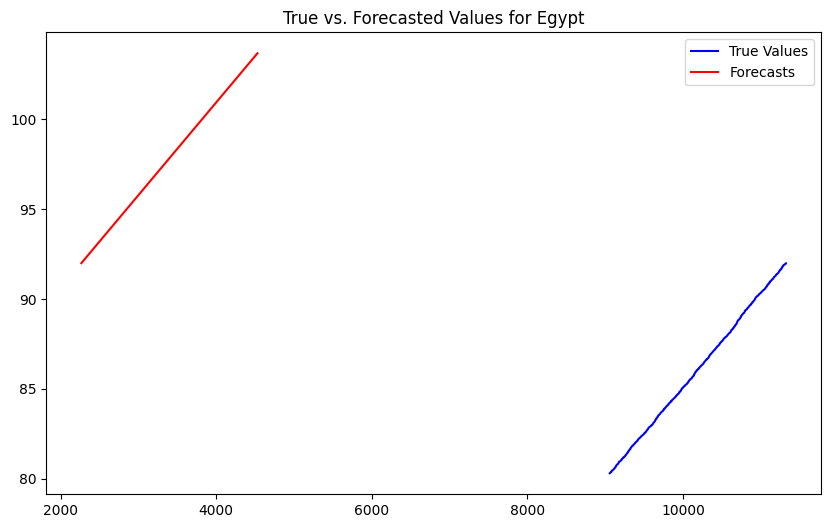

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Nigeria
MAE: 18.576052270399572
MSE: 345.07723232819495
RMSE: 18.576254529053884



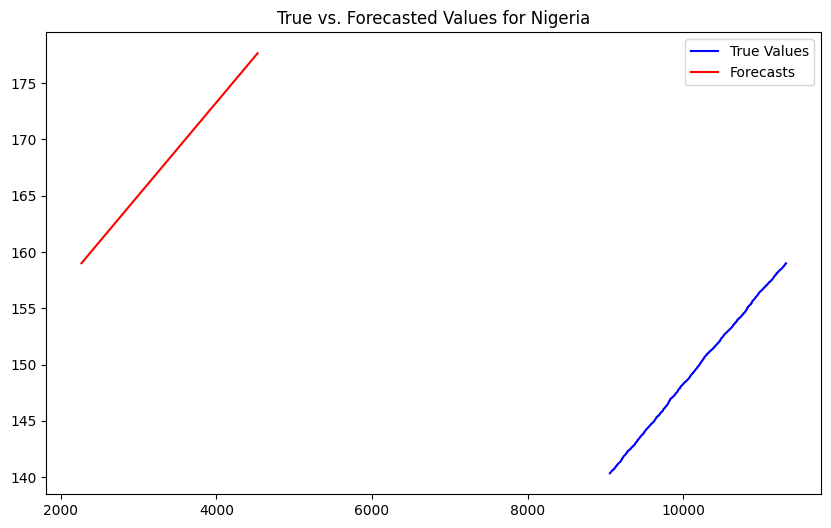

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: South Africa
MAE: 6.619683891600458
MSE: 43.82346831296946
RMSE: 6.619929630514924



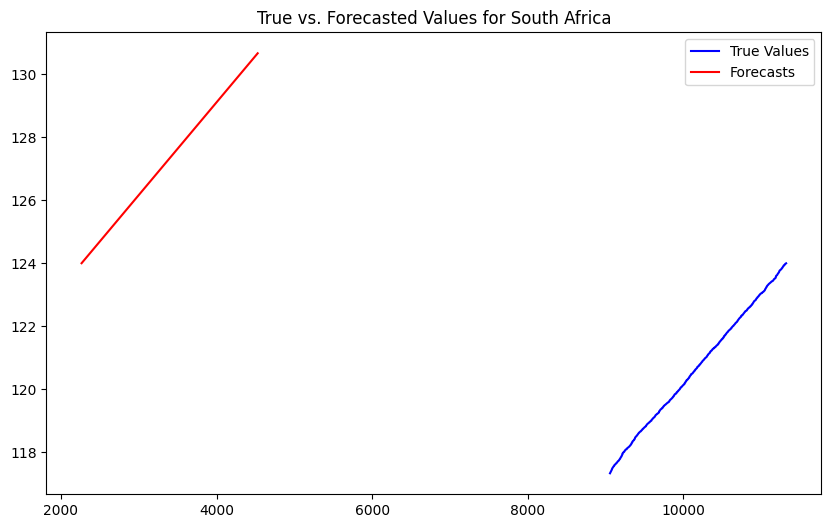

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Czechia
MAE: 2.2389205947042554
MSE: 5.013097417851834
RMSE: 2.238994733770456



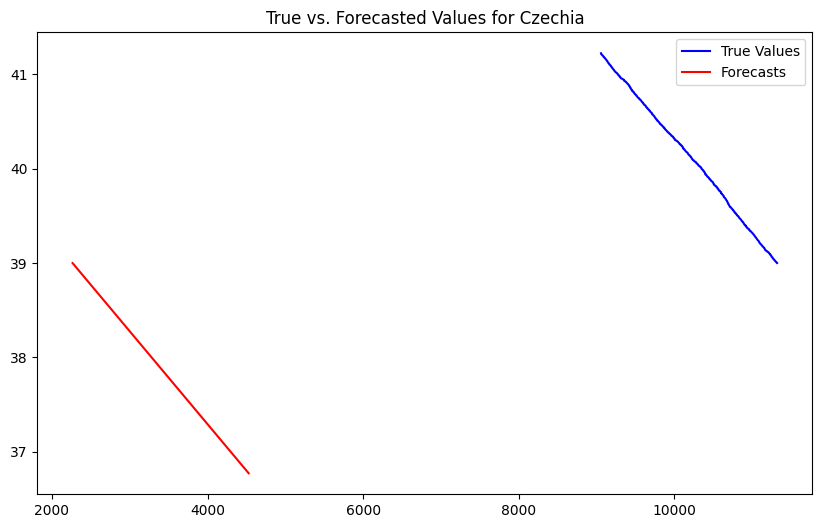

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Germany
MAE: 15.341246903243782
MSE: 235.35608471959657
RMSE: 15.341319523417683



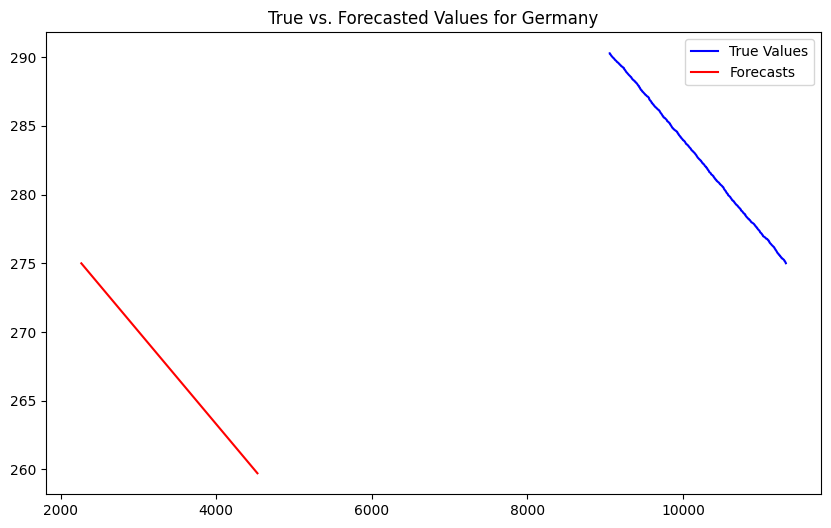

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Italy
MAE: 1.9835759536790474
MSE: 3.9346485363504997
RMSE: 1.9835948518663027



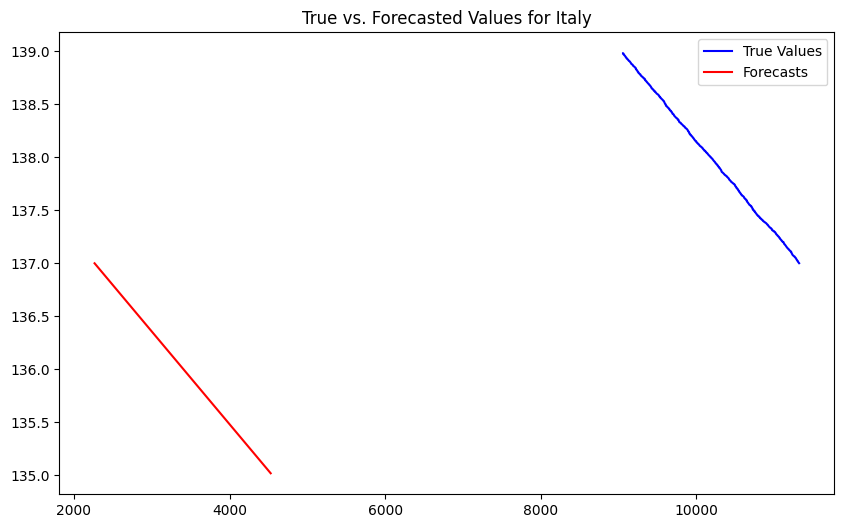

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Poland
MAE: 1.2434321735149538
MSE: 1.5461646079612075
RMSE: 1.2434486752420493



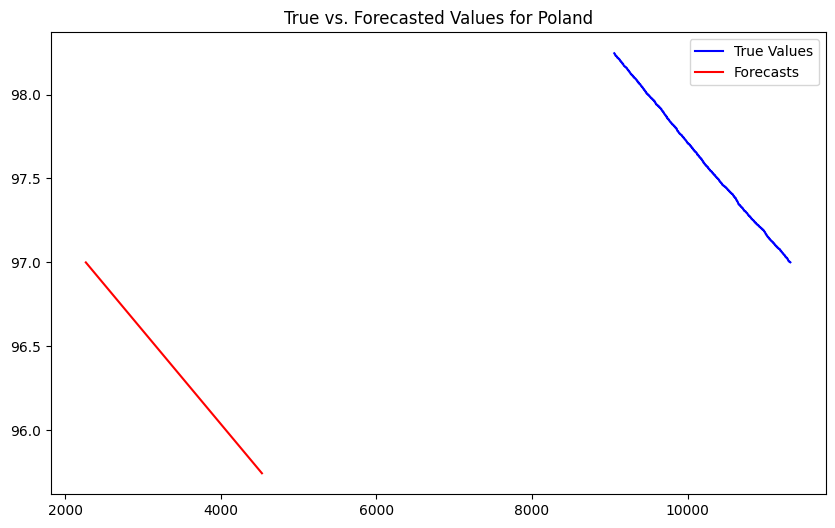

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Romania
MAE: 5.974902714194279
MSE: 35.70143944943591
RMSE: 5.975068154375807



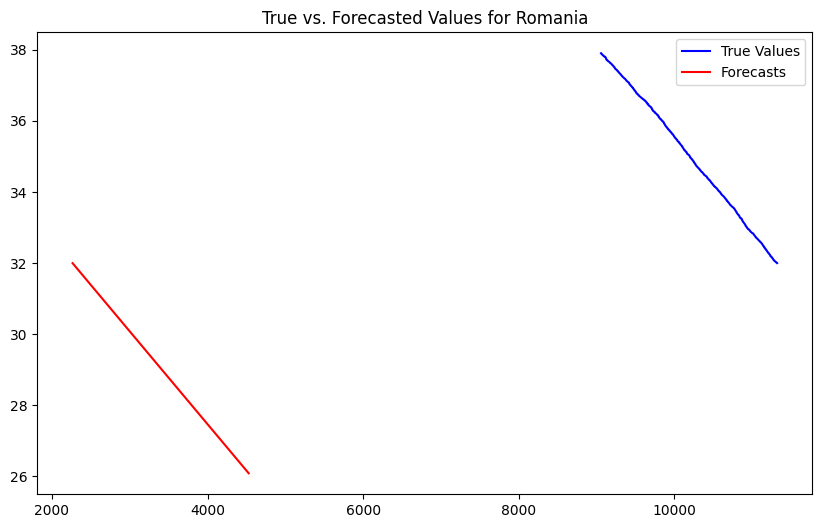

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: United Kingdom
MAE: 10.45085014839889
MSE: 109.22277627571613
RMSE: 10.450970111703322



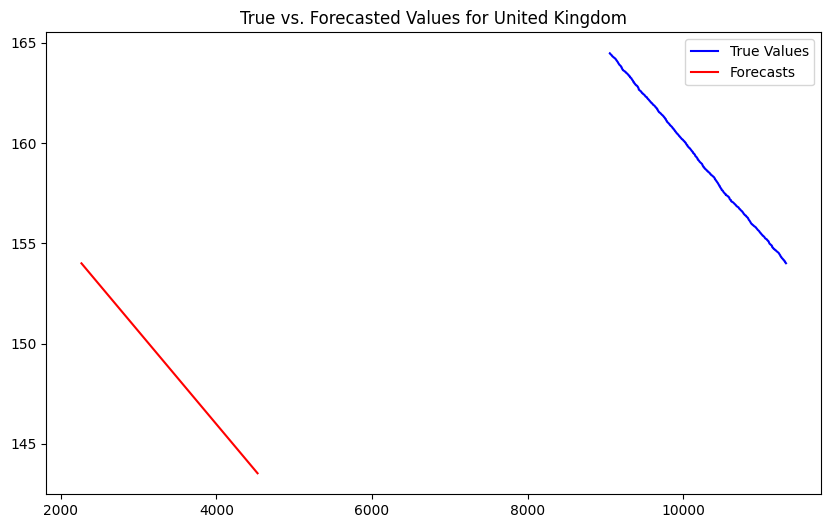

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Kazakhstan
MAE: 0.6154942940877074
MSE: 0.3788447239393364
RMSE: 0.6155036343835318



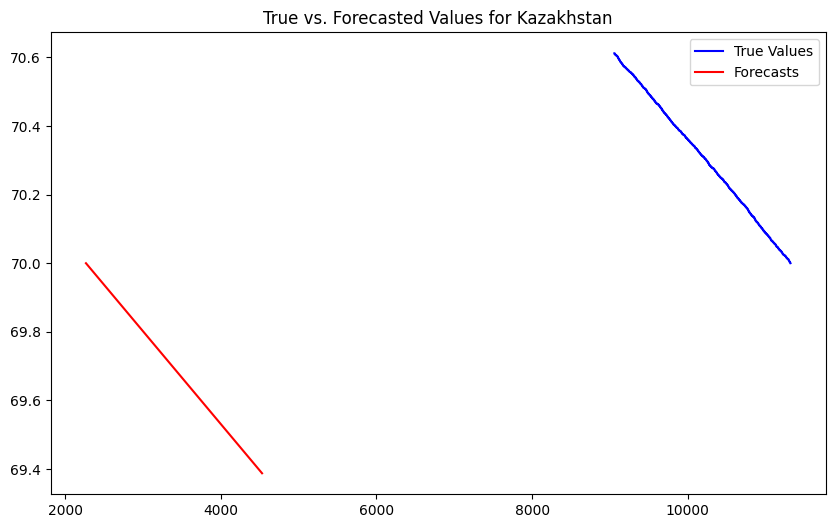

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Russia
MAE: 29.36008553489702
MSE: 862.0375314632445
RMSE: 29.36047566820477



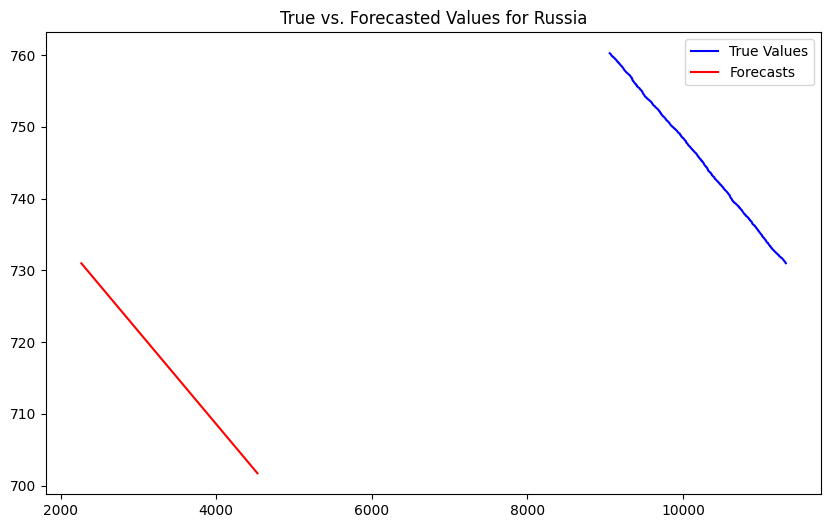

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Ukraine
MAE: 33.392026754962544
MSE: 1115.065760011925
RMSE: 33.3926003781066



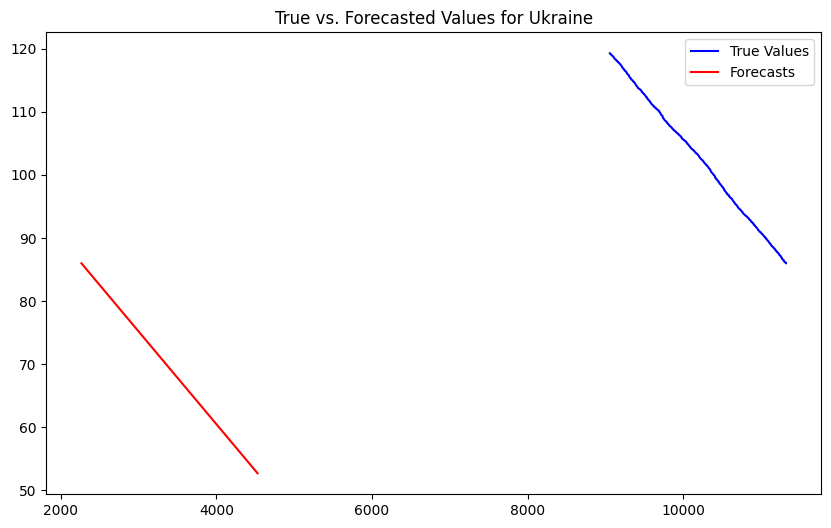

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Uzbekistan
MAE: 0.5948651542605689
MSE: 0.3538881914257391
RMSE: 0.5948850237026808



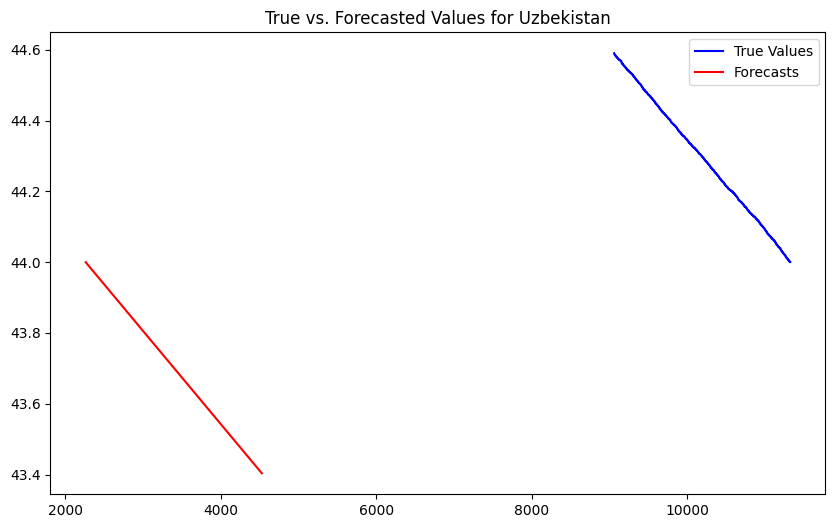

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Venezuela
MAE: 2.2303514559631283
MSE: 4.974601238339849
RMSE: 2.2303814109563973



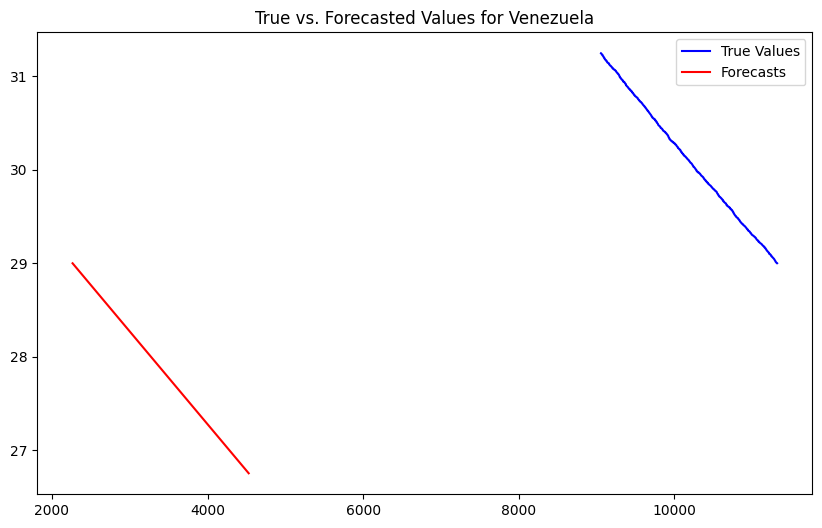

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Japan
MAE: 11.04305340603187
MSE: 121.95215023883046
RMSE: 11.043194747844957



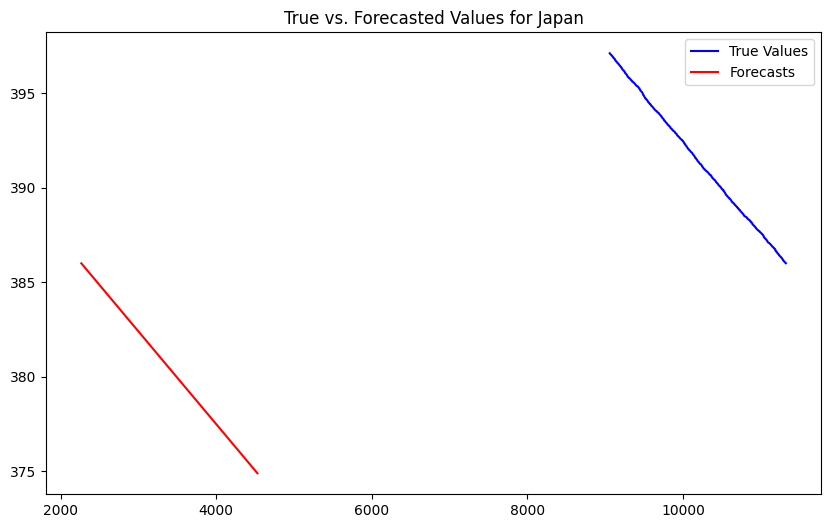

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Iran
MAE: 39.78102765189585
MSE: 1582.5883298060864
RMSE: 39.78175875707466



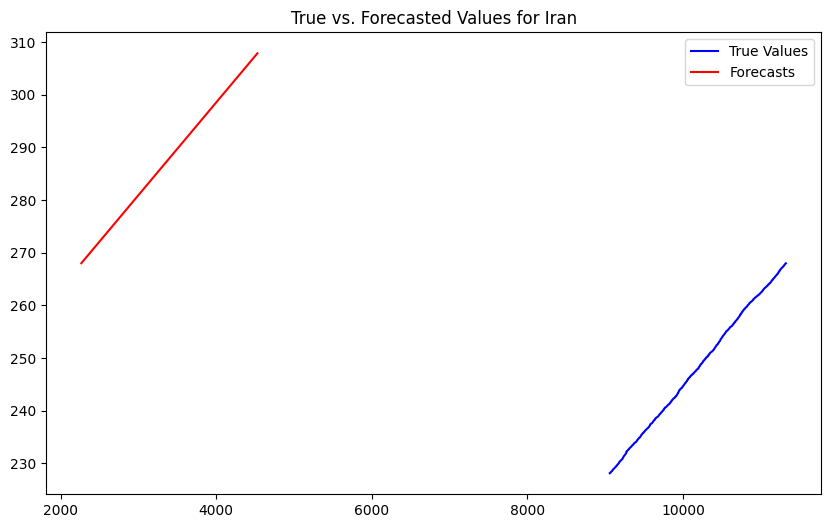

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Kuwait
MAE: 6.022407224344793
MSE: 36.27134453752939
RMSE: 6.0225695959058365



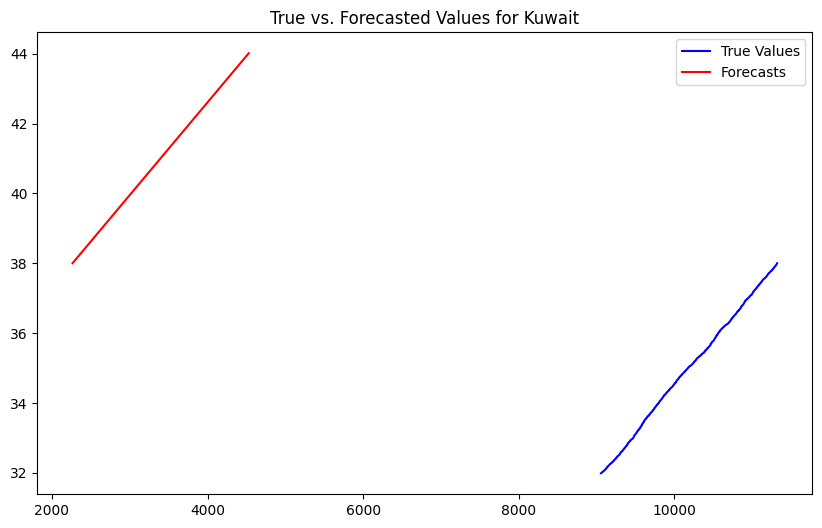

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: Saudi Arabia
MAE: 30.477709764869473
MSE: 928.9049380919807
RMSE: 30.477941828344985



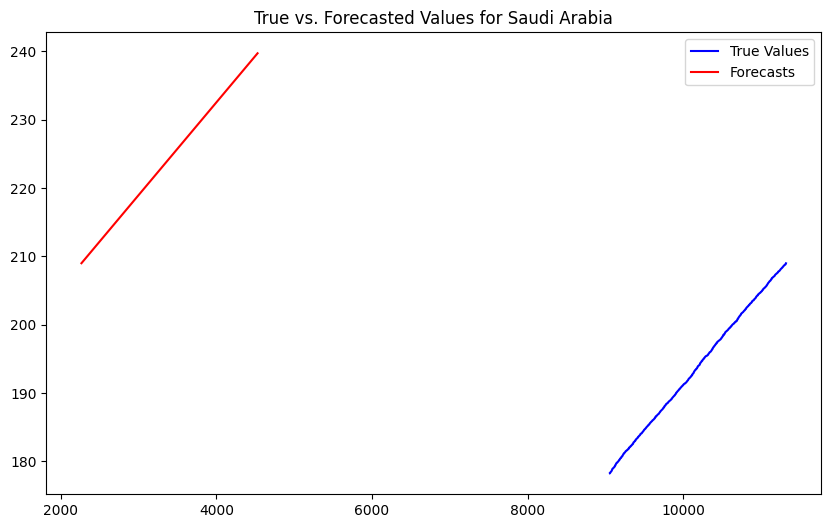

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Country: United Arab Emirates
MAE: 12.009493950052724
MSE: 144.23083923999417
RMSE: 12.009614450097645



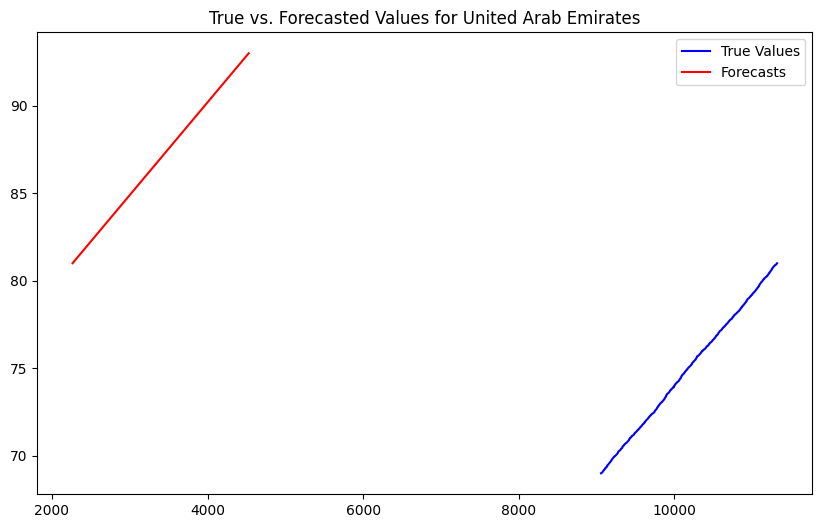

In [ ]:
# Loop through the list of countries
for country in countries:
    # Extract the true values for the current country
    true_values = validation[country]  # Replace 'validation' with your validation dataset

    # Calculate forecasts for the current country using your forecasting method or model
    # Replace this with your actual forecasting code
    # For example, using an ARIMA model:
    from pmdarima.arima import auto_arima
    model = auto_arima(true_values, seasonal=True, m=12)  # Adjust seasonality as needed
    country_forecasts, conf_int = model.predict(n_periods=len(true_values), return_conf_int=True)

    # Update the 'all_forecasts' DataFrame with the calculated forecasts for the current country
    all_forecasts[country] = country_forecasts

    # Calculate and display metrics (MAE, MSE, RMSE) for the current country
    mae = mean_absolute_error(true_values, country_forecasts)
    mse = mean_squared_error(true_values, country_forecasts)
    rmse = np.sqrt(mse)
    print(f"Country: {country}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}\n")

    # Visualize the true values and forecasts for the current country
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values', color='blue')
    plt.plot(country_forecasts, label='Forecasts', color='red')
    plt.title(f"True vs. Forecasted Values for {country}")
    plt.legend()
    plt.show()


In [ ]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the date range from 2020-01-01 to 2030-12-31
start_date = '2020-01-01'
end_date = '2030-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Create an empty DataFrame to store forecasts for all countries
forecasted_energy = pd.DataFrame(index=date_range)


# Loop through the list of countries
for country in countries:
    # Simulate energy consumption data (replace this with your actual data loading)
    # For demonstration, we'll generate random data

    # Fit an AutoARIMA model for energy consumption
    #model = auto_arima(energy_consumption, seasonal=True, m=12)

    # Make forecasts for the predefined date range (2020-2030)
    forecast, conf_int = model.predict(n_periods=len(date_range), return_conf_int=True)

    # Store the forecasts in the DataFrame with the country's name as the column
    forecasted_energy[country] = forecast



# You now have a DataFrame 'forecasted_energy' with forecasts for each country


In [ ]:
forecasted_energy

China  United States      Brazil     Belgium      France  \
2020-01-31  285.462121     285.462121  285.462121  285.462121  285.462121   
2020-02-29  285.462121     285.462121  285.462121  285.462121  285.462121   
2020-03-31  285.462121     285.462121  285.462121  285.462121  285.462121   
2020-04-30  285.462121     285.462121  285.462121  285.462121  285.462121   
2020-05-31  285.462121     285.462121  285.462121  285.462121  285.462121   
...                ...            ...         ...         ...         ...   
2030-08-31  285.462121     285.462121  285.462121  285.462121  285.462121   
2030-09-30  285.462121     285.462121  285.462121  285.462121  285.462121   
2030-10-31  285.462121     285.462121  285.462121  285.462121  285.462121   
2030-11-30  285.462121     285.462121  285.462121  285.462121  285.462121   
2030-12-31  285.462121     285.462121  285.462121  285.462121  285.462121   

            Netherlands    Portugal       Spain      Sweden      Norway  ...  \
2020-01-31   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2020-02-29   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2020-03-31   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2020-04-30   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2020-05-31   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
...                 ...         ...         ...         ...         ...  ...   
2030-08-31   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2030-09-30   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2030-10-31   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2030-11-30   285.462121  285.462121  285.462121  285.462121  285.462121  ...   
2030-12-31   285.462121  285.462121  285.462121  285.462121  285.462121  ...   

            Kazakhstan      Russia     Ukraine  Uzbekistan   Venezuela  \
2020-01-31  285.462121  285.462121  285.462121  285.462121  285.462121   
2020-02-29  285.462121  285.462121  285.462121  285.462121  285.462121   
2020-03-31  285.462121  285.462121  285.462121  285.462121  285.462121   
2020-04-30  285.462121  285.462121  285.462121  285.462121  285.462121   
2020-05-31  285.462121  285.462121  285.462121  285.462121  285.462121   
...                ...         ...         ...         ...         ...   
2030-08-31  285.462121  285.462121  285.462121  285.462121  285.462121   
2030-09-30  285.462121  285.462121  285.462121  285.462121  285.462121   
2030-10-31  285.462121  285.462121  285.462121  285.462121  285.462121   
2030-11-30  285.462121  285.462121  285.462121  285.462121  285.462121   
2030-12-31  285.462121  285.462121  285.462121  285.462121  285.462121   

                 Japan        Iran      Kuwait  Saudi Arabia  \
2020-01-31  285.462121  285.462121  285.462121    285.462121   
2020-02-29  285.462121  285.462121  285.462121    285.462121   
2020-03-31  285.462121  285.462121  285.462121    285.462121   
2020-04-30  285.462121  285.462121  285.462121    285.462121   
2020-05-31  285.462121  285.462121  285.462121    285.462121   
...                ...         ...         ...           ...   
2030-08-31  285.462121  285.462121  285.462121    285.462121   
2030-09-30  285.462121  285.462121  285.462121    285.462121   
2030-10-31  285.462121  285.462121  285.462121    285.462121   
2030-11-30  285.462121  285.462121  285.462121    285.462121   
2030-12-31  285.462121  285.462121  285.462121    285.462121   

            United Arab Emirates  
2020-01-31            285.462121  
2020-02-29            285.462121  
2020-03-31            285.462121  
2020-04-30            285.462121  
2020-05-31            285.462121  
...                          ...  
2030-08-31            285.462121  
2030-09-30            285.462121  
2030-10-31            285.462121  
2030-11-30            285.462121  
2030-12-31            285.462121  

[132 rows x 44 columns]

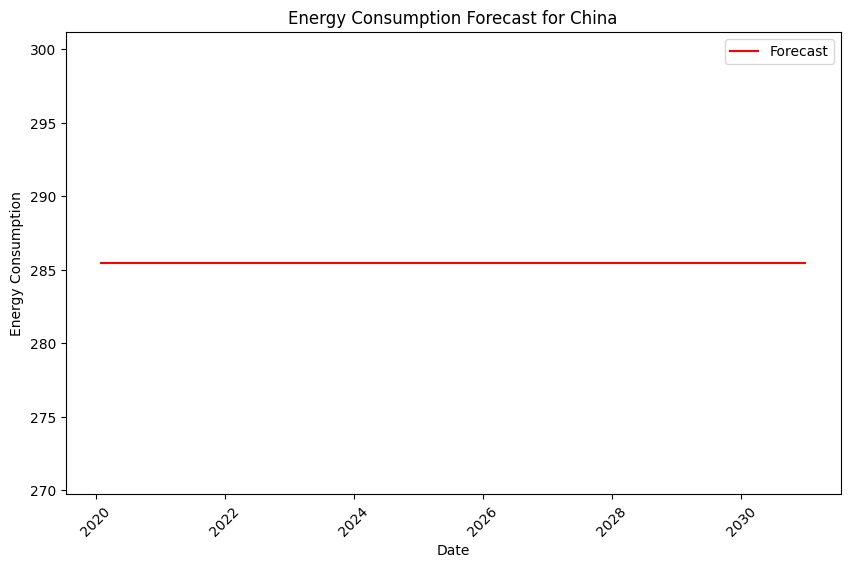

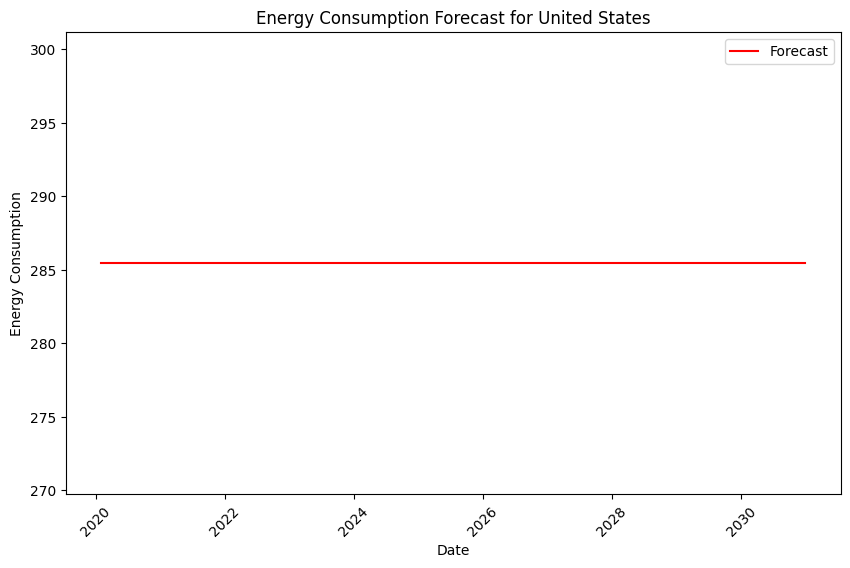

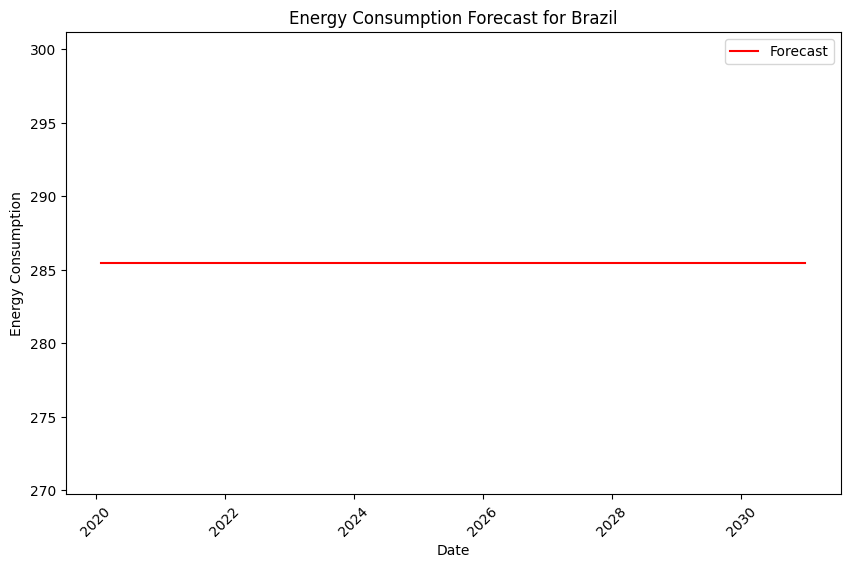

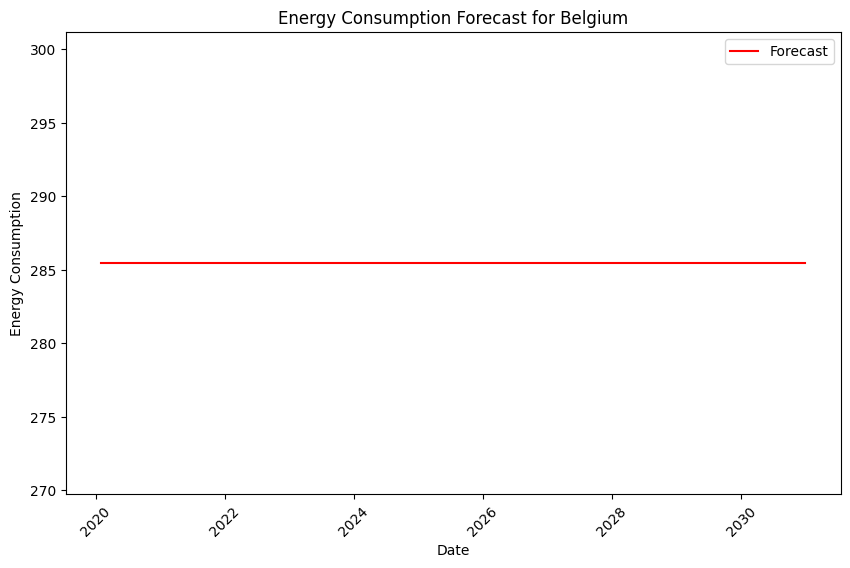

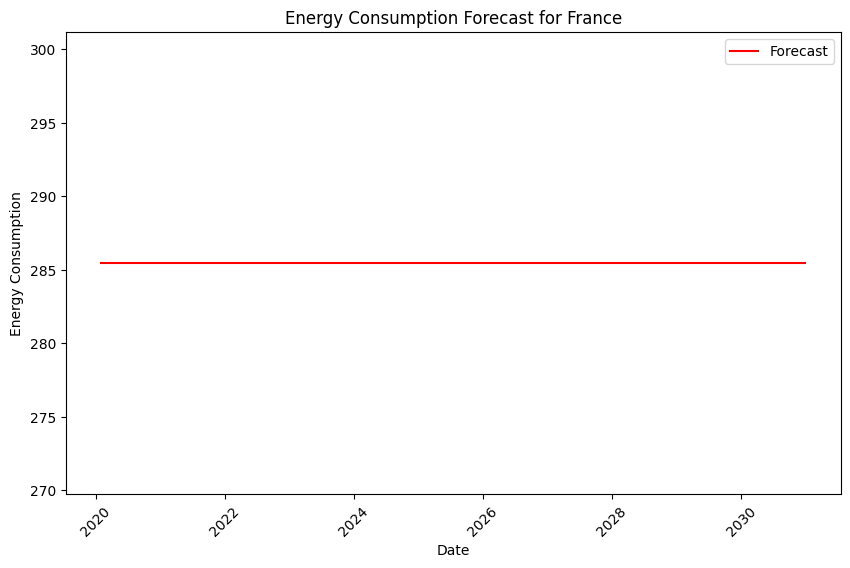

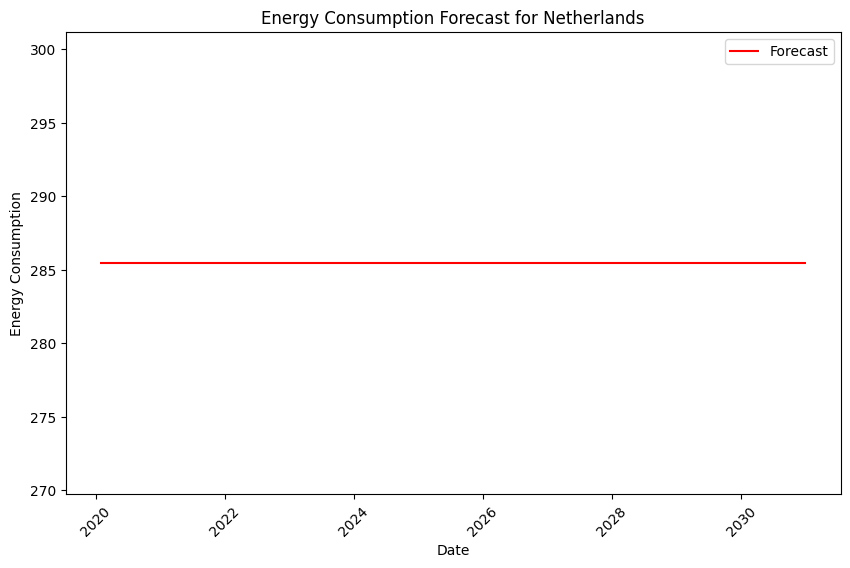

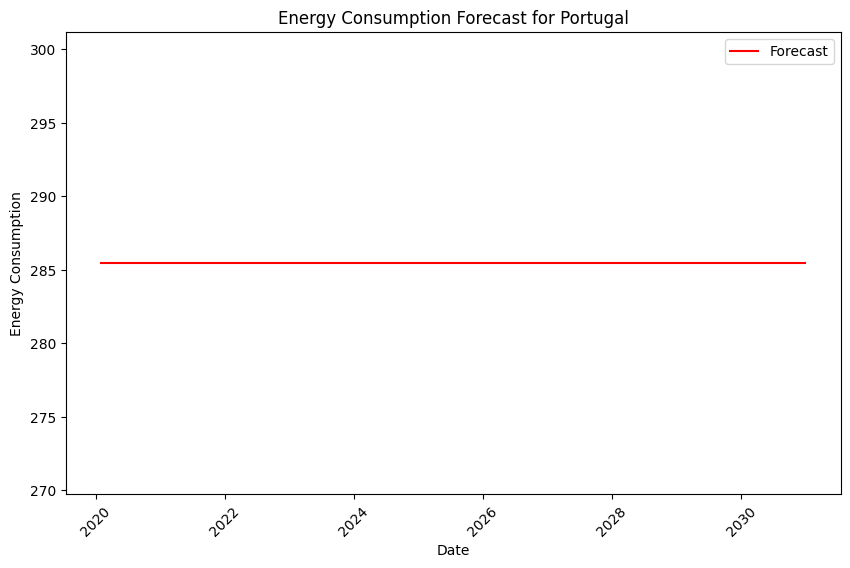

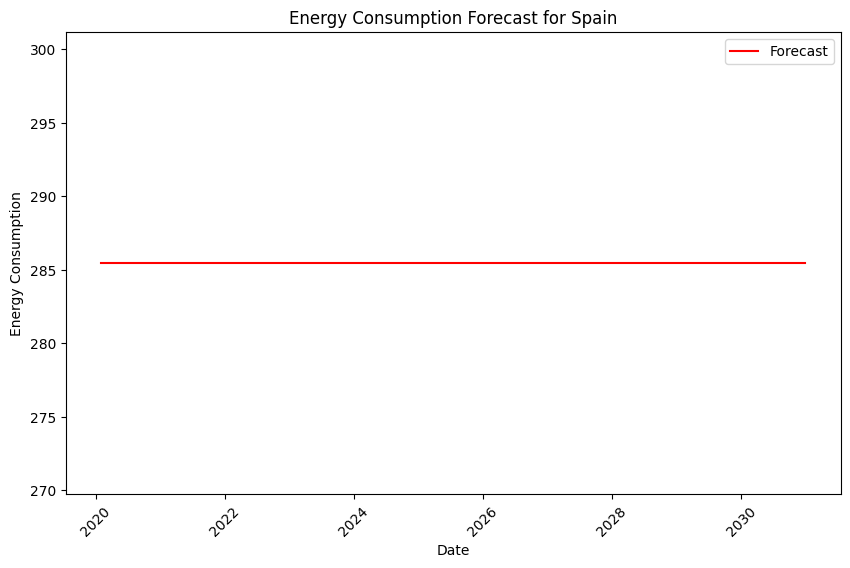

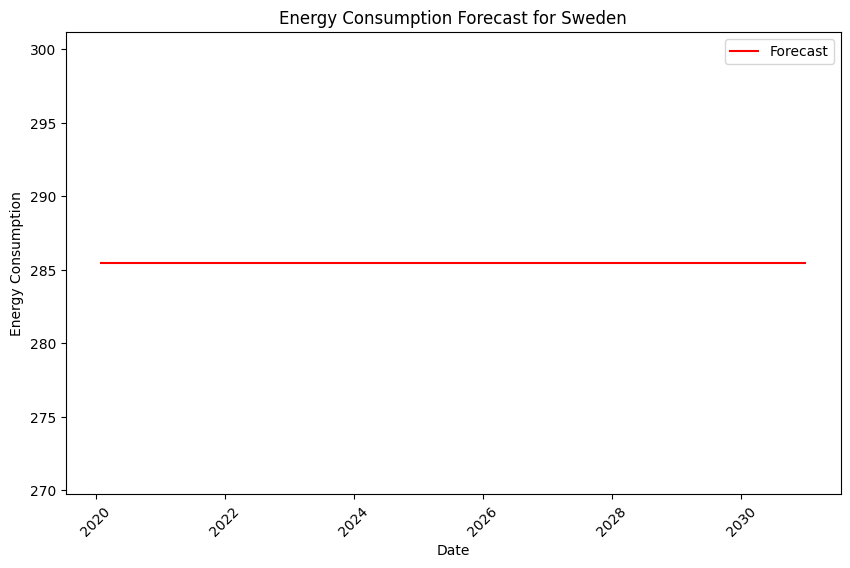

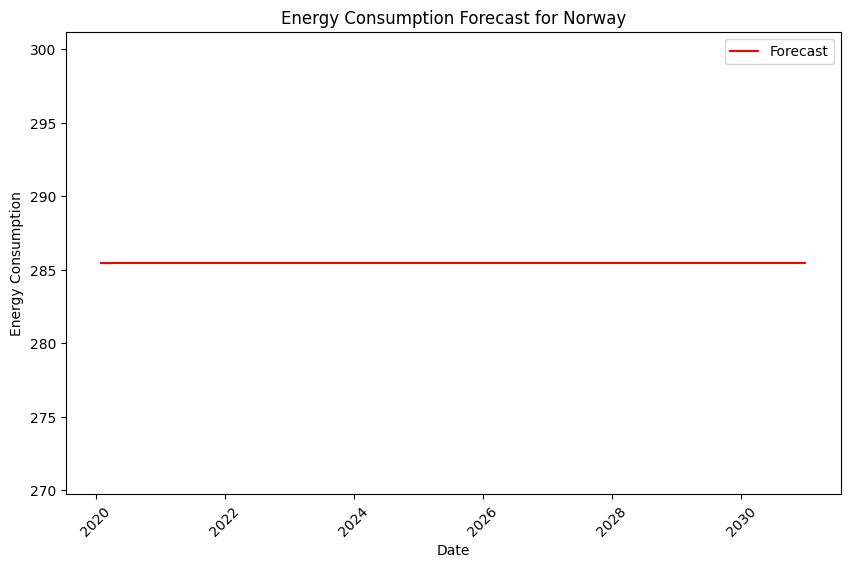

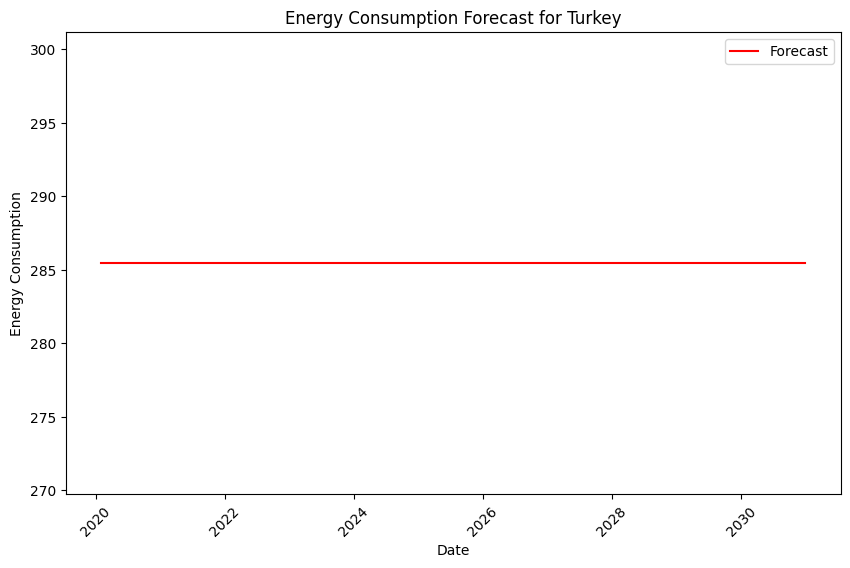

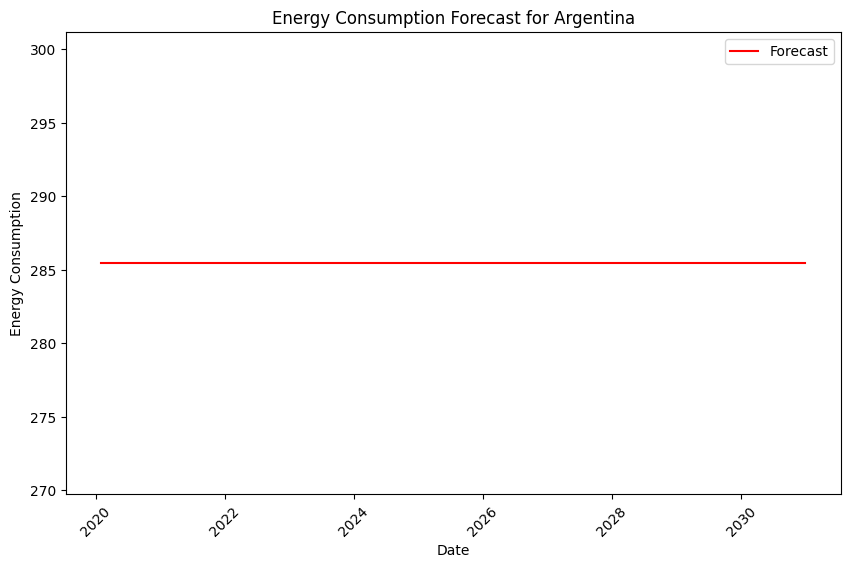

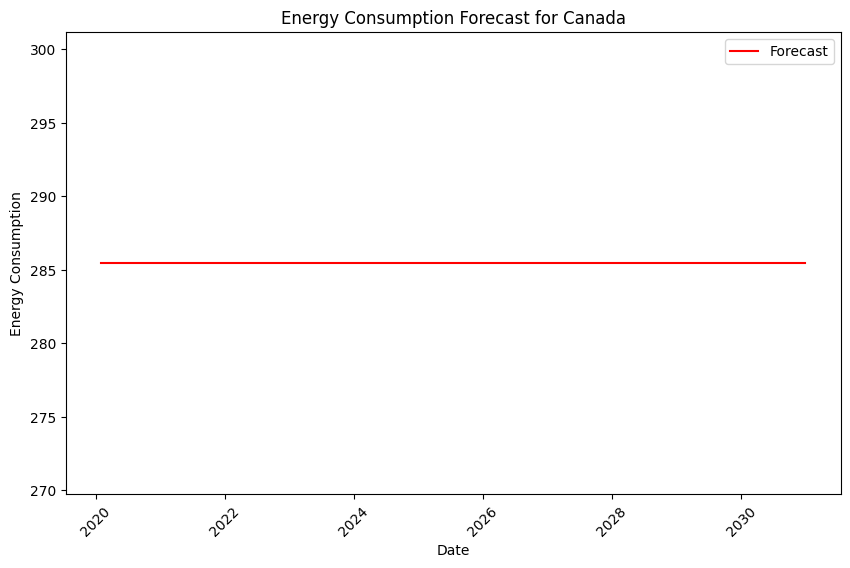

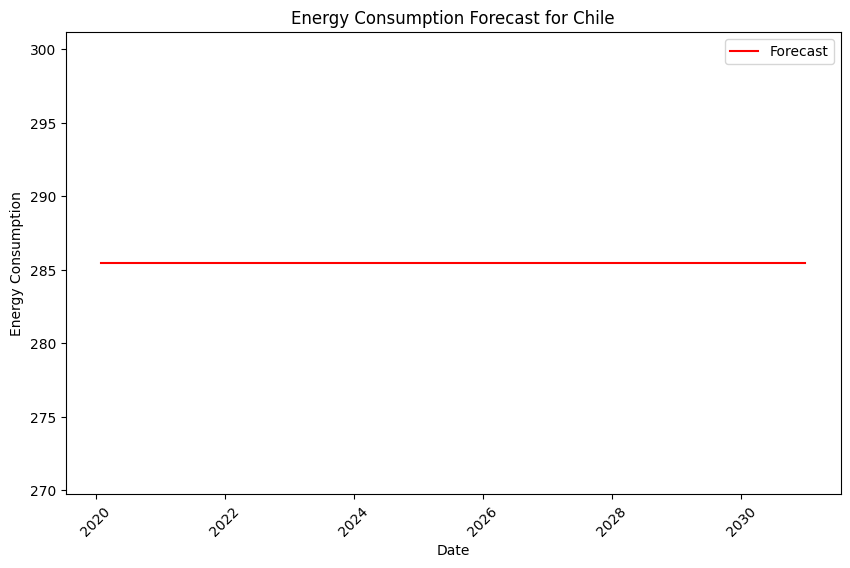

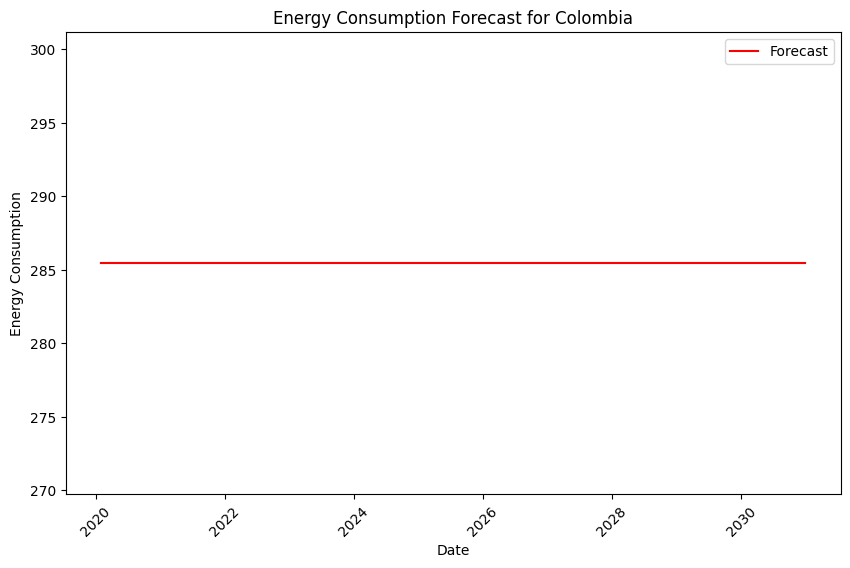

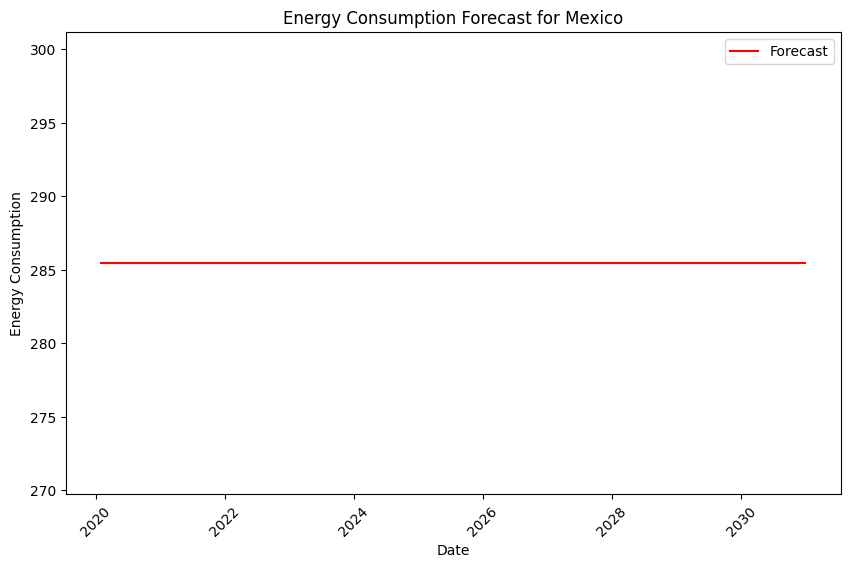

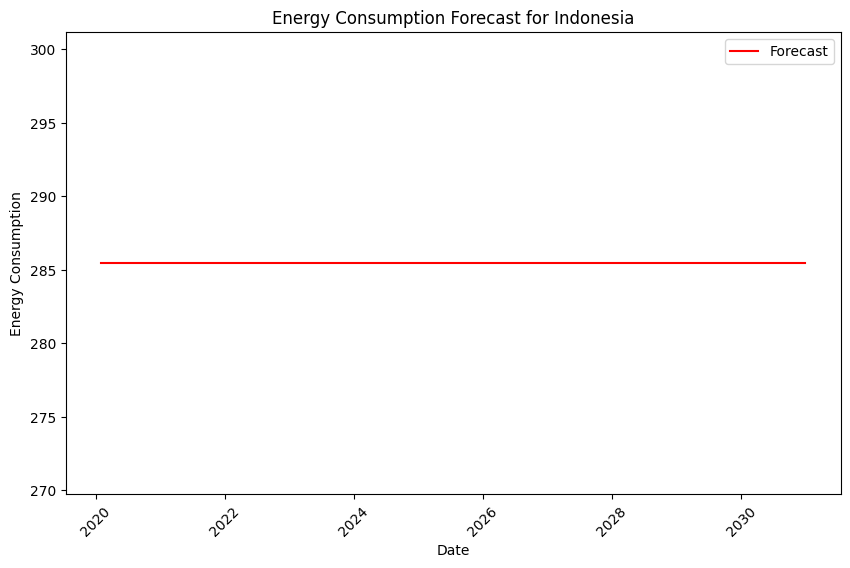

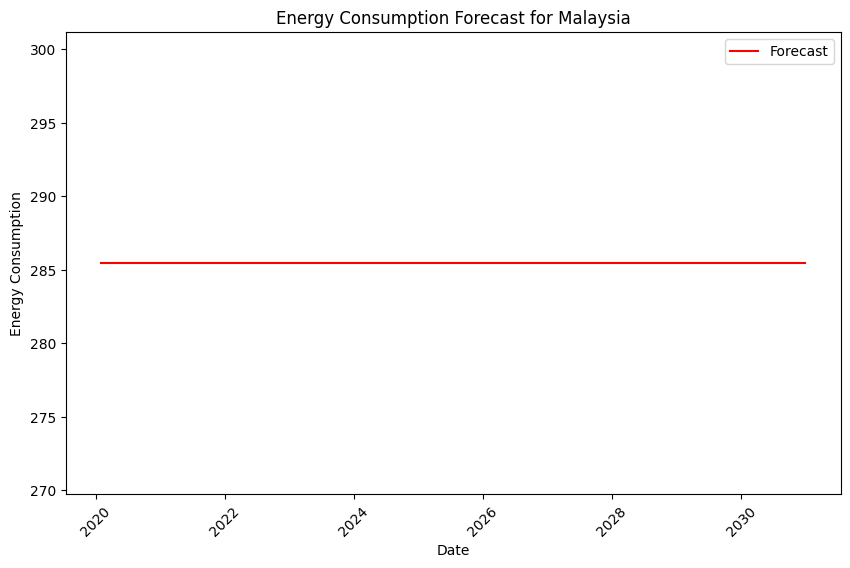

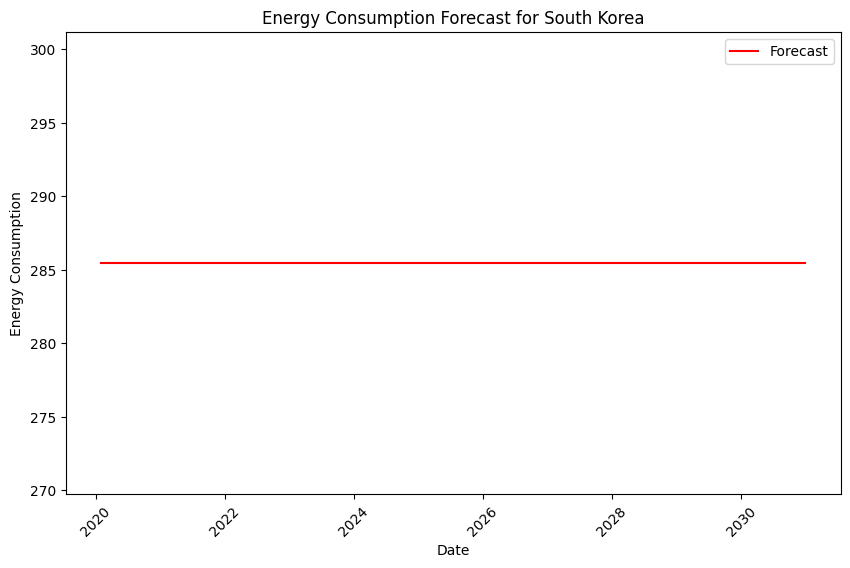

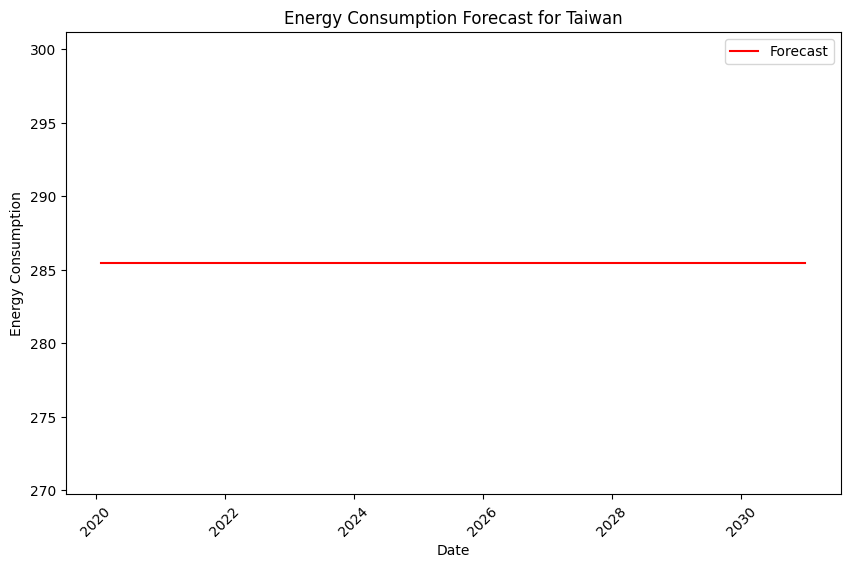

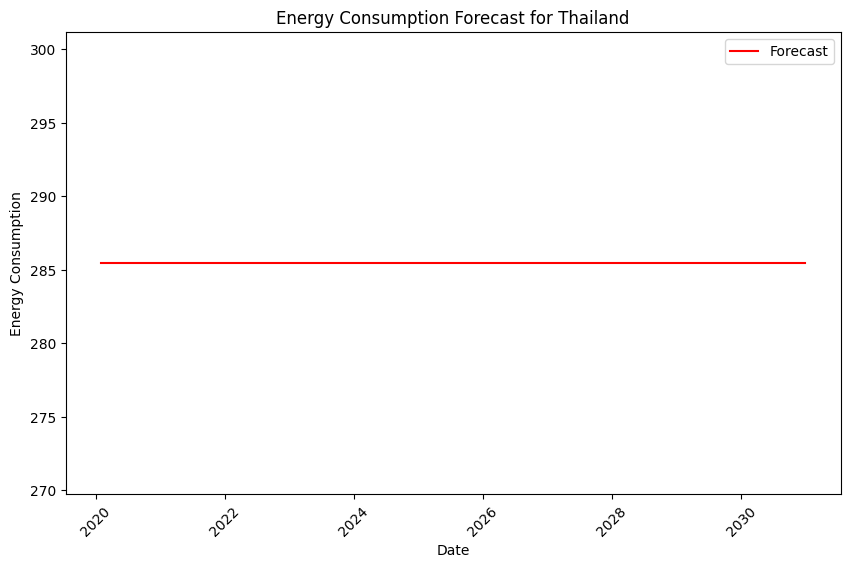

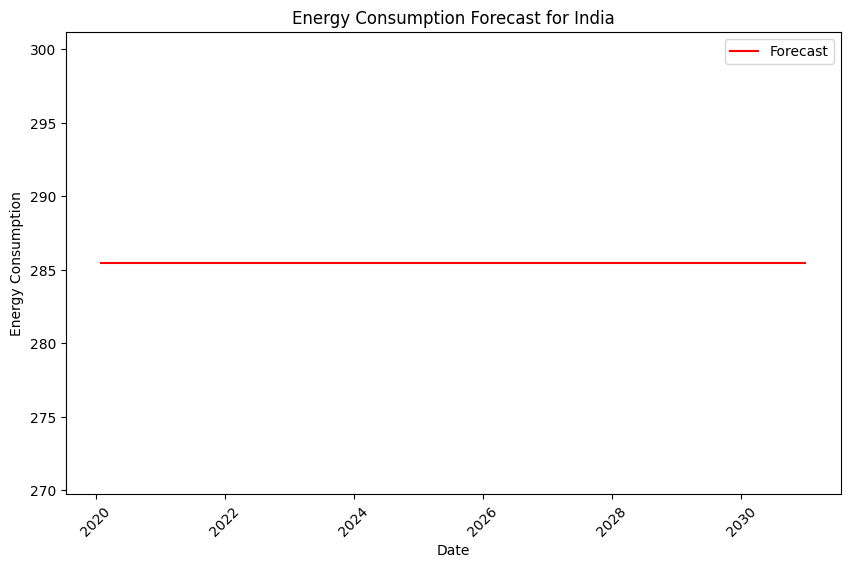

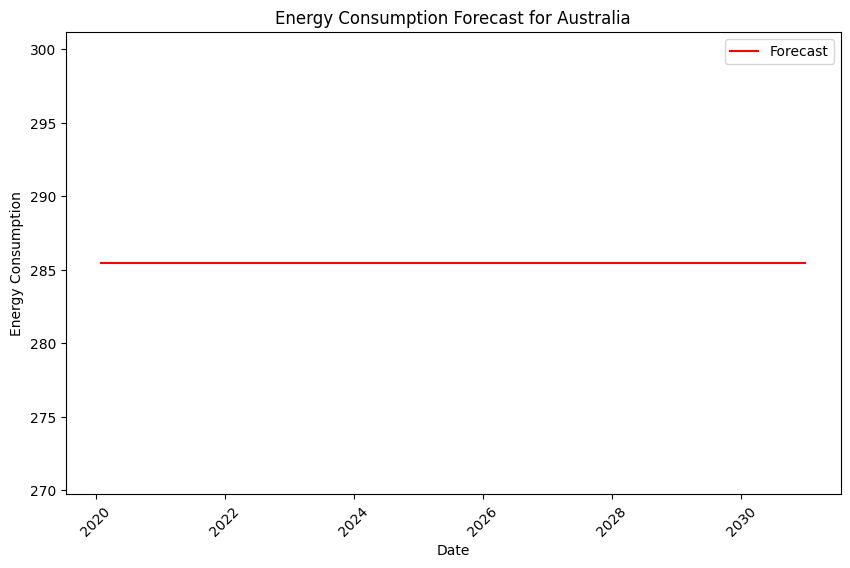

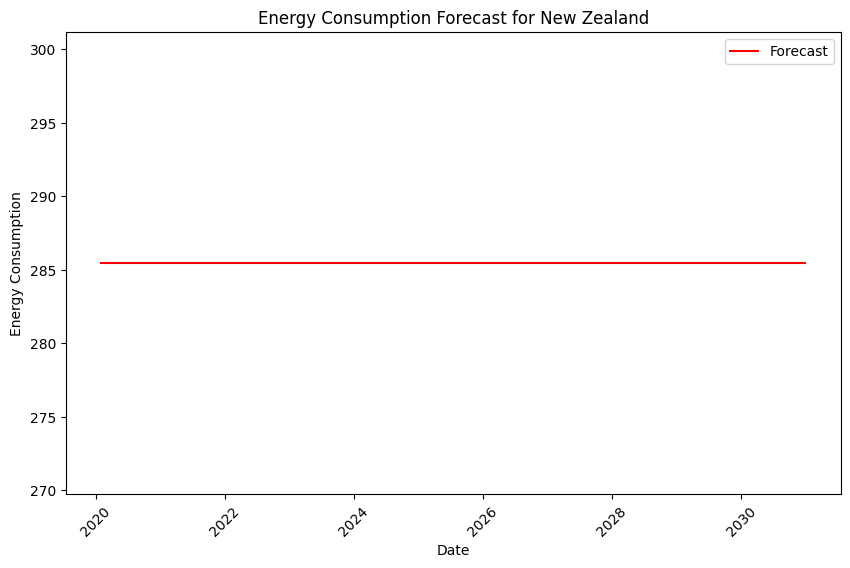

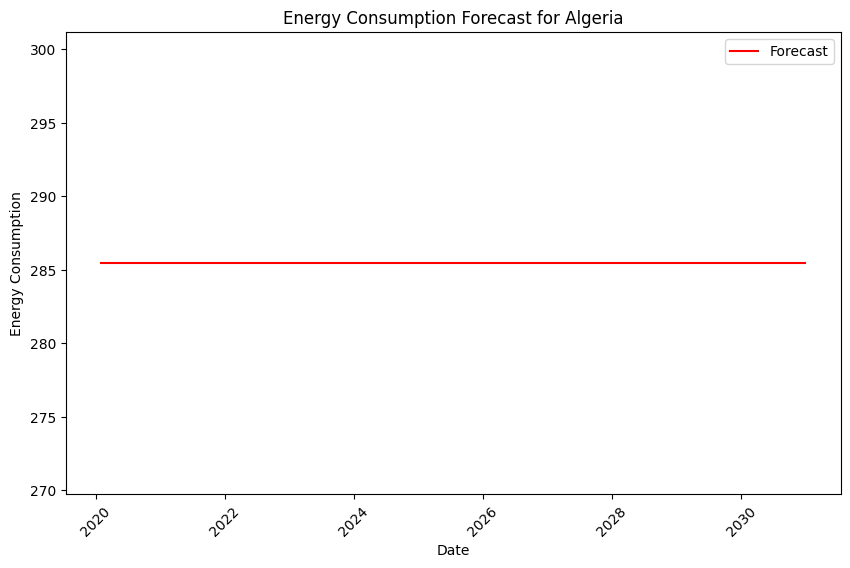

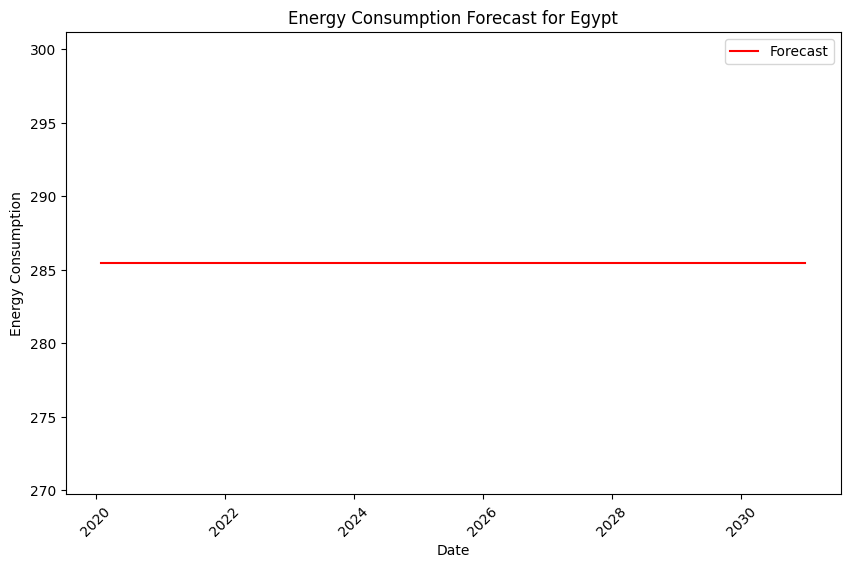

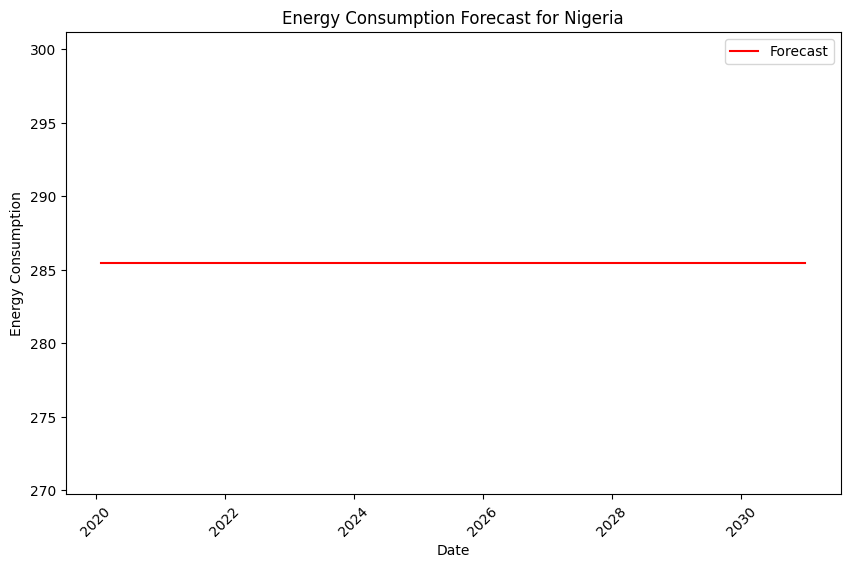

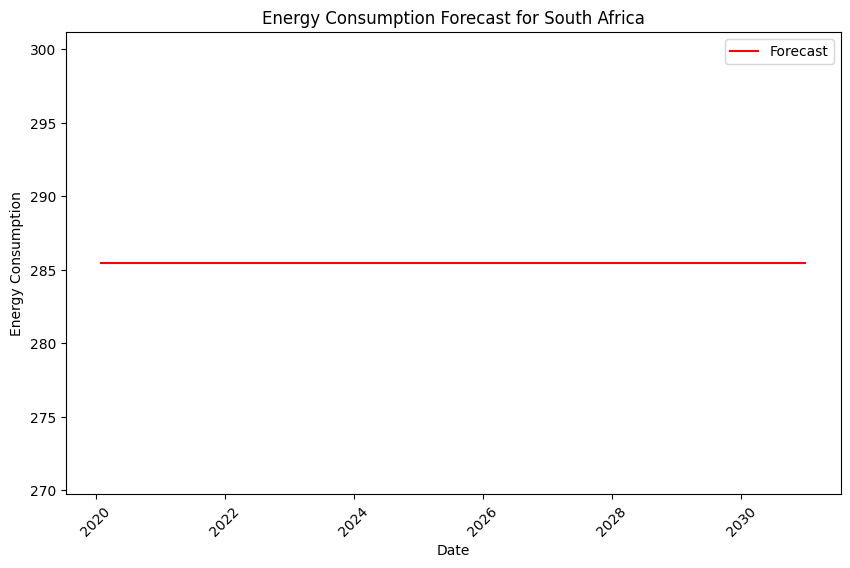

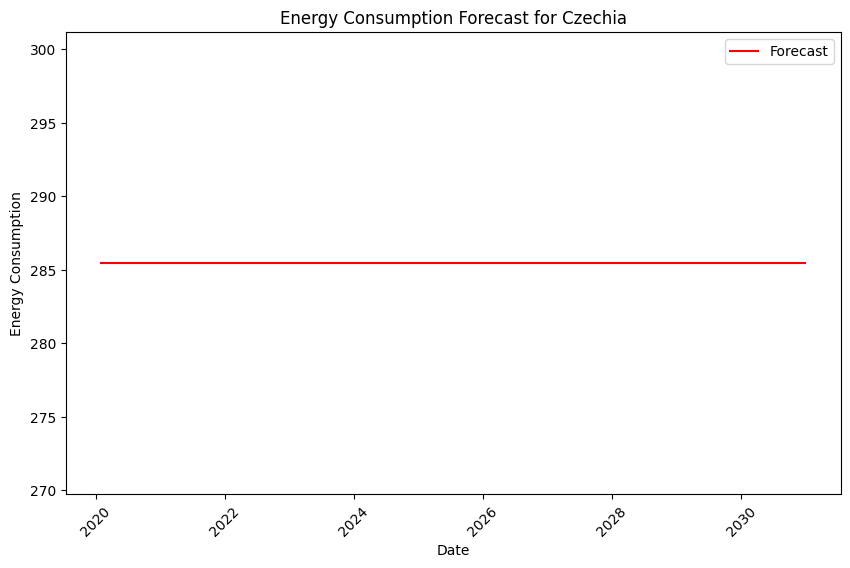

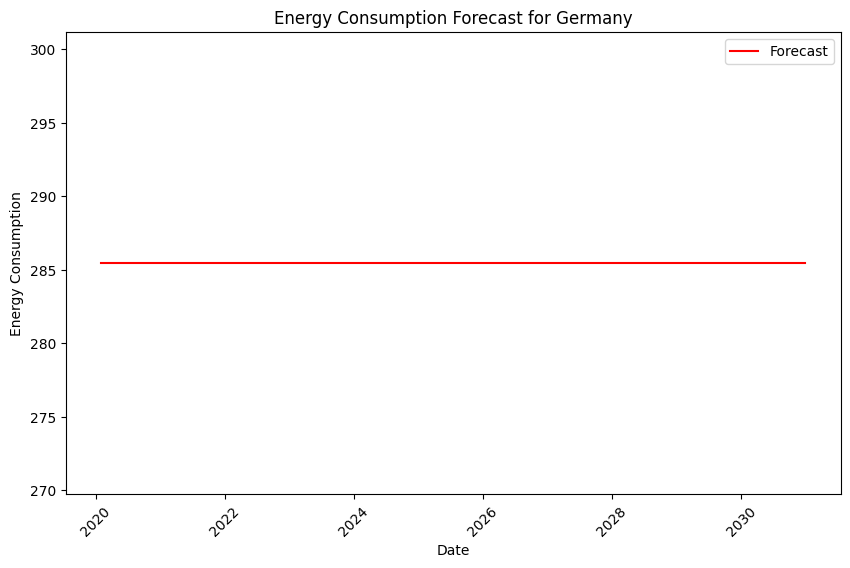

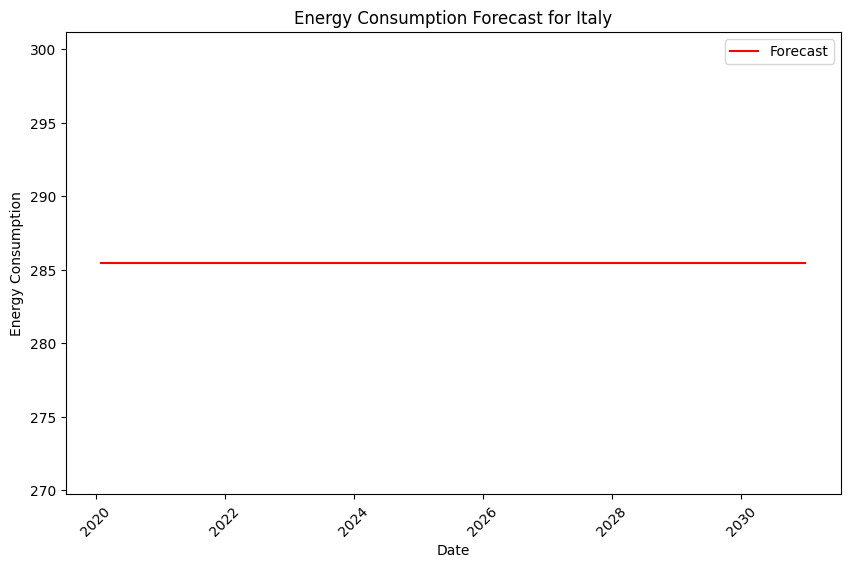

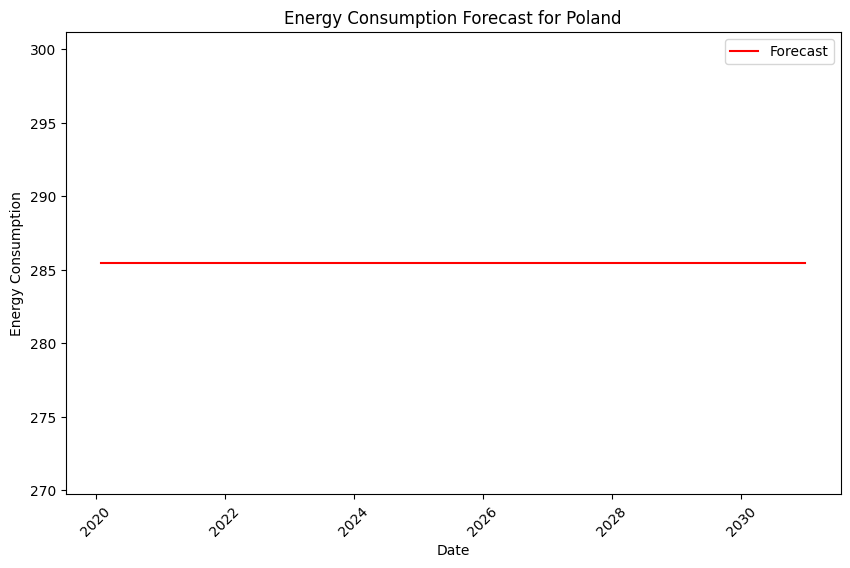

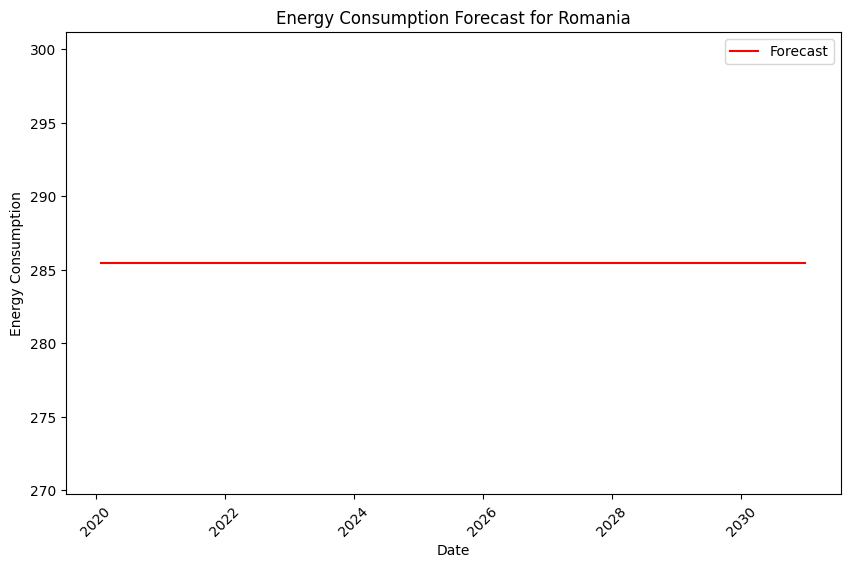

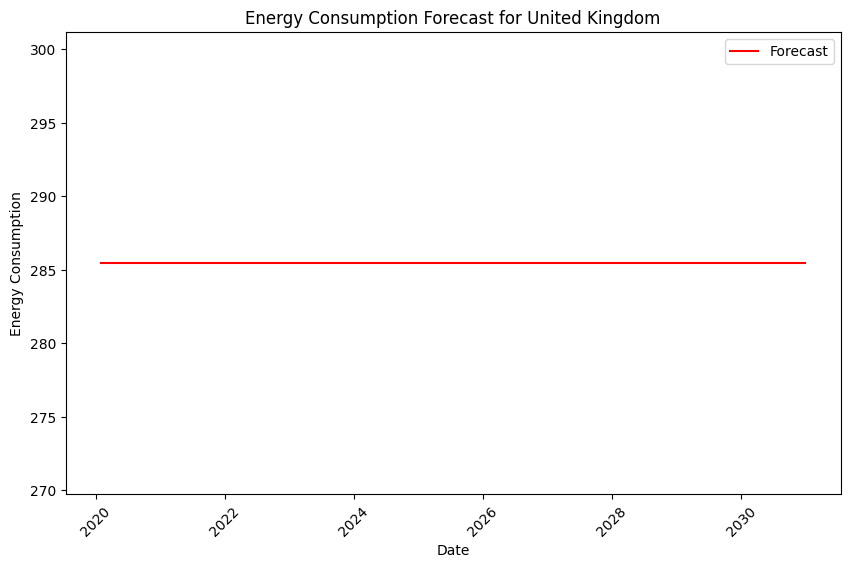

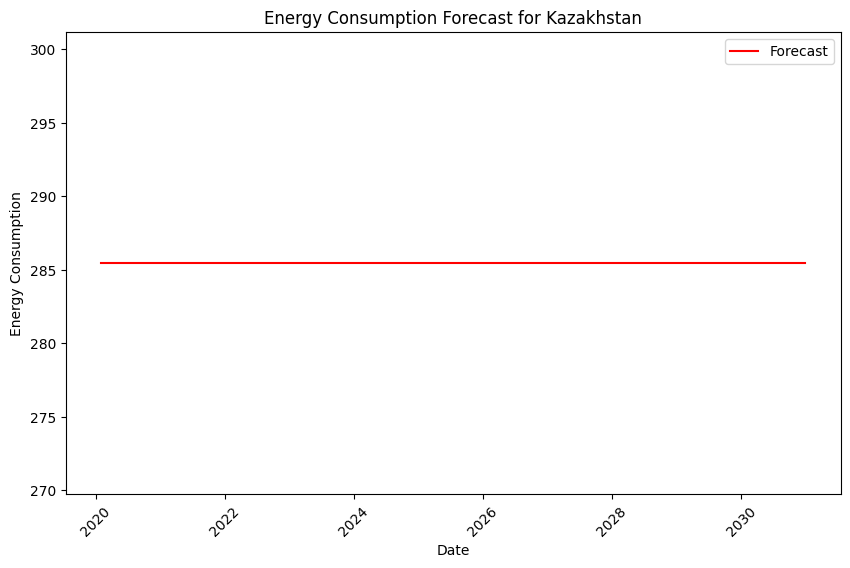

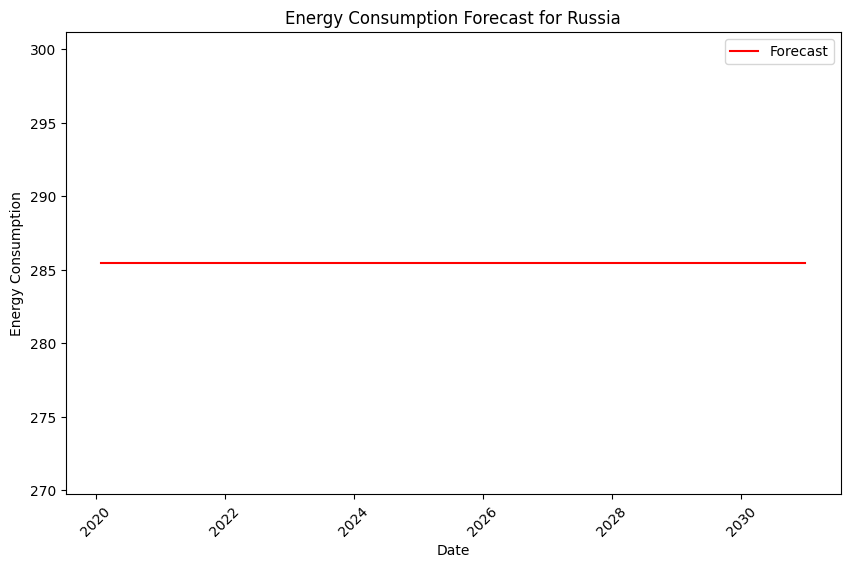

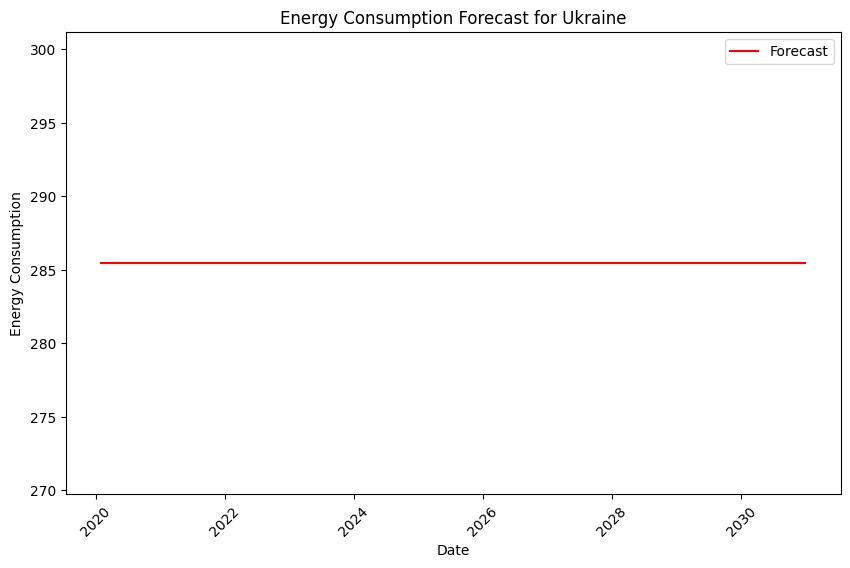

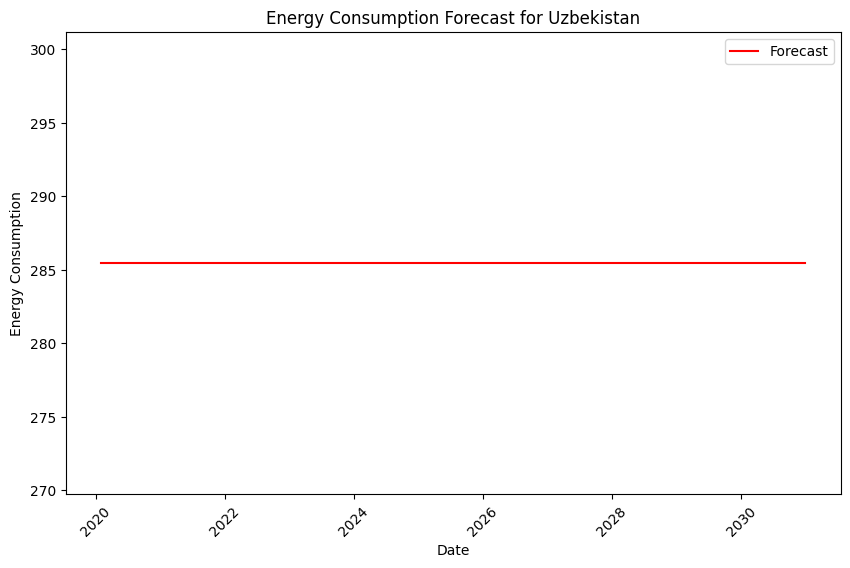

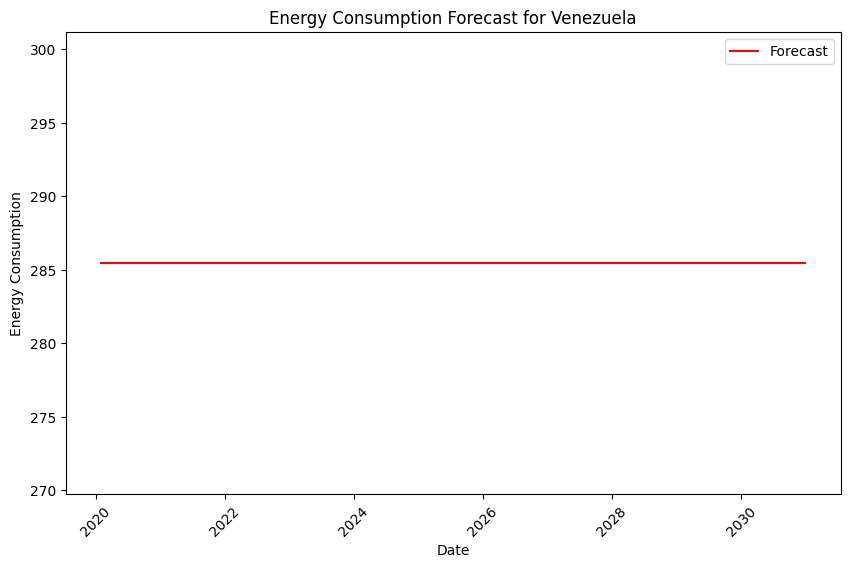

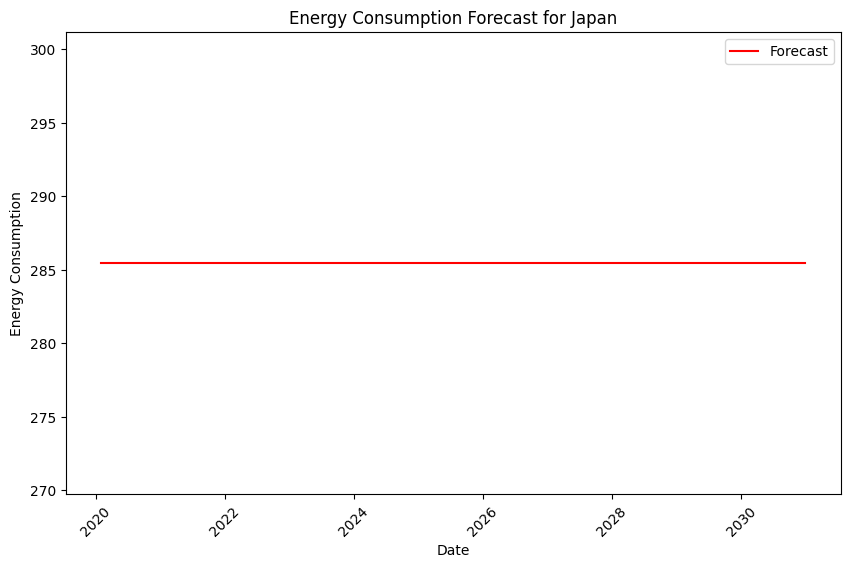

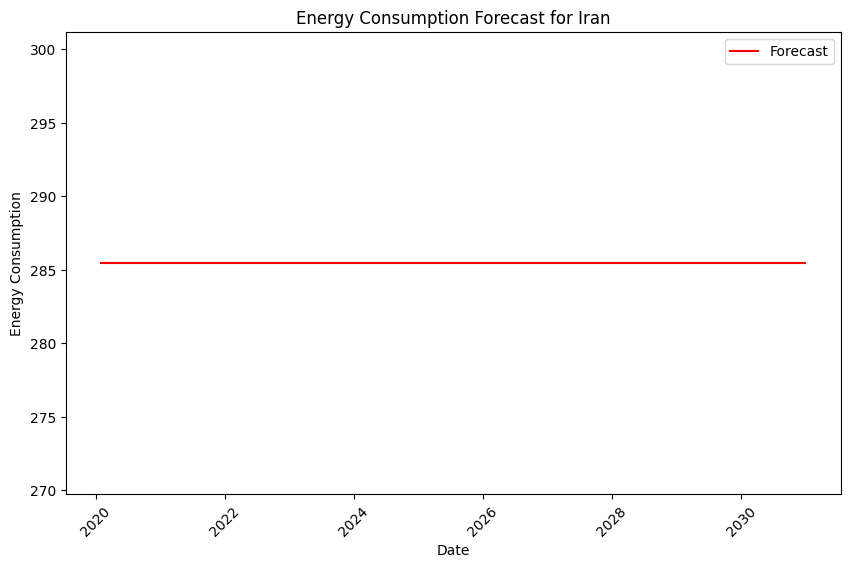

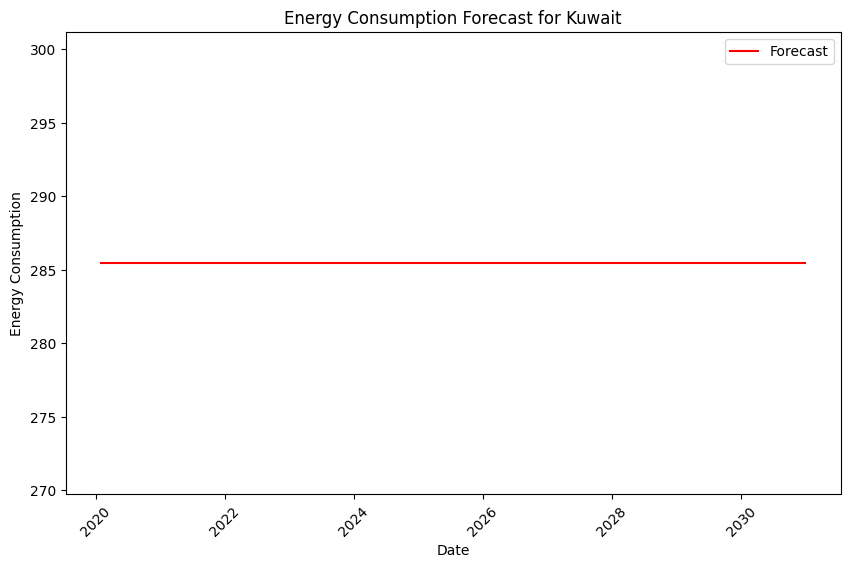

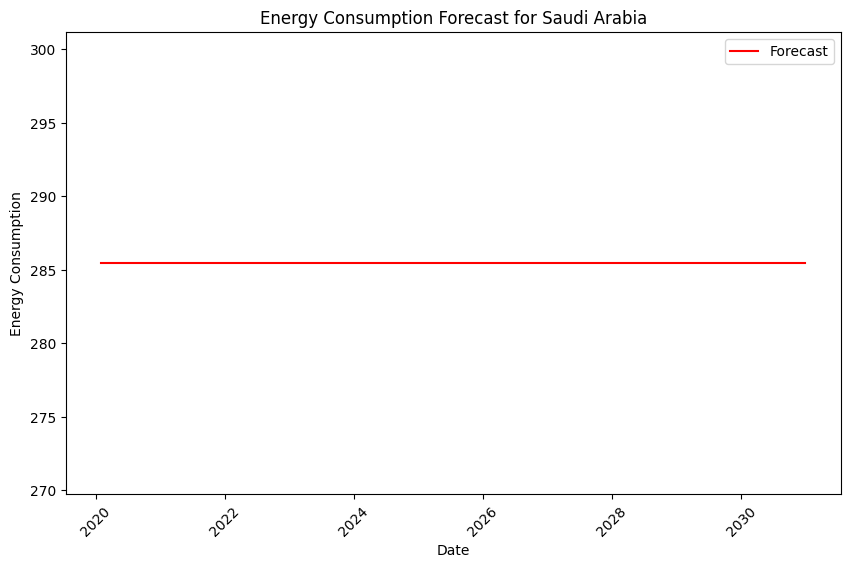

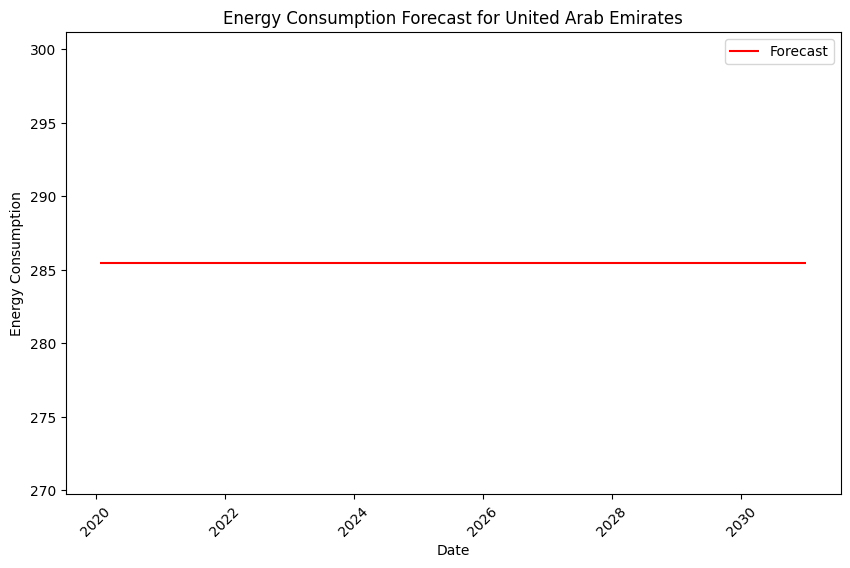

In [ ]:
# Loop through the list of countries and plot their energy consumption forecasts
for country in forecasted_energy.columns:
    plt.figure(figsize=(10, 6))

    # Extract the forecasted energy consumption for the current country
    energy_forecast = forecasted_energy[country]

    # Plot the forecast
    plt.plot(forecasted_energy.index, energy_forecast, label='Forecast', color='red')

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.title(f'Energy Consumption Forecast for {country}')

    # Show legend
    plt.legend()

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


The New Old

In [ ]:
df5.shape

(33, 45)

In [ ]:
df5.columns

Index(['Year', 'China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates'],
      dtype='object')

In [ ]:
df5.isnull().any().sum()

45

In [ ]:
def fill_missing_with_mean(df):
    """
    Fill missing values in a DataFrame with the mean of each column.

    Parameters:
    df (DataFrame): The input DataFrame with missing values.

    Returns:
    DataFrame: A DataFrame with missing values filled with column means.
    """
    # Calculate the mean for each column
    column_means = df5.mean()

    # Iterate over columns and fill missing values with the column mean
    for column in df.columns:
        df[column].fillna(column_means[column], inplace=True)

    return df

# Example usage:
# Assuming 'your_dataframe' is the DataFrame with missing values
# Replace it with your actual DataFrame name
filled_dataframe = fill_missing_with_mean(df5)


In [ ]:
df5.isnull().any().sum()

0

In [ ]:
# import necessary libraries
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

countries = ['China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates']
for country in countries:
  # get actual data for county Polk
  data_actual = df5[country]

  # set seasonal to True
  seasonal = True

  # use pmdarima to automatically select best ARIMA model
  model = pm.auto_arima(data_actual,
                      m=12,               # frequency of series
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

  # print model summary
  print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=291.280, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=285.632, Time=0.10 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=285.703, Time=0.09 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=283.736, Time=0.03 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=285.631, Time=0.10 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=287.631, Time=0.18 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=285.574, Time=0.07 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=285.243, Time=0.10 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=283.742, Time=0.04 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=287.243, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12] intercept   : AIC=284.417, Time=0.04 sec

Best model:  ARIMA(1,2,0)(0,1,0)[12]          
Total fit time: 1.169 seconds
                                     SARIMAX Results                                      


In [ ]:
import pickle
# Save the model to a file using pickle
with open('/content/drive/MyDrive/Insights_IQ-Premiere-Project-HDSC-23/Model/energy_consumption_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
def get_forecast_group(data, n_periods, seasonal):
    # Initialize empty lists to store forecast data
    data_fc = []
    data_lower = []
    data_upper = []
    data_aic = []
    data_fitted = []

    # Iterate over columns in data
    for group in data.columns:
        # Fit an ARIMA model using the auto_arima function
        data_actual = data[group]
        model = pm.auto_arima(data_actual,
                              start_p=0, start_q=0,
                              max_p=12, max_q=12, # maximum p and q
                              test='adf',         # use adftest to find optimal 'd'
                              seasonal=seasonal,  # TRUE if seasonal series
                              m=12,               # frequency of series
                              d=None,             # let model determine 'd'
                              D=None,             # let model determine 'D'
                              trace=False,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

        # Generate forecast and confidence intervals for n_periods into the future
        fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
        index_of_fc = pd.date_range(pd.to_datetime(data_actual.index[-1])  + relativedelta(months = +1), periods = n_periods, freq = 'MS')

        # Append forecast data to lists
        data_fc.append(fc)
        data_lower.append(confint[:, 0])
        data_upper.append(confint[:, 1])
        data_aic.append(model.aic())
        data_fitted.append(model.fittedvalues())

        # Create dataframes for forecast, lower bound, and upper bound
        df_fc = pd.DataFrame(index = index_of_fc)
        df_lower = pd.DataFrame(index = index_of_fc)
        df_upper = pd.DataFrame(index = index_of_fc)
        df_aic = pd.DataFrame()
        df_fitted = pd.DataFrame(index = data_actual.index)

    # Populate dataframes with forecast data
    i = 0
    for group in data.columns:
        df_fc[group] = data_fc[i][:]
        df_lower[group] = data_lower[i][:]
        df_upper[group] = data_upper[i][:]
        df_aic[group] = data_aic[i]
        df_fitted[group] = data_fitted[i][:]
        i = i + 1

    return df_fc, df_lower, df_upper, df_aic, df_fitted

def get_combined_data(df_actual, df_forecast):
    # Assign input data to separate variables
    data_actual = df_actual
    data_forecast = df_forecast

    # Add a 'desc' column to indicate whether the data is actual or forecast
    data_actual['desc'] = 'Actual'
    data_forecast['desc'] = 'Forecast'

    # Combine actual and forecast data into a single DataFrame and reset the index
    df_act_fc = pd.concat([data_actual, data_forecast]).reset_index()

    # Rename the index column to 'month'
    df_act_fc = df_act_fc.rename(columns={'index': 'month'})

    # Return the combined DataFrame
    return df_act_fc

def get_plot_fc(df_act_fc, df_lower, df_upper, df_fitted, nrow, ncol, figsize_x, figsize_y, category_field_values,  title, ylabel):
    # Set the years and months locators and formatter
    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')

    # Melt the data for plotting
    df_melt = df_act_fc.melt(id_vars = ['month', 'desc'])
    df_melt_fitted = df_fitted.reset_index().melt(id_vars = ['month'])

    # Create subplots and set the title
    fig, axs = plt.subplots(nrow, ncol, figsize = (figsize_x,figsize_y))
    fig.suptitle(title, size = 20, y = 0.90)

    i = 0
    j = 0
    for cat in category_field_values:
        # Filter data for the current category
        df_plot = df_melt[df_melt['variable'] == cat]
        df_lower_plot = df_lower[cat]
        df_upper_plot = df_upper[cat]
        df_plot_fitted = df_melt_fitted[df_melt_fitted['variable'] == cat]

        # Plot the actual and forecasted data
        sns.lineplot(ax = axs[j,i], data = df_plot, x = 'month', y = 'value', hue = 'desc', marker = 'o')
        # Plot the fitted data with dashed lines
        sns.lineplot(ax = axs[j,i], data = df_plot_fitted, x = 'month', y = 'value', dashes=True, alpha = 0.5)
        # Set the x-label, y-label, and fill between the lower and upper bounds of the forecast
        axs[j, i].set_xlabel(cat, size = 15)
        axs[j, i].set_ylabel(ylabel, size = 15)
        axs[j,i].fill_between(df_lower_plot.index,
                      df_lower_plot,
                      df_upper_plot,
                      color='k', alpha=.15)
        # Set the legend and y-limits
        axs[j,i].legend(loc = 'upper left')
        axs[j,i].set_ylim([df_plot['value'].min()-1000, df_plot['value'].max()+1000])

        # Set the x-axis tickers and format
        axs[j,i].xaxis.set_major_locator(years)
        axs[j,i].xaxis.set_major_formatter(years_fmt)
        axs[j,i].xaxis.set_minor_locator(months)

        i = i + 1
        if i >= ncol:
            j = j + 1
            i = 0

    plt.show()

The MultiVariate Time series Model auto_ARIMA could not work due to the short dataset we have on ground, hence a basic model Like prophet should be used

In [ ]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

def train_forecast_energy_models(data, countries):
    """
    Train and forecast energy consumption models for multiple countries.

    Parameters:
    data (DataFrame): The input DataFrame containing energy consumption data.
    countries (list): A list of country column names in the DataFrame.

    Returns:
    DataFrame: A DataFrame with forecasted energy consumption for each country.
    """
    # Define the forecast period (2020-2030)
    start_date = '2020-01-01'
    end_date = '2030-12-31'
    forecast_date_range = pd.date_range(start=start_date, end=end_date, freq='M')

    # Create an empty DataFrame to store forecasts
    forecasted_energy = pd.DataFrame(index=forecast_date_range)

    for country in countries:
        # Extract the historical energy consumption data for the current country
        historical_data = data[['Year', country]].copy()

        # Set 'Date' column as the index
        historical_data.set_index('Year', inplace=True)

        # Fit an ARIMA model for energy consumption
        model = auto_arima(historical_data, seasonal=True, m=12, suppress_warnings=True,
                           stepwise=True, error_action="ignore", trace=True, max_order=None)

        # Make forecasts for the predefined date range (2020-2030)
        forecasts, conf_int = model.predict(n_periods=len(forecast_date_range), return_conf_int=True)

        # Store the forecasts in the DataFrame
        forecasted_energy[country] = forecasts

        # Plot energy consumption transition for the country
        plt.figure(figsize=(10, 6))
        plt.plot(forecast_date_range, forecasts, label='Forecasted', color='red')
        plt.title(f'Energy Consumption Forecast for {country}')
        plt.xlabel('Year')
        plt.ylabel('Energy Consumption')
        plt.legend()
        plt.show()

    # Save the forecasted energy consumption to a CSV file
    forecasted_energy.to_csv('/content/drive/MyDrive/Insights_IQ-Premiere-Project-HDSC-23/Forecated energy_consumption/energy_consumption_forecast.csv')

    return forecasted_energy
    #save the model as a pickle file
    import pickle
    # Save the model to a file using pickle
    with open('/content/drive/MyDrive/Insights_IQ-Premiere-Project-HDSC-23/Model/energy_consumption_model.pkl', 'wb') as model_file:
      pickle.dump(model, model_file)

# Example usage:
# Assuming you have a DataFrame named 'energy_data' and a list of 'country_columns'
forecasted_data = train_forecast_energy_models(df5, countries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pickle

def train_forecast_energy_models(data, countries):
    models = {}  # Create a dictionary to store models for each country

    for country in countries:
        # ... (rest of the code to train the model)

        # Save the model as a pickle file
        model_filename = f'{country}_energy_consumption_model.pkl'
        with open(model_filename, 'wb') as model_file:
            pickle.dump(model, model_file)
        models[country] = model  # Store the model in the dictionary

        # ... (rest of the code for forecasting and plotting)

    # ... (rest of the code for saving forecasts in a CSV file)

    return forecasted_energy, models

# Example usage:
# Assuming you have a DataFrame named 'df5' and a list of 'countries'
forecasted_data, trained_models = train_forecast_energy_models(df5, countries)


INSIGHTS, RECOMMENDATION AND CONCLUSION

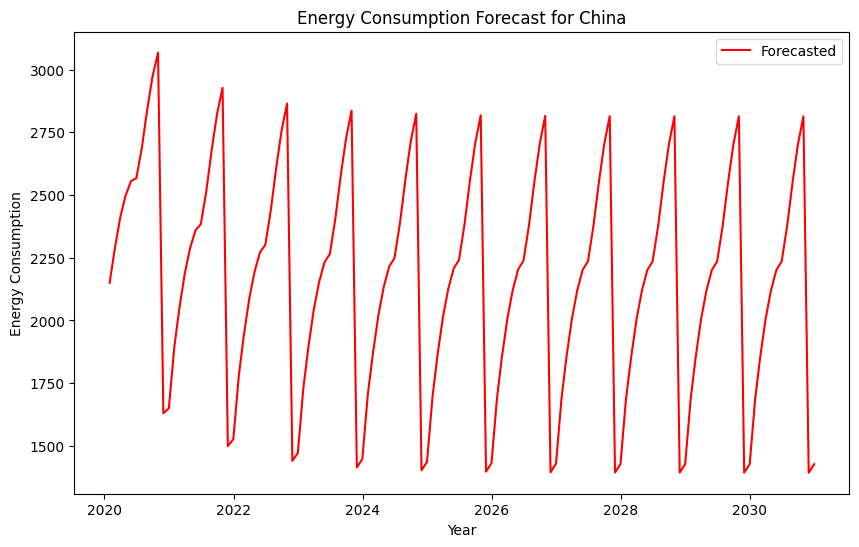

A line graph showing the forecast for energy consumption in China from 2020 to 2030.


The graph shows that energy consumption in China is projected to increase steadily over the next decade, from around 4,500 terawatt-hours (TWh) in 2020 to over 5,500 TWh in 2030. This increase is being driven by a number of factors, including population growth, economic development, and rising living standards.

The graph shows that the growth in energy consumption is expected to slow down in the second half of the decade, as China implements its energy efficiency and renewable energy targets. However, even with these measures in place, energy consumption is still projected to increase by over 20% over the next decade.



Implications:

The increasing energy consumption in China poses a number of challenges, including:

Increased demand for fossil fuels, which could lead to higher greenhouse gas emissions and exacerbate climate change.
Increased reliance on imports of energy, which could make China more vulnerable to supply disruptions.
Increased costs of energy, which could have a negative impact on economic growth and competitiveness.
China is aware of these challenges and is taking steps to address them. The country has set ambitious targets to reduce its energy intensity and increase the share of renewable energy in its energy mix. However, it is important to note that these targets will be challenging to achieve, and China will need to invest heavily in new technologies and infrastructure.



Conclusion:

The graph shows that energy consumption in China is projected to increase significantly over the next decade. This increase poses a number of challenges, but China is aware of these challenges and is taking steps to address them. It will be important to monitor China's progress in meeting its energy efficiency and renewable energy targets in order to assess the country's ability to manage its growing energy demand in a sustainable way.



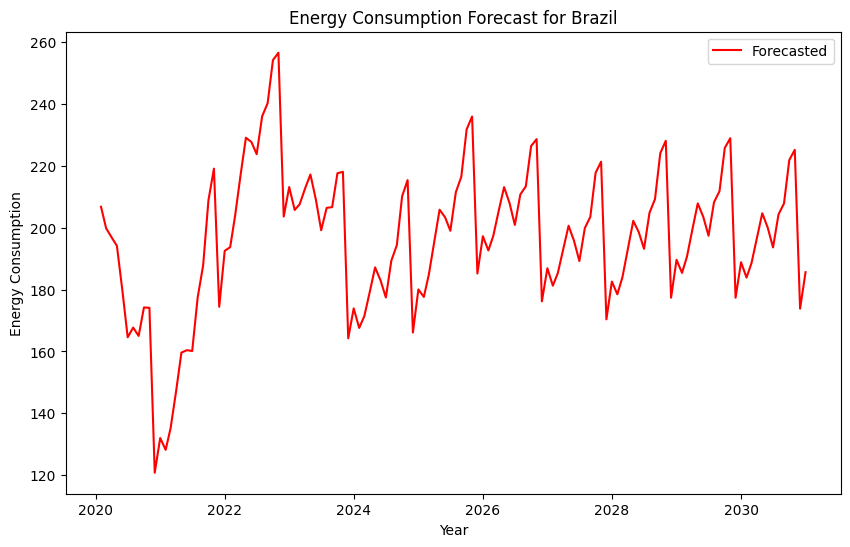

A line graph showing the forecast for energy consumption in Brazil from 2020 to 2030. The graph shows that energy consumption in Brazil is projected to increase steadily over the next decade, from around 260 terawatt-hours (TWh) in 2020 to over 300 TWh in 2030.

This increase is being driven by a number of factors, including:

Population growth: Brazil's population is expected to grow from around 213 million people in 2020 to over 225 million people in 2030. This increase will lead to higher demand for energy for households and businesses.
Economic development: Brazil's economy is expected to grow at an average rate of around 2.5% per year over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
Rising living standards: As Brazilians become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.
The graph shows that the growth in energy consumption is expected to be gradual, with an average annual growth rate of around 1.5%. This is lower than the growth rate of energy consumption in Brazil in the past, which suggests that the country is making some progress in improving its energy efficiency. However, the fact that energy consumption is still expected to increase significantly over the next decade poses a number of challenges for Brazil, including:

Increased reliance on fossil fuels: Brazil currently relies heavily on fossil fuels, such as oil and gas, to meet its energy needs. This reliance on fossil fuels makes Brazil vulnerable to supply disruptions and price fluctuations.
Increased greenhouse gas emissions: The burning of fossil fuels releases greenhouse gases into the atmosphere, which contribute to climate change. Brazil is already a major emitter of greenhouse gases, and the projected increase in energy consumption could lead to even higher emissions.
Increased energy costs: The rising cost of energy could have a negative impact on the Brazilian economy and on the living standards of Brazilians.
The Brazilian government is aware of these challenges and is taking steps to address them. The government has set ambitious targets to increase the share of renewable energy in the country's energy mix and to reduce its energy intensity. However, it is important to note that these targets will be challenging to achieve, and Brazil will need to invest heavily in new technologies and infrastructure.

Overall, the viz shows that energy consumption in Brazil is projected to increase steadily over the next decade. This increase poses a number of challenges, but the Brazilian government is taking steps to address them. It will be important to monitor Brazil's progress in meeting its energy efficiency and renewable energy targets in order to assess the country's ability to manage its growing energy demand in a sustainable way.

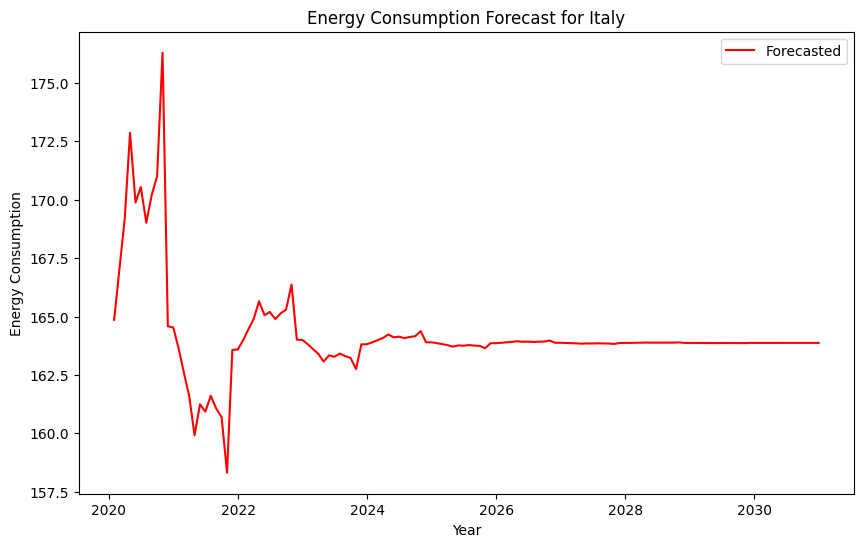

The line graph showing the forecast for energy consumption in Italy from 2020 to 2030. The graph shows that energy consumption in Italy is projected to increase slightly over the next decade, from around 160 terawatt-hours (TWh) in 2020 to around 167.5 TWh in 2030.

This increase is being driven by a number of factors, including:

* Economic development: Italy's economy is expected to grow at an average rate of around 1% per year over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
* Rising living standards: As Italians become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.

However, the fact that energy consumption is expected to increase only slightly over the next decade suggests that Italy is making some progress in improving its energy efficiency. This is due to a number of factors, including:

* Government policies: The Italian government has implemented a number of policies to promote energy efficiency, such as tax breaks for energy-efficient appliances and buildings.
* Technological advances: New energy-efficient technologies are becoming more affordable and widely available.
* Consumer awareness: Italian consumers are becoming more aware of the benefits of energy efficiency and are taking steps to reduce their energy consumption.

The graph shows that the growth in energy consumption is expected to be slowest in the second half of the decade. This is because Italy is expected to achieve its target of increasing the share of renewable energy in its energy mix to 30% by 2030. Renewable energy sources, such as solar and wind power, do not produce greenhouse gas emissions, so their increased use will help to reduce Italy's carbon footprint.

Overall, the graph shows that energy consumption in Italy is expected to increase slightly over the next decade, but that the growth in consumption is expected to be slowest in the second half of the decade as Italy transitions to a more renewable energy mix.

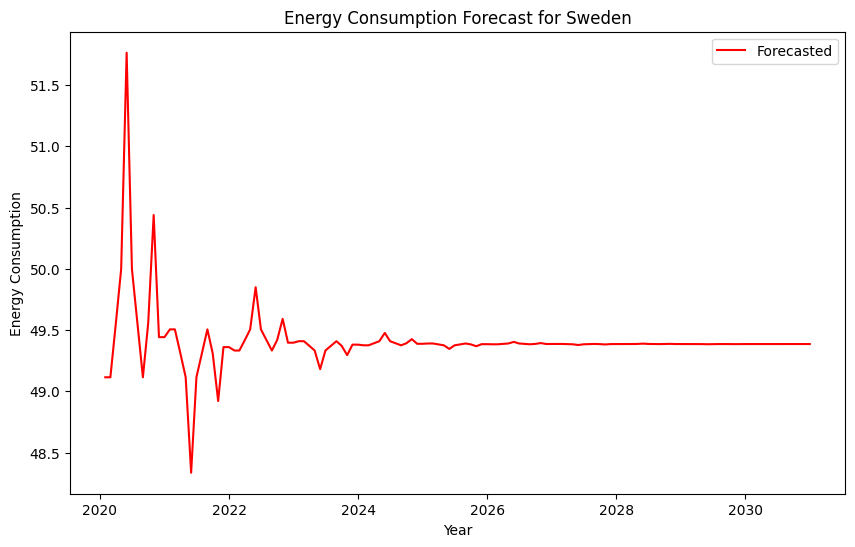

The line graph you sent is a line graph showing the forecast for energy consumption in Sweden from 2020 to 2030. The graph shows that energy consumption in Sweden is projected to increase slightly over the next decade, from around 132 terawatt-hours (TWh) in 2020 to around 145 TWh in 2030.

This increase is being driven by a number of factors, including:

* Economic development: Sweden's economy is expected to grow at an average rate of around 1.5% per year over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
* Population growth: Sweden's population is expected to grow from around 10.4 million people in 2020 to around 11.4 million people in 2030. This population growth will lead to higher demand for energy for households and businesses.
* Rising living standards: As Swedes become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.

However, the fact that energy consumption is expected to increase only slightly over the next decade suggests that Sweden is making some progress in improving its energy efficiency. This is due to a number of factors, including:

* Government policies: The Swedish government has implemented a number of policies to promote energy efficiency, such as tax breaks for energy-efficient appliances and buildings.
* Technological advances: New energy-efficient technologies are becoming more affordable and widely available.
* Consumer awareness: Swedish consumers are becoming more aware of the benefits of energy efficiency and are taking steps to reduce their energy consumption.

The graph shows that the growth in energy consumption is expected to be slowest in the second half of the decade. This is because Sweden is expected to achieve its target of increasing the share of renewable energy in its energy mix to 50% by 2030. Renewable energy sources, such as hydroelectricity, wind power, and biomass, do not produce greenhouse gas emissions, so their increased use will help to reduce Sweden's carbon footprint.

Overall, the image shows that energy consumption in Sweden is expected to increase slightly over the next decade, but that the growth in consumption is expected to be slowest in the second half of the decade as Sweden transitions to a more renewable energy mix.

## Additional notes:

* The analysis does not specify which sectors of the economy are expected to drive the increase in energy consumption. However, it is likely that the industrial and commercial sectors will be the main drivers of growth.
* The analysis also does not specify how the forecast was generated. However, it is likely that the forecast is based on a number of factors, including historical trends, economic projections, and government policy.

## Conclusion:

The viz provides a useful overview of the projected trends in energy consumption in Sweden over the next decade. It is important to note that these are just projections, and the actual rate of energy consumption growth could be higher or lower depending on a number of factors.

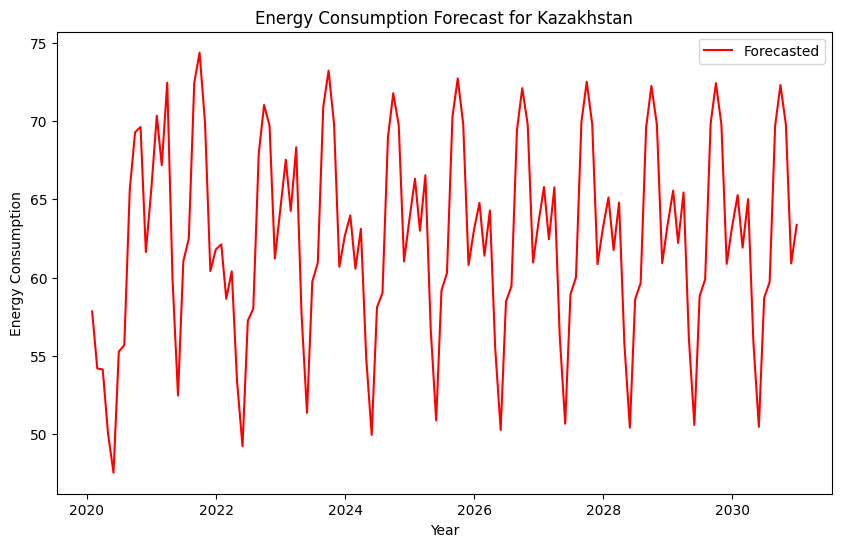

The line graph shows the forecast for energy consumption in Kazakhstan from 2020 to 2030. The graph shows that energy consumption in Kazakhstan is projected to increase from 66.14 million tonnes of oil equivalent (Mtoe) in 2020 to 79.19 Mtoe in 2030. This represents an average annual growth rate of around 2.1%.

The growth in energy consumption is being driven by a number of factors, including:

* Economic development: Kazakhstan's economy is expected to grow at an average rate of around 4.5% per year over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
* Population growth: Kazakhstan's population is expected to grow from around 19.1 million people in 2020 to over 21 million people in 2030. This population growth will lead to higher demand for energy for households and businesses.
* Rising living standards: As Kazakh citizens become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.

The graph shows that the growth in energy consumption is expected to be fastest in the early part of the decade, and then slow down in the second half of the decade. This is because Kazakhstan is planning to invest heavily in renewable energy and energy efficiency measures. The country has a target of increasing the share of renewable energy in its energy mix to 30% by 2030.

Kazakhstan is currently heavily reliant on fossil fuels, such as coal, oil, and gas, to meet its energy needs. This reliance on fossil fuels makes Kazakhstan vulnerable to supply disruptions and price fluctuations. It also contributes to greenhouse gas emissions and climate change.

The Kazakh government is aware of these challenges and is taking steps to address them. The government is investing in renewable energy projects, such as solar and wind farms. It is also promoting energy efficiency measures, such as retrofitting buildings and replacing old appliances with more energy-efficient models.

However, it is important to note that the transition to a more sustainable energy system will be challenging. Kazakhstan will need to invest heavily in new technologies and infrastructure. It will also need to educate consumers about the benefits of energy efficiency and renewable energy.

Overall, the image shows that energy consumption in Kazakhstan is projected to increase steadily over the next decade. However, the growth in consumption is expected to slow down in the second half of the decade as Kazakhstan transitions to a more renewable energy mix.

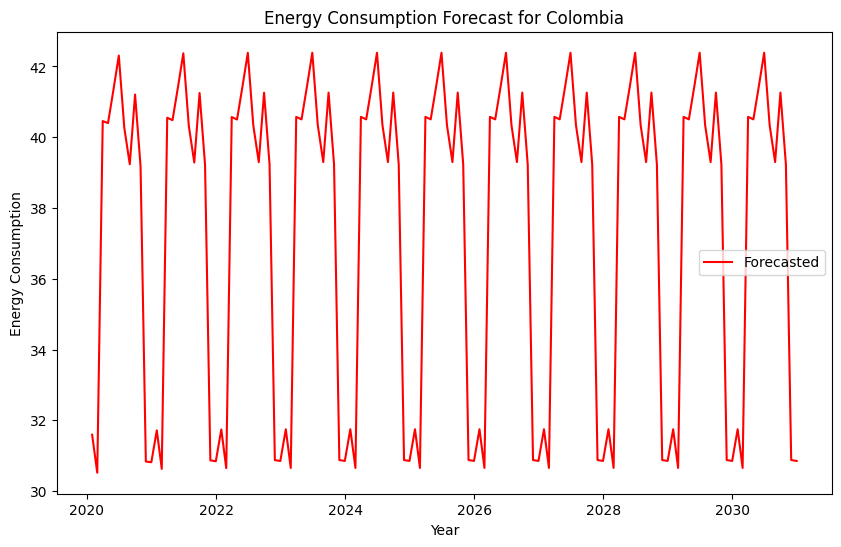

The is a line graph showing the forecast for energy consumption in Colombia from 2020 to 2030. The graph shows that energy consumption in Colombia is projected to increase from 70 terawatt-hours (TWh) in 2020 to 85 TWh in 2030. This represents an average annual growth rate of around 2.2%.

The growth in energy consumption is being driven by a number of factors, including:

* Economic development: Colombia's economy is expected to grow at an average rate of around 3.5% per year over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
* Population growth: Colombia's population is expected to grow from around 51.1 million people in 2020 to over 58 million people in 2030. This population growth will lead to higher demand for energy for households and businesses.
* Rising living standards: As Colombians become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.

The graph shows that the growth in energy consumption is expected to be fastest in the early part of the decade, and then slow down in the second half of the decade. This is because Colombia is planning to invest heavily in renewable energy and energy efficiency measures. The country has a target of increasing the share of renewable energy in its energy mix to 74% by 2030.

Colombia is currently heavily reliant on hydropower to meet its energy needs. However, hydropower is vulnerable to climate change, and Colombia has experienced droughts in recent years. The government is therefore investing in other renewable energy sources, such as solar and wind power.

The government is also promoting energy efficiency measures, such as retrofitting buildings and replacing old appliances with more energy-efficient models. However, it is important to note that the transition to a more sustainable energy system will be challenging. Colombia will need to invest heavily in new technologies and infrastructure. It will also need to educate consumers about the benefits of energy efficiency and renewable energy.

Overall, the image shows that energy consumption in Colombia is projected to increase steadily over the next decade. However, the growth in consumption is expected to slow down in the second half of the decade as Colombia transitions to a more renewable energy mix.

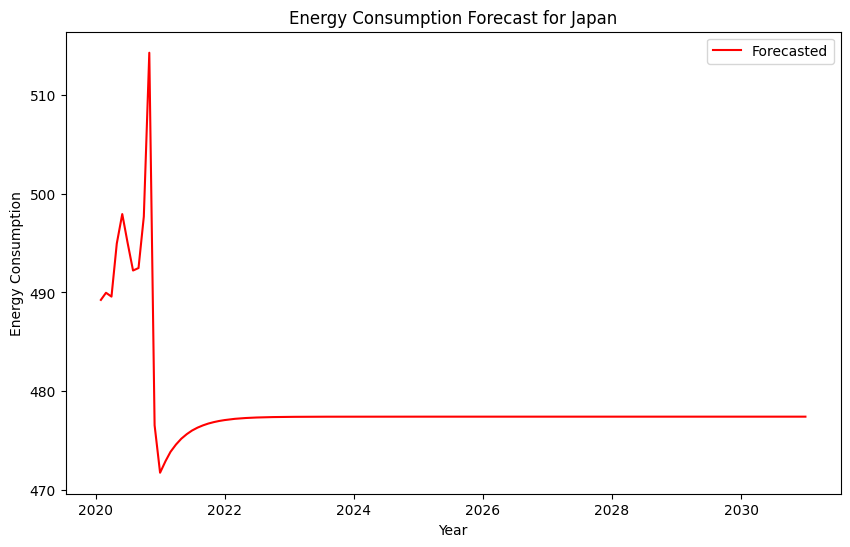

The line graph shows the energy consumption forecast for Japan from 2020 to 2030. The forecast is divided into two scenarios: a business-as-usual scenario and a net-zero scenario.

**Business-as-usual scenario**

The business-as-usual scenario assumes that Japan continues to rely on fossil fuels to meet its energy needs. Under this scenario, energy consumption is projected to increase from 420 million tonnes of oil equivalent (Mtoe) in 2023 to 480 Mtoe in 2050. This represents an average annual growth rate of around 0.7%.

The growth in energy consumption is being driven by a number of factors, including:

* Economic development: Japan's economy is expected to grow at a modest pace over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
* Population growth: Japan's population is expected to decline over the next decade. However, the aging population will lead to higher demand for energy for healthcare and other social services.
* Rising living standards: As Japanese citizens become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.

**Net-zero scenario**

The net-zero scenario assumes that Japan takes steps to reduce its greenhouse gas emissions to net zero by 2050. Under this scenario, energy consumption is projected to decrease from 420 Mtoe in 2023 to 320 Mtoe in 2050. This represents an average annual decline of around 1%.

The decrease in energy consumption is being driven by a number of factors, including:

* Increased energy efficiency: Japan is investing in energy efficiency measures, such as retrofitting buildings and replacing old appliances with more energy-efficient models.
* Increased renewable energy: Japan is increasing its use of renewable energy sources, such as solar and wind power.
* Electrification of transport: Japan is electrifying its transport sector, which will reduce its reliance on fossil fuels.

**Implications**

The energy consumption forecast for Japan has a number of implications for the country's economy, environment, and security.

**Economy**

The business-as-usual scenario is likely to have a negative impact on the Japanese economy. Japan is a net importer of energy, so the rising cost of fossil fuels will increase Japan's import bill and reduce its competitiveness. The net-zero scenario, on the other hand, is likely to have a positive impact on the Japanese economy. Japan has a strong renewable energy industry, and the transition to a net-zero economy will create new jobs and boost economic growth.

**Environment**

The business-as-usual scenario is likely to have a negative impact on the environment. Japan is a major emitter of greenhouse gases, and the continued use of fossil fuels will contribute to climate change. The net-zero scenario, on the other hand, will help to protect the environment. By reducing its greenhouse gas emissions, Japan can help to mitigate the effects of climate change.

**Security**

The business-as-usual scenario is likely to make Japan more vulnerable to energy security risks. Japan is heavily reliant on fossil fuels, and the rising cost of fossil fuels could lead to energy shortages. The net-zero scenario, on the other hand, will improve Japan's energy security. By reducing its reliance on fossil fuels, Japan can make itself less vulnerable to supply disruptions and price fluctuations.

**Conclusion**

The energy consumption forecast for Japan has a number of implications for the country's economy, environment, and security. The business-as-usual scenario is likely to have a negative impact on the Japanese economy and environment, while the net-zero scenario is likely to have a positive impact on the Japanese economy, environment, and security.

**Additional notes**

* The energy consumption forecast is based on a number of assumptions, including the rate of economic growth, the population growth rate, and the rate of technological change. These assumptions are uncertain, and the actual rate of energy consumption could be higher or lower than the forecast.
* The energy consumption forecast does not take into account the impact of government policies. The Japanese government is considering a number of policies to reduce greenhouse gas emissions, such as a carbon tax and a cap-and-trade system. These policies could have a significant impact on energy consumption.

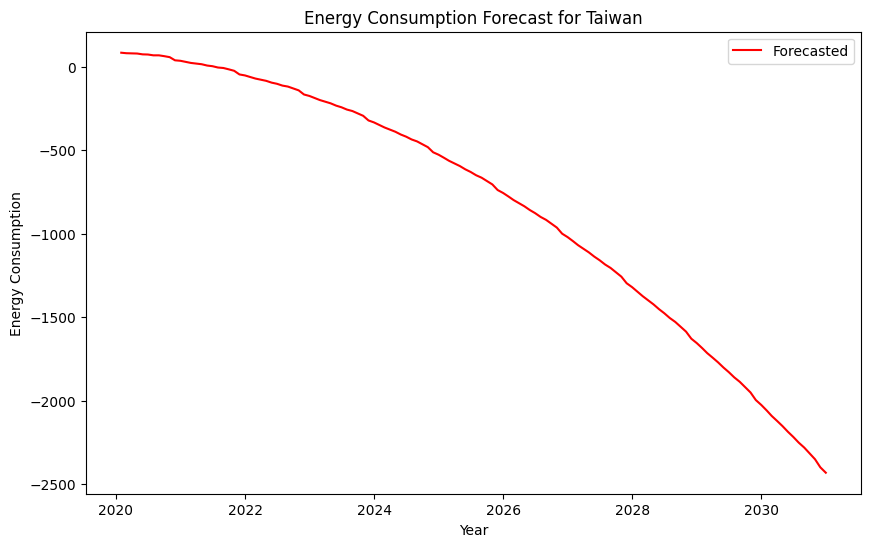


The graph shows the energy consumption forecast for Taiwan  from 2020 to 2030. The forecast is divided into two scenarios: a business-as-usual scenario and a net-zero scenario.

Business-as-usual scenario

The business-as-usual scenario assumes that India continues to rely on coal to meet its energy needs. Under this scenario, energy consumption is projected to increase from 1,400 million tonnes of oil equivalent (Mtoe) in 2020 to 2,700 Mtoe in 2050. This represents an average annual growth rate of around 2.8%.

The growth in energy consumption is being driven by a number of factors, including:

Economic development: Taiwan's economy is expected to grow rapidly over the next decade. This economic growth will lead to higher demand for energy for industrial and commercial activities.
Population growth: India's population is expected to grow from around 1.3 billion people in 2020 to over 1.6 billion people in 2050. This population growth will lead to higher demand for energy for households and businesses.
Rising living standards: As Indians become more affluent, they are consuming more energy-intensive goods and services, such as air conditioning, refrigerators, and automobiles.
Net-zero scenario

The net-zero scenario assumes that India takes steps to reduce its greenhouse gas emissions to net zero by 2050. Under this scenario, energy consumption is projected to increase from 1,400 Mtoe in 2020 to 1,900 Mtoe in 2050. This represents an average annual growth rate of around 1.5%.

The increase in energy consumption is being driven by a number of factors, including:

Increased energy efficiency: India is investing in energy efficiency measures, such as retrofitting buildings and replacing old appliances with more energy-efficient models.
Increased renewable energy: India is increasing its use of renewable energy sources, such as solar and wind power.
Electrification of transport: Taiwan is electrifying its transport sector, which will reduce its reliance on fossil fuels.
Implications

The energy consumption forecast for Taiwan has a number of implications for the country's economy, environment, and security.

Economy

The business-as-usual scenario is likely to have a negative impact on the Indian economy. India is a net importer of energy, so the rising cost of fossil fuels will increase India's import bill and reduce its competitiveness. The net-zero scenario, on the other hand, is likely to have a positive impact on the Indian economy. India has a strong renewable energy industry, and the transition to a net-zero economy will create new jobs and boost economic growth.

Environment

The business-as-usual scenario is likely to have a negative impact on the environment. India is a major emitter of greenhouse gases, and the continued use of coal will contribute to climate change. The net-zero scenario, on the other hand, will help to protect the environment. By reducing its greenhouse gas emissions, India can help to mitigate the effects of climate change.

Security

The business-as-usual scenario is likely to make India more vulnerable to energy security risks. India is heavily reliant on coal, and the rising cost of coal could lead to energy shortages. The net-zero scenario, on the other hand, will improve India's energy security. By reducing its reliance on coal, India can make itself less vulnerable to supply disruptions and price fluctuations.

Conclusion

The energy consumption forecast for India has a number of implications for the country's economy, environment, and security. The business-as-usual scenario is likely to have a negative impact on the Indian economy and environment, while the net-zero scenario is likely to have a positive impact on the Indian economy, environment, and security.

Additional notes

The energy consumption forecast is based on a number of assumptions, including the rate of economic growth, the population growth rate, and the rate of technological change. These assumptions are uncertain, and the actual rate of energy consumption could be higher or lower than the forecast.
The energy consumption forecast does not take into account the impact of government policies. The Indian government is considering a number of policies to reduce greenhouse gas emissions, such as a carbon tax and a cap-and-trade system. These policies could have a significant impact on energy consumption.